##Import Library Package

In [1]:
!pip install adjustText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans as Kmeans1
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from adjustText import adjust_text
import random

import geopy
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from datetime import datetime
from tqdm import tqdm_notebook

import warnings
warnings.filterwarnings('ignore')


##Read Dataset

In [3]:
data = pd.read_csv('data.csv')
data.head()

,Umur,Berat Badan,Jenis Kelamin,Alamat,Gejala apa yang dirasakan?,"Jika pasien mengalami demam, apakah demam yang dialami terus menerus sepanjang hari?",Apakah pasien mual/muntah?,Apakah pasien pernah mengalami mimisan?,Berapa suhu badan pasien?,Apakah sudah menerima imunisasi BCG?,...,"Jika iya, karena apa?",Apakah nafsu makan berkurang?,Apakah sering jajan diluar rumah?,Berapa luas rumah pasien?,Berapa jumlah penghuni rumah pasien?,Bagaimana kondisi pembuangan sampah disekitar rumah?,Apakah tersedia air bersih di rumah?,Bagaimana sistem ventilasi di rumah pasien?,Apakah sering menggunakan jamban/toilet?,Apa diagnosa/hasil tes darah pasien?
0,60.0,42,L,Maccini Baji (Gowa),"batuk, demam",Demam Konstan,Muntah,Tidak Mimisan,37.8,Sudah Vaksin BCG,...,-,Nafsu Makan Normal,Jarang Jajan Diluar,54 - 120 m2,7 orang,Ada sampah dan jarang dibersihkan,Tersedia air bersih,Ada ventilasi tapi jarang terbuka,Sering Pakai Jamban/Toilet,tbc
1,29.0,39,L,Maccini Baji (Gowa),"demam, diare",Demam Konstan,Muntah,Tidak Mimisan,38.7,Sudah Vaksin BCG,...,-,Nafsu Makan Normal,Sering Jajan Diluar,36 - 54 m2,3 orang,Bersih tanpa ada sampah,Tersedia air bersih,Ada ventilasi tapi hanya sedikit,Sering Pakai Jamban/Toilet,tbc
2,18.0,56,P,Maccini Baji (Gowa),"demam, diare",Demam Konstan,Tidak Muntah,Tidak Mimisan,39.0,Sudah Vaksin BCG,...,-,Nafsu Makan Kurang,Sering Jajan Diluar,> 36 m2,2 orang,Ada lalat/nyamuk di sekitar tumpukan sampah,Tersedia air bersih,Ada ventilasi disemua ruangan,Sering Pakai Jamban/Toilet,dbd
3,9.0,45,L,Maccini Baji (Gowa),"demam, diare",Demam Konstan,Muntah,Tidak Mimisan,38.0,Sudah Vaksin BCG,...,-,Nafsu Makan Kurang,Jarang Jajan Diluar,54 - 120 m2,6 orang,Ada sampah tapi tidak banyak,Tersedia air bersih,Ada ventilasi tapi hanya sedikit,Jarang pakai jamban/toilet,tifoid
4,28.0,42,L,Maccini Baji (Gowa),demam,Demam Konstan,Muntah,Tidak Mimisan,38.2,Sudah Vaksin BCG,...,-,Nafsu Makan Kurang,Sering Jajan Diluar,36 - 54 m2,3 orang,Ada sampah dan jarang dibersihkan,Tersedia air bersih,Ada ventilasi tapi jarang terbuka,Sering Pakai Jamban/Toilet,tbc


In [4]:
# rename column

data = data.copy()
data = data.rename(columns={'Gejala apa yang dirasakan?': 'Gejala', 
                            'Jika pasien mengalami demam, apakah demam yang dialami terus menerus sepanjang hari?': 'Demam Panjang',
                            'Apakah pasien mual/muntah?': 'Mual/Muntah',
                            'Apakah pasien pernah mengalami mimisan?': 'Riwayat Mimisan',
                            'Berapa suhu badan pasien?': 'Suhu Badan',
                            'Apakah sudah menerima imunisasi BCG?': 'Riwayat Vaksin BCG',
                            'Apakah ada orang serumah yang pernah sakit atau diopname?': 'Riwayat Penyakit Orang Serumah',
                            'Jika iya, karena apa?': 'Daftar Penyakit Orang Serumah',
                            'Apakah nafsu makan berkurang?': 'Nafsu Makan',
                            'Apakah sering jajan diluar rumah?': 'Kebiasaan Jajan',
                            'Berapa luas rumah pasien?': 'Luas Rumah',
                            'Berapa jumlah penghuni rumah pasien?': 'Jumlah Penghuni Rumah',
                            'Bagaimana kondisi pembuangan sampah disekitar rumah?': 'Kondisi Pembuangan Sampah',
                            'Apakah tersedia air bersih di rumah?': 'Ketersediaan Air Bersih',
                            'Bagaimana sistem ventilasi di rumah pasien?': 'Sistem Ventilasi Rumah',
                            'Apakah sering menggunakan jamban/toilet?': 'Riwayat Pemakaian Jamban/Toilet',
                            'Apa diagnosa/hasil tes darah pasien?': 'Diagnosa/Tes Darah'})

#Preprocessing


##Feature Selection

In [5]:
features_data = data[["Umur", 
                      "Alamat", 
                      "Nafsu Makan", 
                      "Kebiasaan Jajan", 
                      "Kondisi Pembuangan Sampah", 
                      "Ketersediaan Air Bersih",
                     "Sistem Ventilasi Rumah",
                     "Riwayat Pemakaian Jamban/Toilet",
                     "Diagnosa/Tes Darah"]].copy()
features_data.iloc[:83]

,Umur,Alamat,Nafsu Makan,Kebiasaan Jajan,Kondisi Pembuangan Sampah,Ketersediaan Air Bersih,Sistem Ventilasi Rumah,Riwayat Pemakaian Jamban/Toilet,Diagnosa/Tes Darah
0,60.0,Maccini Baji (Gowa),Nafsu Makan Normal,Jarang Jajan Diluar,Ada sampah dan jarang dibersihkan,Tersedia air bersih,Ada ventilasi tapi jarang terbuka,Sering Pakai Jamban/Toilet,tbc
1,29.0,Maccini Baji (Gowa),Nafsu Makan Normal,Sering Jajan Diluar,Bersih tanpa ada sampah,Tersedia air bersih,Ada ventilasi tapi hanya sedikit,Sering Pakai Jamban/Toilet,tbc
2,18.0,Maccini Baji (Gowa),Nafsu Makan Kurang,Sering Jajan Diluar,Ada lalat/nyamuk di sekitar tumpukan sampah,Tersedia air bersih,Ada ventilasi disemua ruangan,Sering Pakai Jamban/Toilet,dbd
3,9.0,Maccini Baji (Gowa),Nafsu Makan Kurang,Jarang Jajan Diluar,Ada sampah tapi tidak banyak,Tersedia air bersih,Ada ventilasi tapi hanya sedikit,Jarang pakai jamban/toilet,tifoid
4,28.0,Maccini Baji (Gowa),Nafsu Makan Kurang,Sering Jajan Diluar,Ada sampah dan jarang dibersihkan,Tersedia air bersih,Ada ventilasi tapi jarang terbuka,Sering Pakai Jamban/Toilet,tbc
...,...,...,...,...,...,...,...,...,...
78,4.0,Bontomanai (Gowa),Nafsu Makan Kurang,Sering Jajan Diluar,Ada sampah tapi tidak banyak,Tersedia air bersih,Ada ventilasi tapi hanya sedikit,Sering Pakai Jamban/Toilet,tifoid
79,39.0,Bontomanai (Gowa),Nafsu Makan Kurang,Jarang Jajan Diluar,Ada sampah dan jarang dibersihkan,Tersedia air bersih,Ada ventilasi disemua ruangan,Sering Pakai Jamban/Toilet,tbc
80,23.0,Bontomanai (Gowa),Nafsu Makan Kurang,Sering Jajan Diluar,Ada sampah tapi tidak banyak,Tersedia air bersih,Ada ventilasi tapi hanya sedikit,Sering Pakai Jamban/Toilet,tifoid
81,30.0,Bontomanai (Gowa),Nafsu Makan Kurang,Jarang Jajan Diluar,Ada sampah dan jarang dibersihkan,Tersedia air bersih,Ada ventilasi disemua ruangan,Sering Pakai Jamban/Toilet,dbd


##Check Missing Value

In [6]:
#check missing value
features_data.isnull().sum()

Umur                               0
Alamat                             0
Nafsu Makan                        0
Kebiasaan Jajan                    0
Kondisi Pembuangan Sampah          0
Ketersediaan Air Bersih            0
Sistem Ventilasi Rumah             0
Riwayat Pemakaian Jamban/Toilet    0
Diagnosa/Tes Darah                 0
dtype: int64

In [7]:
features_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Umur                             735 non-null    float64
 1   Alamat                           735 non-null    object 
 2   Nafsu Makan                      735 non-null    object 
 3   Kebiasaan Jajan                  735 non-null    object 
 4   Kondisi Pembuangan Sampah        735 non-null    object 
 5   Ketersediaan Air Bersih          735 non-null    object 
 6   Sistem Ventilasi Rumah           735 non-null    object 
 7   Riwayat Pemakaian Jamban/Toilet  735 non-null    object 
 8   Diagnosa/Tes Darah               735 non-null    object 
dtypes: float64(1), object(8)
memory usage: 51.8+ KB


##Multilabel Binarizer

In [8]:
features_data['Nafsu Makan']=features_data['Nafsu Makan'].str.split(',\s*')
features_data['Kebiasaan Jajan']=features_data['Kebiasaan Jajan'].str.split(',\s*')
features_data['Kondisi Pembuangan Sampah']=features_data['Kondisi Pembuangan Sampah'].str.split(',\s*')
features_data['Ketersediaan Air Bersih']=features_data['Ketersediaan Air Bersih'].str.split(',\s*')
features_data['Sistem Ventilasi Rumah']=features_data['Sistem Ventilasi Rumah'].str.split(',\s*')
features_data['Riwayat Pemakaian Jamban/Toilet']=features_data['Riwayat Pemakaian Jamban/Toilet'].str.split(',\s*')
features_data['Diagnosa/Tes Darah']=features_data['Diagnosa/Tes Darah'].str.split(',\s*')

In [9]:
mlb = MultiLabelBinarizer()

In [10]:
mlb.fit(features_data['Nafsu Makan'])
mlb.fit(features_data['Kebiasaan Jajan'])
mlb.fit(features_data['Kondisi Pembuangan Sampah'])
mlb.fit(features_data['Ketersediaan Air Bersih'])
mlb.fit(features_data['Sistem Ventilasi Rumah'])
mlb.fit(features_data['Riwayat Pemakaian Jamban/Toilet'])
mlb.fit(features_data['Diagnosa/Tes Darah'])

MultiLabelBinarizer()

In [11]:
mlb.classes_

features_data['Nafsu Makan'].explode().unique()
features_data['Kebiasaan Jajan'].explode().unique()
features_data['Ketersediaan Air Bersih'].explode().unique()
features_data['Kondisi Pembuangan Sampah'].explode().unique()
features_data['Sistem Ventilasi Rumah'].explode().unique()
features_data['Riwayat Pemakaian Jamban/Toilet'].explode().unique()
features_data['Diagnosa/Tes Darah'].explode().unique()

mlb.transform(features_data['Nafsu Makan'])
mlb.transform(features_data['Kebiasaan Jajan'])
mlb.transform(features_data['Ketersediaan Air Bersih'])
mlb.transform(features_data['Kondisi Pembuangan Sampah'])
mlb.transform(features_data['Sistem Ventilasi Rumah'])
mlb.transform(features_data['Riwayat Pemakaian Jamban/Toilet'])
mlb.transform(features_data['Diagnosa/Tes Darah'])

a1 = pd.DataFrame(mlb.fit_transform(features_data['Nafsu Makan']), columns=mlb.classes_)
a2 = pd.DataFrame(mlb.fit_transform(features_data['Kebiasaan Jajan']), columns=mlb.classes_)
a3 = pd.DataFrame(mlb.fit_transform(features_data['Ketersediaan Air Bersih']), columns=mlb.classes_)
a4 = pd.DataFrame(mlb.fit_transform(features_data['Kondisi Pembuangan Sampah']), columns=mlb.classes_)
a5 = pd.DataFrame(mlb.fit_transform(features_data['Sistem Ventilasi Rumah']), columns=mlb.classes_)
a6 = pd.DataFrame(mlb.fit_transform(features_data['Riwayat Pemakaian Jamban/Toilet']), columns=mlb.classes_)
a7 = pd.DataFrame(mlb.fit_transform(features_data['Diagnosa/Tes Darah']), columns=mlb.classes_)

In [12]:
# concat data column after transformation
data_features=pd.concat([features_data,a1, a2, a3, a4, a5, a6, a7], axis='columns')


In [13]:
df = data_features.drop(['Nafsu Makan','Nafsu Makan Normal','Jarang Jajan Diluar','Tidak tersedia air bersih','Jarang pakai jamban/toilet','Kondisi Pembuangan Sampah', 'Kebiasaan Jajan', 'Ketersediaan Air Bersih', 'Sistem Ventilasi Rumah', 'Riwayat Pemakaian Jamban/Toilet', 'Diagnosa/Tes Darah'], axis=1)

In [14]:
df.shape

(735, 17)

In [15]:
df[:10]

,Umur,Alamat,Nafsu Makan Kurang,Sering Jajan Diluar,Tersedia air bersih,Ada lalat/nyamuk di sekitar tumpukan sampah,Ada sampah dan jarang dibersihkan,Ada sampah tapi tidak banyak,Bersih tanpa ada sampah,Ada ventilasi disemua ruangan,Ada ventilasi tapi hanya sedikit,Ada ventilasi tapi jarang terbuka,Ada ventilasi tapi selalu tertutup,Sering Pakai Jamban/Toilet,dbd,tbc,tifoid
0,60.0,Maccini Baji (Gowa),0,0,1,0,1,0,0,0,0,1,0,1,0,1,0
1,29.0,Maccini Baji (Gowa),0,1,1,0,0,0,1,0,1,0,0,1,0,1,0
2,18.0,Maccini Baji (Gowa),1,1,1,1,0,0,0,1,0,0,0,1,1,0,0
3,9.0,Maccini Baji (Gowa),1,0,1,0,0,1,0,0,1,0,0,0,0,0,1
4,28.0,Maccini Baji (Gowa),1,1,1,0,1,0,0,0,0,1,0,1,0,1,0
5,34.0,Maccini Baji (Gowa),0,0,1,0,0,0,1,1,0,0,0,1,0,1,0
6,30.0,Barombong (Gowa),1,1,1,0,0,0,1,1,0,0,0,1,1,0,0
7,3.0,Sapaya (Gowa),1,0,1,0,0,0,1,0,1,0,0,1,0,0,1
8,71.0,Bili Bili (Gowa),1,0,1,0,0,1,0,1,0,0,0,1,0,1,0
9,18.0,Bili Bili (Gowa),1,1,1,0,1,0,0,0,1,0,0,1,1,0,0


##Grouping Data by Address

In [16]:
##Data TB
data1 = df.copy()
jumlah_tb = data1.loc[(data1['tbc'] == 1)].copy()
jumlah_tb.rename(columns={'Umur': 'Umur_TB'}, inplace=True)
dict_cat = {}
dict_num = {}

for cat in jumlah_tb.select_dtypes(['object']) :
    if (cat == 'Alamat'):
        continue
    dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in jumlah_tb.select_dtypes(['int64', 'float64']):
    if((num == 'tbc') or (num == 'dbd') or (num == 'tifoid')):
        continue
    dict_num[num] = ['mean']
    
data_perdesa = jumlah_tb.groupby('Alamat').agg({
    'tbc': 'count',
    **dict_num,
    **dict_cat
})

data_perdesa = data_perdesa[['tbc', 'Umur_TB']]

In [17]:
##Data DBD
data1 = df.copy()
jumlah_dbd = data1.loc[(data1['dbd'] == 1)].copy()
jumlah_dbd.rename(columns={'Umur': 'Umur_DBD'}, inplace=True)
dict_cat = {}
dict_num = {}

for cat in jumlah_dbd.select_dtypes(['object']) :
    if (cat == 'Alamat'):
        continue
    dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in jumlah_dbd.select_dtypes(['int64', 'float64']):
    if((num == 'tbc') or (num == 'dbd') or (num == 'tifoid')):
        continue
    dict_num[num] = ['mean']
    
data_perdesa1 = jumlah_dbd.groupby('Alamat').agg({
    'dbd': 'count',
    **dict_num,
    **dict_cat
})

data_perdesa1 = data_perdesa1[['dbd', 'Umur_DBD']]

In [18]:
##Data Tifoid
data1 = df.copy()
jumlah_tifoid = data1.loc[(data1['tifoid'] == 1)].copy()
jumlah_tifoid.rename(columns={'Umur': 'Umur_Tifoid'}, inplace=True)
dict_cat = {}
dict_num = {}

for cat in jumlah_tifoid.select_dtypes(['object']) :
    if (cat == 'Alamat'):
        continue
    dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in jumlah_tifoid.select_dtypes(['int64', 'float64']):
    if((num == 'tbc') or (num == 'dbd') or (num == 'tifoid')):
        continue
    dict_num[num] = ['mean']
    
data_perdesa2 = jumlah_tifoid.groupby('Alamat').agg({
    'tifoid': 'count',
    **dict_num,
    **dict_cat
})

data_perdesa2 = data_perdesa2[['tifoid', 'Umur_Tifoid']]

In [19]:
#Data Etc
data1 = df.copy()
jumlah = data1.loc[(data1['Nafsu Makan Kurang'] == 1)].copy()
dict_cat = {}
dict_num = {}

for cat in jumlah.select_dtypes(['object']) :
    if (cat == 'Alamat'):
        continue
    dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in jumlah.select_dtypes(['int64', 'float64']):
    dict_num[num] = ['count']
    
data_perdesa3 = jumlah.groupby('Alamat').agg({
    **dict_num,
    **dict_cat
})

data_perdesa3 = data_perdesa3[['Nafsu Makan Kurang']]

In [20]:
#Data Etc
data1 = df.copy()
jumlah = data1.loc[(data1['Sering Jajan Diluar'] == 1)].copy()
dict_cat = {}
dict_num = {}

for cat in jumlah.select_dtypes(['object']) :
    if (cat == 'Alamat'):
        continue
    dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in jumlah.select_dtypes(['int64', 'float64']):
    dict_num[num] = ['count']
    
data_perdesa4 = jumlah.groupby('Alamat').agg({
    **dict_num,
    **dict_cat
})

data_perdesa4 = data_perdesa4[['Sering Jajan Diluar']]

In [21]:
#Data Etc
data1 = df.copy()
jumlah = data1.loc[(data1['Tersedia air bersih'] == 1)].copy()
dict_cat = {}
dict_num = {}

for cat in jumlah.select_dtypes(['object']) :
    if (cat == 'Alamat'):
        continue
    dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in jumlah.select_dtypes(['int64', 'float64']):
    dict_num[num] = ['count']
    
data_perdesa5 = jumlah.groupby('Alamat').agg({
    **dict_num,
    **dict_cat
})

data_perdesa5 = data_perdesa5[['Tersedia air bersih']]

In [22]:
#Data Etc
data1 = df.copy()
jumlah = data1.loc[(data1['Ada ventilasi tapi selalu tertutup'] == 1)].copy()
dict_cat = {}
dict_num = {}

for cat in jumlah.select_dtypes(['object']) :
    if (cat == 'Alamat'):
        continue
    dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in jumlah.select_dtypes(['int64', 'float64']):
    dict_num[num] = ['count']
    
data_perdesa14 = jumlah.groupby('Alamat').agg({
    **dict_num,
    **dict_cat
})

data_perdesa14 = data_perdesa14[['Ada ventilasi tapi selalu tertutup']]

In [23]:
#Data Etc
data1 = df.copy()
jumlah = data1.loc[(data1['Ada ventilasi tapi jarang terbuka'] == 1)].copy()
dict_cat = {}
dict_num = {}

for cat in jumlah.select_dtypes(['object']) :
    if (cat == 'Alamat'):
        continue
    dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in jumlah.select_dtypes(['int64', 'float64']):
    dict_num[num] = ['count']
    
data_perdesa13 = jumlah.groupby('Alamat').agg({
    **dict_num,
    **dict_cat
})

data_perdesa13 = data_perdesa13[['Ada ventilasi tapi jarang terbuka']]

In [24]:
#Data Etc
data1 = df.copy()
jumlah = data1.loc[(data1['Ada ventilasi tapi hanya sedikit'] == 1)].copy()
dict_cat = {}
dict_num = {}

for cat in jumlah.select_dtypes(['object']) :
    if (cat == 'Alamat'):
        continue
    dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in jumlah.select_dtypes(['int64', 'float64']):
    dict_num[num] = ['count']
    
data_perdesa12 = jumlah.groupby('Alamat').agg({
    **dict_num,
    **dict_cat
})

data_perdesa12 = data_perdesa12[['Ada ventilasi tapi hanya sedikit']]

In [25]:
#Data Etc
data1 = df.copy()
jumlah = data1.loc[(data1['Bersih tanpa ada sampah'] == 1)].copy()
dict_cat = {}
dict_num = {}

for cat in jumlah.select_dtypes(['object']) :
    if (cat == 'Alamat'):
        continue
    dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in jumlah.select_dtypes(['int64', 'float64']):
    dict_num[num] = ['count']
    
data_perdesa11 = jumlah.groupby('Alamat').agg({
    **dict_num,
    **dict_cat
})

data_perdesa11 = data_perdesa11[['Bersih tanpa ada sampah']]

In [26]:
#Data Etc
data1 = df.copy()
jumlah = data1.loc[(data1['Ada sampah tapi tidak banyak'] == 1)].copy()
dict_cat = {}
dict_num = {}

for cat in jumlah.select_dtypes(['object']) :
    if (cat == 'Alamat'):
        continue
    dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in jumlah.select_dtypes(['int64', 'float64']):
    dict_num[num] = ['count']
    
data_perdesa10 = jumlah.groupby('Alamat').agg({
    **dict_num,
    **dict_cat
})

data_perdesa10 = data_perdesa10[['Ada sampah tapi tidak banyak']]

In [27]:
#Data Etc
data1 = df.copy()
jumlah = data1.loc[(data1['Ada sampah dan jarang dibersihkan'] == 1)].copy()
dict_cat = {}
dict_num = {}

for cat in jumlah.select_dtypes(['object']) :
    if (cat == 'Alamat'):
        continue
    dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in jumlah.select_dtypes(['int64', 'float64']):
    dict_num[num] = ['count']
    
data_perdesa9 = jumlah.groupby('Alamat').agg({
    **dict_num,
    **dict_cat
})

data_perdesa9 = data_perdesa9[['Ada sampah dan jarang dibersihkan']]

In [28]:
#Data Etc
data1 = df.copy()
jumlah = data1.loc[(data1['Ada lalat/nyamuk di sekitar tumpukan sampah'] == 1)].copy()
dict_cat = {}
dict_num = {}

for cat in jumlah.select_dtypes(['object']) :
    if (cat == 'Alamat'):
        continue
    dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in jumlah.select_dtypes(['int64', 'float64']):
    dict_num[num] = ['count']
    
data_perdesa6 = jumlah.groupby('Alamat').agg({
    **dict_num,
    **dict_cat
})

data_perdesa6 = data_perdesa6[['Ada lalat/nyamuk di sekitar tumpukan sampah']]

In [29]:
#Data Etc
data1 = df.copy()
jumlah = data1.loc[(data1['Ada ventilasi disemua ruangan'] == 1)].copy()
dict_cat = {}
dict_num = {}

for cat in jumlah.select_dtypes(['object']) :
    if (cat == 'Alamat'):
        continue
    dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in jumlah.select_dtypes(['int64', 'float64']):
    dict_num[num] = ['count']
    
data_perdesa7 = jumlah.groupby('Alamat').agg({
    **dict_num,
    **dict_cat
})

data_perdesa7 = data_perdesa7[['Ada ventilasi disemua ruangan']]

In [30]:
#Data Etc
data1 = df.copy()
jumlah = data1.loc[(data1['Sering Pakai Jamban/Toilet'] == 1)].copy()
dict_cat = {}
dict_num = {}

for cat in jumlah.select_dtypes(['object']) :
    if (cat == 'Alamat'):
        continue
    dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in jumlah.select_dtypes(['int64', 'float64']):

    dict_num[num] = ['count']
    
data_perdesa8 = jumlah.groupby('Alamat').agg({
    **dict_num,
    **dict_cat
})

data_perdesa8 = data_perdesa8[['Sering Pakai Jamban/Toilet']]

In [31]:
##merge 4 column data
merge_data = pd.concat([data_perdesa, 
                          data_perdesa1, 
                          data_perdesa2,
                          data_perdesa3,
                          data_perdesa4, 
                          data_perdesa5,
                          data_perdesa6,
                          data_perdesa7, 
                          data_perdesa8,
                          data_perdesa9,
                          data_perdesa10, 
                          data_perdesa11,
                          data_perdesa12,
                          data_perdesa13, 
                          data_perdesa14], axis='columns')

#remove nan data
merge_data  = merge_data .replace(np.NaN, 0)

In [32]:
##fix named columns
merge_data.columns = merge_data.columns.map(''.join).str.strip('|')
merge_data.columns = [
    c.replace('mean', '').replace('count', '') for c in merge_data.columns
]


In [33]:
#convert to float columns int
merge_data['Sering Pakai Jamban/Toilet'] = merge_data['Sering Pakai Jamban/Toilet'].astype(float)

In [34]:
merge_data.index.name = None

In [35]:
merge_data.shape
merge_data[:10]

,tbc,Umur_TB,dbd,Umur_DBD,tifoid,Umur_Tifoid,Nafsu Makan Kurang,Sering Jajan Diluar,Tersedia air bersih,Ada lalat/nyamuk di sekitar tumpukan sampah,Ada ventilasi disemua ruangan,Sering Pakai Jamban/Toilet,Ada sampah dan jarang dibersihkan,Ada sampah tapi tidak banyak,Bersih tanpa ada sampah,Ada ventilasi tapi hanya sedikit,Ada ventilasi tapi jarang terbuka,Ada ventilasi tapi selalu tertutup
Bili Bili (Gowa),11.0,55.090909,9.0,16.888889,14.0,24.142857,26.0,19.0,33.0,1.0,18.0,31.0,14.0,12.0,7.0,13.0,2.0,1.0
Binangae (Gowa),1.0,29.000000,0.0,0.000000,0.0,0.000000,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
Bonto Bontoa (Gowa),2.0,64.000000,10.0,15.000000,3.0,17.500000,14.0,13.0,15.0,2.0,6.0,14.0,4.0,7.0,2.0,5.0,3.0,1.0
Bonto-Bonto (Gowa),1.0,18.000000,0.0,0.000000,0.0,0.000000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
Bontomanai (Gowa),36.0,43.194444,29.0,16.413793,54.0,20.962963,103.0,73.0,119.0,5.0,63.0,115.0,43.0,48.0,23.0,39.0,15.0,2.0
Bontomarannu (Gowa),5.0,31.800000,1.0,8.000000,2.0,12.500000,5.0,6.0,8.0,0.0,5.0,8.0,4.0,2.0,2.0,2.0,1.0,0.0
Bontonompo (Gowa),2.0,48.500000,0.0,0.000000,1.0,20.000000,1.0,1.0,3.0,0.0,1.0,3.0,1.0,1.0,1.0,2.0,0.0,0.0
Bontoramba (Gowa),4.0,42.750000,8.0,14.125000,8.0,18.875000,17.0,16.0,20.0,1.0,14.0,18.0,8.0,4.0,7.0,4.0,2.0,0.0
Bontotangnga (Gowa),1.0,58.000000,0.0,0.000000,0.0,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
Borong (Gowa),1.0,45.000000,0.0,0.000000,0.0,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [36]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, Bili Bili (Gowa) to Sapaya (Gowa)
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   tbc                                          39 non-null     float64
 1   Umur_TB                                      39 non-null     float64
 2   dbd                                          39 non-null     float64
 3   Umur_DBD                                     39 non-null     float64
 4   tifoid                                       39 non-null     float64
 5   Umur_Tifoid                                  39 non-null     float64
 6   Nafsu Makan Kurang                           39 non-null     float64
 7   Sering Jajan Diluar                          39 non-null     float64
 8   Tersedia air bersih                          39 non-null     float64
 9   Ada lalat/nyamuk di sekitar tumpukan sampah  39 non-null 

In [37]:
#COUNT LOGITUDE AND LATITUDE FOR ALL DESA
alamat = []
for i in merge_data.index:
  splitted = i.split(' (')
  alamat.append(splitted[0])
geolocator = Nominatim(user_agent="tes")
coord = []
for i in range(0, len(alamat)):
  loc = alamat[i]
  location = geolocator.geocode(loc, timeout=None)
  if location != None:
    m = 0.0025
    coord.append([[location.latitude + m, location.longitude - m],
                  [location.latitude - m, location.longitude + m],
                  [location.latitude + m, location.longitude],
                  [location.latitude, location.longitude - m],
                  [location.latitude - m, location.longitude],
                  [location.latitude, location.longitude + m]])
    print(loc)
coord1 = [i[0] for i in coord]
coord2 = [i[1] for i in coord]
coord3 = [i[2] for i in coord]
coord4 = [i[3] for i in coord]
coord5 = [i[4] for i in coord]
coord6 = [i[5] for i in coord]

Bili Bili
Binangae
Bonto Bontoa
Bonto-Bonto
Bontomanai
Bontomarannu
Bontonompo
Bontoramba
Bontotangnga
Borong
Borongloe
Gowa
Jalan Bangkala, Manggala
Jalan Danau Mawang No. 4
Jalan Poros Malino
Maccini Baji
Mata Allo
Nirannuang
Pakatto
Palangga
Pattalassang
Romang Lompoa
Romangloe
Samata
Sokkolia
Somba Opu
Barombong
Borong Sapiri
Kampung Beru
Lempangang
Moncongloe
Sungguminasa
Tangkebajeng
Buntu Alang
Lauwa
Pallantikang
Panambungan
Romang Polong
Sapaya


## **ALGORITHM**

Kmeans from Scratch

In [38]:
class KMeans:
    def __init__(
            self,
            n_cluster: int,
            init_pp: bool = True,
            max_iter: int = 300,
            tolerance: float = 1e-4,
            seed: int = None):
        self.n_cluster = n_cluster
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.init_pp = init_pp
        self.seed = seed
        self.centroid = None
        self.SSE = None

    def fit(self, data: np.ndarray):
        self.centroid = self._init_centroid(data)
        for _ in range(self.max_iter):
            distance = self._calc_distance(data)
            cluster = self._assign_cluster(distance)
            new_centroid = self._update_centroid(data, cluster)
            diff = np.abs(self.centroid - new_centroid).mean()
            self.centroid = new_centroid

            if diff <= self.tolerance:
                break

        self.SSE = self._calc_sse(self.centroid, cluster, data)

    def predict(self, data: np.ndarray):
        distance = self._calc_distance(data)
        cluster = self._assign_cluster(distance)
        return cluster

    def _init_centroid(self, data: np.ndarray):
        if self.init_pp:
            np.random.seed(self.seed)
            centroid = [int(np.random.uniform() * len(data))]
            while len(centroid) < self.n_cluster:
                dist = np.array([
                    min([np.inner(data[c] - x, data[c] - x) for c in centroid])
                    for x in data
                ])
                dist /= dist.sum()
                cumdist = np.cumsum(dist)
                prob = np.random.rand()
                for i, c in enumerate(cumdist):
                    if prob < c and i not in centroid:
                        centroid.append(i)
                        break
            centroid = np.array([data[c] for c in centroid])
        else:
            np.random.seed(self.seed)
            idx = np.random.choice(range(len(data)), size=(self.n_cluster))
            centroid = data[idx]
        return centroid

    def _calc_distance(self, data: np.ndarray):
        distances = np.zeros((data.shape[0], self.n_cluster))
        for i, c in enumerate(self.centroid):
            distance = np.sum((data - c) ** 2, axis=1)
            distances[:, i] = distance
        return distances


    def _assign_cluster(self, distance: np.ndarray):
        cluster = np.argmin(distance, axis=1)
        return cluster

    def _update_centroid(self, data: np.ndarray, cluster: np.ndarray):
        centroids = []
        for i in range(self.n_cluster):
            idx = np.where(cluster == i)
            centroid = np.mean(data[idx], axis=0)
            centroids.append(centroid)
        centroids = np.array(centroids)
        return centroids

    def _calc_sse(self, centroids, cluster, data):
        sse = 0
        for i in range(self.n_cluster):
            idx = np.where(cluster == i)
            sse += np.sum((data[idx] - centroids[i]) ** 2)
        return sse


SSE

In [39]:
def calc_sse(centroids: np.ndarray, labels: np.ndarray, data: np.ndarray):
    distances = 0
    for i, c in enumerate(centroids):
        idx = np.where(labels == i)
        dist = np.sum((data[idx] - c)**2)
        distances += dist
    return distances

DBI

In [40]:
def calc_dbi(self, data, cluster):
    cluster_centers = self.centroid
    cluster_indices = np.unique(cluster)
    num_clusters = len(cluster_indices)
    intra_cluster_distances = np.zeros(num_clusters)
    inter_cluster_distances = np.zeros((num_clusters, num_clusters))

    for i in range(num_clusters):
        indices = np.where(cluster == i)
        cluster_data = data[indices]
        centroid = cluster_centers[i]
        intra_cluster_distances[i] = np.mean(np.linalg.norm(cluster_data - centroid, axis=1))

    for i in range(num_clusters):
        for j in range(num_clusters):
            if i != j:
                dist = np.linalg.norm(cluster_centers[i] - cluster_centers[j])
                inter_cluster_distances[i, j] = dist

    dbi = 0.0
    for i in range(num_clusters):
        max_value = -np.inf
        for j in range(num_clusters):
            if i != j:
                value = (intra_cluster_distances[i] + intra_cluster_distances[j]) / inter_cluster_distances[i, j]
                if value > max_value:
                    max_value = value
        dbi += max_value

    dbi /= num_clusters

    return dbi


Quantization Error

In [41]:
def quantization_error(centroids: np.ndarray, labels: np.ndarray, data: np.ndarray) -> float:
    error = 0.0
    for i, c in enumerate(centroids):
        idx = np.where(labels == i)
        dist = np.linalg.norm(data[idx] - c)
        dist /= len(idx)
        error += dist
    error /= len(centroids)
    return error

Particle for PSO

In [42]:
class Particle:
    def __init__(self,
                 n_cluster: int,
                 data: np.ndarray,
                 use_kmeans: bool = False,
                 w: float = 0.9,
                 c1: float = 0.5,
                 c2: float = 0.3):
        index = np.random.choice(list(range(len(data))), n_cluster)
        self.centroids = data[index].copy()
        if use_kmeans:
            kmeans = KMeans(n_cluster=n_cluster, init_pp=False)
            kmeans.fit(data)
            self.centroids = kmeans.centroid.copy()
        self.best_position = self.centroids.copy()
        self.best_score = quantization_error(self.centroids, self._predict(data), data)
        self.best_sse = calc_sse(self.centroids, self._predict(data), data)
        self.velocity = np.zeros_like(self.centroids)
        self._w = w
        self._c1 = c1
        self._c2 = c2
        self.r1 = 0  # tambahkana variabel r1
        self.r2 = 0  # tambahkan variabel r2

    def update(self, gbest_position: np.ndarray, data: np.ndarray):
        self._update_velocity(gbest_position)
        self._update_centroids(data)

    def _update_velocity(self, gbest_position: np.ndarray):
        v_old = self._w * self.velocity
        self.r1 = np.random.random()
        self.r2 = np.random.random()
        cognitive_component = self._c1 * self.r1 * (self.best_position - self.centroids)
        social_component = self._c2 * self.r2 * (gbest_position - self.centroids)
        self.velocity = v_old + cognitive_component + social_component

    def _update_centroids(self, data: np.ndarray):
        self.centroids = self.centroids + self.velocity
        new_score = quantization_error(self.centroids, self._predict(data), data)
        sse = calc_sse(self.centroids, self._predict(data), data)
        self.best_sse = min(sse, self.best_sse)
        if new_score < self.best_score:
            self.best_score = new_score
            self.best_position = self.centroids.copy()

    def _predict(self, data: np.ndarray) -> np.ndarray:
        distance = self._calc_distance(data)
        cluster = self._assign_cluster(distance)
        return cluster

    def _calc_distance(self, data: np.ndarray) -> np.ndarray:
        distances = []
        for c in self.centroids:
            distance = np.sum((data - c) * (data - c), axis=1)
            distances.append(distance)

        distances = np.array(distances)
        distances = np.transpose(distances)
        return distances

    def _assign_cluster(self, distance: np.ndarray) -> np.ndarray:
        cluster = np.argmin(distance, axis=1)
        return cluster
    
    def print_velocity(self):
        print(self.velocity)

    def print_r1(self):
        print(self.r1)
    
    def print_r2(self):
        print(self.r2)
        
    def print_best_position(self):
        print(self.best_position)

PSO from Scratch

In [43]:
class ParticleSwarmOptimizedClustering:
    def __init__(self,
                 n_cluster: int,
                 n_particles: int,
                 data: np.ndarray,
                 hybrid: bool = True,
                 max_iter: int = 2000,
                 print_debug: int = 10):
        self.n_cluster = n_cluster
        self.n_particles = n_particles
        self.data = data
        self.max_iter = max_iter
        self.particles = []
        self.hybrid = hybrid

        self.print_debug = print_debug
        self.gbest_score = np.inf
        self.gbest_centroids = None
        self.gbest_position = None
        self.gbest_sse = np.inf
        self._init_particles()

    def _init_particles(self):
        for i in range(self.n_particles):
            particle = None
            if i == 0 and self.hybrid:
                particle = Particle(self.n_cluster, self.data, use_kmeans=True)
            else:
                particle = Particle(self.n_cluster, self.data, use_kmeans=False)
            if particle.best_score < self.gbest_score:
                self.gbest_centroids = particle.centroids.copy()
                self.gbest_score = particle.best_score
            self.particles.append(particle)
            self.gbest_sse = min(particle.best_sse, self.gbest_sse)

    def run(self):
        print('Initial global best score', self.gbest_score)
        history = []
        for i in range(self.max_iter):
            for particle in self.particles:
                particle.update(self.gbest_centroids, self.data)
                # print(i, particle.best_score, self.gbest_score)
            for particle in self.particles:
                if particle.best_score < self.gbest_score:
                    self.gbest_centroids = particle.centroids.copy()
                    self.gbest_score = particle.best_score
            history.append(self.gbest_score)
            if i % self.print_debug == 0:
                print('Iteration {:04d}/{:04d} current gbest score {:.18f}'.format(
                    i + 1, self.max_iter, self.gbest_score))
        print('Finish with gbest score {:.18f}'.format(self.gbest_score))
        return history
    

Perhitungan PSO terdiri atas nilai posisi partikel X(t+1) yang diupdate berdasarkan nilai kecepatan partikel U(t+1) dan memiliki persamaan :
U(t+1) = wU(t) + c1r1(Pbest-X(t)) + c2r2(Gbest-X(t))

Dimana w adalah bobot inersia dengan nilai 0,9 - 1,2;
Pbest adalah posisi partikel S yang terbaik dari waktu awal sampai waktu skrg;
Gbest adalah global best partikel yg dipilih dari Pbest yang memiliki posisi terbaik;
r1 dan r2 adalah bilangan acak 0-1;
c1=c2 adalah learning rates yang diperoleh juga secara random

##*Data Normalization*

In [44]:
test_data = merge_data.copy()
index_awal = test_data.index

# Normalisasi L2
normalizer = Normalizer(norm='l2')
X_normalized = normalizer.transform(test_data)

# Create a new DataFrame with the normalized features
X_normalized_df = pd.DataFrame(X_normalized, columns=test_data.columns, index=index_awal)
X_normalized_df[:10]

,tbc,Umur_TB,dbd,Umur_DBD,tifoid,Umur_Tifoid,Nafsu Makan Kurang,Sering Jajan Diluar,Tersedia air bersih,Ada lalat/nyamuk di sekitar tumpukan sampah,Ada ventilasi disemua ruangan,Sering Pakai Jamban/Toilet,Ada sampah dan jarang dibersihkan,Ada sampah tapi tidak banyak,Bersih tanpa ada sampah,Ada ventilasi tapi hanya sedikit,Ada ventilasi tapi jarang terbuka,Ada ventilasi tapi selalu tertutup
Bili Bili (Gowa),0.120915,0.605573,0.098930,0.185647,0.153892,0.265384,0.285799,0.208853,0.362744,0.010992,0.197861,0.340760,0.153892,0.131907,0.076946,0.142899,0.021985,0.010992
Binangae (Gowa),0.034360,0.996452,0.000000,0.000000,0.000000,0.000000,0.000000,0.034360,0.034360,0.000000,0.034360,0.034360,0.034360,0.000000,0.000000,0.000000,0.000000,0.000000
Bonto Bontoa (Gowa),0.026560,0.849922,0.132800,0.199200,0.039840,0.232400,0.185920,0.172640,0.199200,0.026560,0.079680,0.185920,0.053120,0.092960,0.026560,0.066400,0.039840,0.013280
Bonto-Bonto (Gowa),0.055048,0.990867,0.000000,0.000000,0.000000,0.000000,0.000000,0.055048,0.055048,0.000000,0.000000,0.055048,0.000000,0.055048,0.000000,0.000000,0.055048,0.000000
Bontomanai (Gowa),0.145311,0.174350,0.117056,0.066253,0.217966,0.084615,0.415750,0.294658,0.480332,0.020182,0.254294,0.464187,0.173566,0.193748,0.092837,0.157420,0.060546,0.008073
Bontomarannu (Gowa),0.128907,0.819846,0.025781,0.206251,0.051563,0.322267,0.128907,0.154688,0.206251,0.000000,0.128907,0.206251,0.103125,0.051563,0.051563,0.051563,0.025781,0.000000
Bontonompo (Gowa),0.037896,0.918988,0.000000,0.000000,0.018948,0.378964,0.018948,0.018948,0.056845,0.000000,0.018948,0.056845,0.018948,0.018948,0.018948,0.037896,0.000000,0.000000
Bontoramba (Gowa),0.062149,0.664222,0.124299,0.219465,0.124299,0.293267,0.264135,0.248598,0.310747,0.015537,0.217523,0.279672,0.124299,0.062149,0.108761,0.062149,0.031075,0.000000
Bontotangnga (Gowa),0.017226,0.999109,0.000000,0.000000,0.000000,0.000000,0.017226,0.000000,0.017226,0.000000,0.000000,0.017226,0.017226,0.000000,0.000000,0.000000,0.017226,0.000000
Borong (Gowa),0.022189,0.998522,0.000000,0.000000,0.000000,0.000000,0.022189,0.000000,0.022189,0.000000,0.000000,0.022189,0.000000,0.022189,0.000000,0.000000,0.022189,0.000000


#**CLUSTER1**

###**Elbow dan Silhouette**

In [ ]:
data = merge_data.copy()

In [ ]:
selected_columns = ['tbc', 'Umur_TB', 'Tersedia air bersih', 'Ada lalat/nyamuk di sekitar tumpukan sampah', 'Ada sampah dan jarang dibersihkan', 
                    'Ada sampah tapi tidak banyak', 'Bersih tanpa ada sampah', 'Ada ventilasi tapi hanya sedikit', 'Ada ventilasi tapi jarang terbuka', 
                    'Ada ventilasi tapi selalu tertutup', 'Ada ventilasi disemua ruangan']
data_selected = data[selected_columns]

In [ ]:
# Normalisasi L2
normalizer = Normalizer(norm='l2')
data_normalized = normalizer.transform(data_selected)

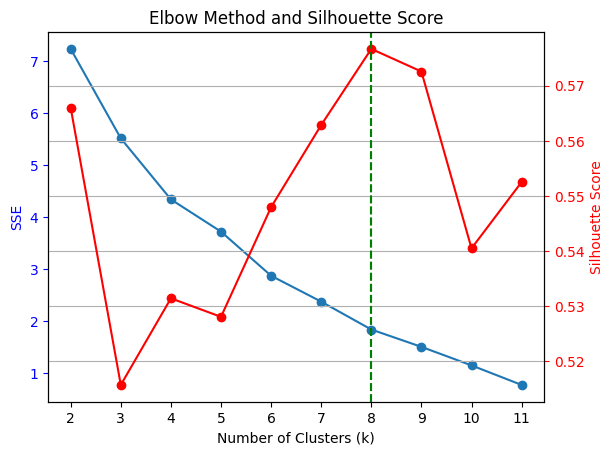

In [ ]:
# Data yang telah dinormalisasi
data_normalized = data_normalized.copy()

# Inisialisasi range nilai k
min_k = 2
max_k = 11

# List untuk menyimpan nilai SSE
sse_scores = []
# List untuk menyimpan nilai Silhouette Score
silhouette_scores = []

# Loop untuk mencari SSE dan Silhouette Score pada setiap nilai k
for k in range(min_k, max_k+1):
    kmeans = Kmeans1(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_normalized)
    sse = kmeans.inertia_
    sse_scores.append(sse)
    if len(np.unique(cluster_labels)) > 1:
        silhouette_avg = silhouette_score(data_normalized, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(0)

# Mencari nilai k optimal berdasarkan Silhouette Score
optimal_k = min_k + np.argmax(silhouette_scores)

# Plot grafik SSE dan Silhouette Score
fig, ax1 = plt.subplots()

ax1.plot(range(min_k, min_k + len(sse_scores)), sse_scores, marker='o')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('SSE', color='blue')
ax1.tick_params('y', colors='blue')

ax2 = ax1.twinx()
ax2.plot(range(min_k, min_k + len(silhouette_scores)), silhouette_scores, marker='o', color='red')
ax2.set_ylabel('Silhouette Score', color='red')
ax2.tick_params('y', colors='red')

# Tambahkan garis vertikal untuk nilai k optimal
ax1.axvline(x=optimal_k, color='green', linestyle='--')
ax2.axvline(x=optimal_k, color='green', linestyle='--')

plt.title('Elbow Method and Silhouette Score')
plt.xticks(range(min_k, min_k + len(sse_scores)))
plt.grid(True)
plt.show()

In [ ]:
sse = []
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = Kmeans1(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data_normalized)
    sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(data_normalized, labels)
    silhouette_scores.append(silhouette_avg)

table_elbow = {
    'K': range(2, 11),
    'sse': sse,
    'silhouette': silhouette_scores
}
df = pd.DataFrame(table_elbow)
df

,K,sse,silhouette
0,2,7.234944,0.565978
1,3,5.514371,0.515746
2,4,4.339410,0.531444
3,5,3.719511,0.528091
4,6,2.870379,0.547970
5,7,2.372581,0.562864
6,8,1.835974,0.576659
7,9,1.502640,0.572558
8,10,1.146042,0.540502


### **K-Means**

In [ ]:
data_cluster1 = merge_data[['tbc', 'Umur_TB', 'Tersedia air bersih', 'Ada lalat/nyamuk di sekitar tumpukan sampah', 'Ada sampah dan jarang dibersihkan', 
                    'Ada sampah tapi tidak banyak', 'Bersih tanpa ada sampah', 'Ada ventilasi tapi hanya sedikit', 'Ada ventilasi tapi jarang terbuka', 
                    'Ada ventilasi tapi selalu tertutup', 'Ada ventilasi disemua ruangan']]

#normalisasi data
cluster1 = data_normalized.copy()

In [ ]:
kmeans1 = KMeans(n_cluster=8, init_pp=False, seed=2014)
kmeans1.fit(cluster1)

In [ ]:
for i in range(5):
    # Melakukan proses fitting
    kmeans1.fit(cluster1)
    
    # Menampilkan nilai centroid pada setiap iterasi
    print(f"Nilai centroid iterasi ke-{i+1}:")
    print(kmeans1.centroid)
    print()

# Menampilkan nilai centroid akhir
print("Nilai centroid akhir:")
print(kmeans1.centroid)

Nilai centroid iterasi ke-1:
[[0.12824328 0.74437432 0.46765089 0.01628929 0.15314338 0.14815491
  0.15471588 0.12228934 0.03257858 0.00465257 0.31278297]
 [0.         0.         0.54683114 0.04441156 0.29694377 0.10984798
  0.15002067 0.17359946 0.         0.04441156 0.38321295]
 [0.02762692 0.99842065 0.02762692 0.         0.01146702 0.01615991
  0.         0.         0.0074001  0.         0.02022682]
 [0.08339575 0.95198353 0.21575215 0.01393636 0.08389829 0.06951136
  0.04840614 0.07735279 0.03149158 0.00373968 0.1031681 ]
 [0.19420233 0.35747475 0.67729489 0.02347404 0.25654881 0.24577984
  0.16215325 0.22643588 0.07207827 0.01366912 0.37577267]
 [0.05521576 0.99388373 0.05521576 0.         0.         0.05521576
  0.         0.         0.05521576 0.         0.        ]
 [0.05429687 0.99307245 0.07581702 0.01125658 0.01026357 0.03277673
  0.02152015 0.04304029 0.01125658 0.01125658 0.01026357]
 [0.02364449 0.99888385 0.02040025 0.         0.00246159 0.
  0.02118289 0.00771859 0.005

In [ ]:
predicted_kmeans1 = kmeans1.predict(cluster1)
print('Silhouette:', silhouette_score(cluster1, predicted_kmeans1))
print('SSE:', kmeans1.SSE)

Silhouette: 0.13786066757747145
SSE: 5.437251912054526


In [ ]:
frame1 = pd.DataFrame(cluster1)
frame1['cluster'] = predicted_kmeans1
frame1['cluster'].value_counts()

1    13
7     7
4     6
3     4
0     3
2     3
6     2
5     1
Name: cluster, dtype: int64

In [ ]:
predicted_kmeans1

array([2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 2, 1, 5, 3, 3, 7, 6, 4, 5, 6, 4, 6, 0, 5, 3], dtype=int32)

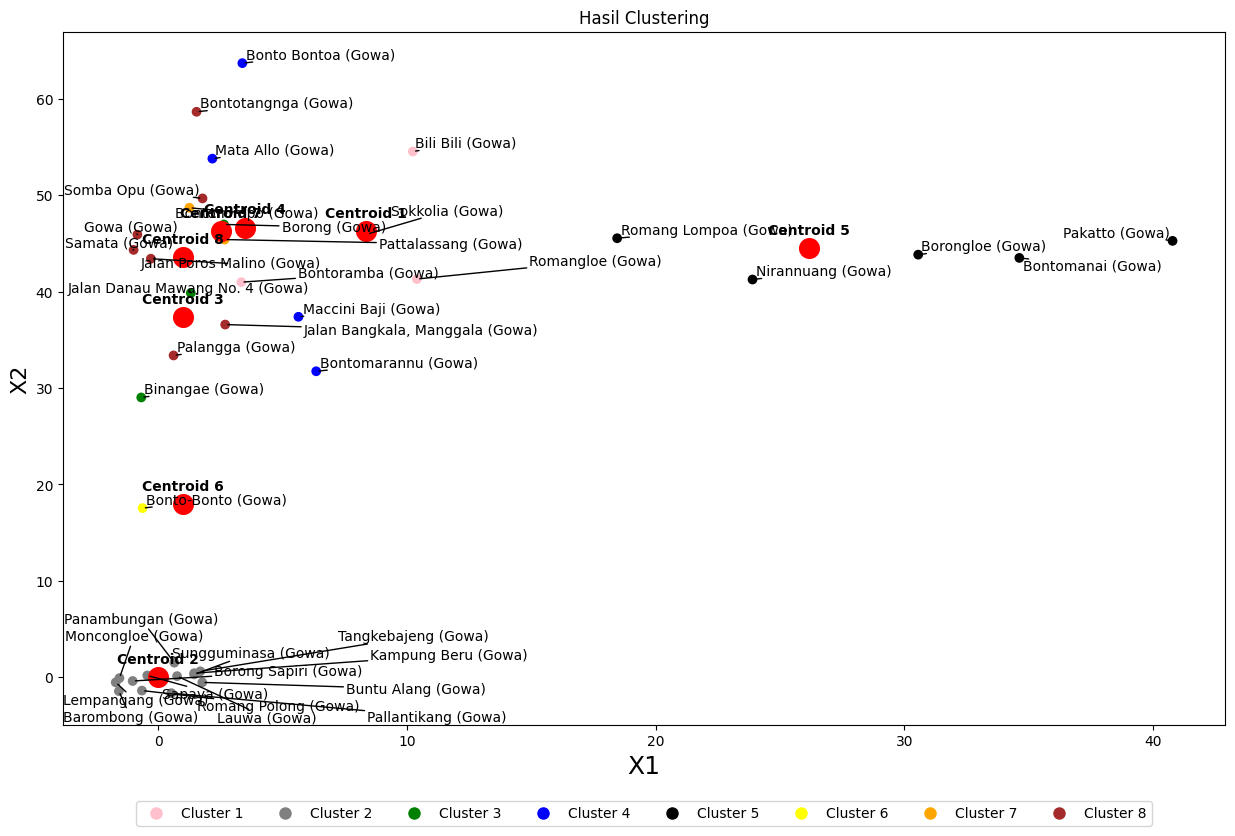

In [ ]:
# Pemetaan warna klaster
color_map = {0: 'pink', 1: 'grey', 2: 'green', 3: 'blue', 4: 'black', 5:'yellow', 6: 'orange', 7: 'brown'}  # Atur warna untuk masing-masing klaster

fig, ax = plt.subplots(figsize=(15, 9))

# Jittering pada posisi titik data
jitter = 2  # Besar jittering, sesuaikan sesuai kebutuhan
jittered_x = [x + random.uniform(-jitter, jitter) for x in data_cluster1.iloc[:, 0]]
jittered_y = [y + random.uniform(-jitter, jitter) for y in data_cluster1.iloc[:, 1]]
scatter = ax.scatter(jittered_x, jittered_y, c=[color_map[i] for i in predicted_kmeans1])

# Scatter plot dengan indeks dan keterangan klaster pada setiap titik data klaster
texts = []
for i, (x, y, alamat) in enumerate(zip(jittered_x, jittered_y, data_cluster1.index)):
    texts.append(ax.text(x, y, f'{alamat}', ha='center', va='bottom'))

# Menyesuaikan posisi tulisan agar tidak bertumpuk
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'))

# Menghitung dan menampilkan nilai centroid di tengah setiap klaster
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    cluster_data = data_cluster1[predicted_kmeans1 == i]
    centroid_x = np.mean(cluster_data.iloc[:, 0])
    centroid_y = np.mean(cluster_data.iloc[:, 1])
    plt.scatter(centroid_x, centroid_y, marker='o', color='red', s=200)
    plt.annotate(f'Centroid {i+1}', (centroid_x, centroid_y), textcoords="offset points", xytext=(0, 10), ha='center', color='black', weight='bold')

plt.xlabel('X1', fontsize=18)
plt.ylabel('X2', fontsize=16)
plt.title('Hasil Clustering')

# Menampilkan keterangan warna
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[i], markersize=10)
                 for i in range(len(color_map))]
legend_texts = [f'Cluster {i+1}' for i in range(len(color_map))]
plt.legend(legend_labels, legend_texts, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(color_map))

plt.show()


### **PSO K-Means**

In [ ]:
pso1 = ParticleSwarmOptimizedClustering(n_cluster=8, 
                                       n_particles=10, 
                                       data=cluster1, 
                                       hybrid=True,
                                       max_iter=4000, 
                                       print_debug=50)

In [ ]:
hist1 = pso1.run()

Initial global best score 0.4661971398932274
Iteration 0001/4000 current gbest score 0.466197139893227419
Iteration 0051/4000 current gbest score 0.462292802790422286
Iteration 0101/4000 current gbest score 0.461535657679873867
Iteration 0151/4000 current gbest score 0.461532823897707778
Iteration 0201/4000 current gbest score 0.461532140434969929
Iteration 0251/4000 current gbest score 0.461532086206489611
Iteration 0301/4000 current gbest score 0.461532084421197253
Iteration 0351/4000 current gbest score 0.461532083988039799
Iteration 0401/4000 current gbest score 0.461532082963319323
Iteration 0451/4000 current gbest score 0.461532082633209606
Iteration 0501/4000 current gbest score 0.461532082633080376
Iteration 0551/4000 current gbest score 0.461532082632087615
Iteration 0601/4000 current gbest score 0.461532082621518236
Iteration 0651/4000 current gbest score 0.461532082621501638
Iteration 0701/4000 current gbest score 0.461532082621495920
Iteration 0751/4000 current gbest score 

In [ ]:
pso_kmeans1 = KMeans(n_cluster=8)
pso_kmeans1.centroid = pso1.gbest_centroids.copy()

In [ ]:
predicted_pso1 = pso_kmeans1.predict(cluster1)

In [ ]:
print('Silhouette:', silhouette_score(cluster1, predicted_pso1))
print('SSE:', calc_sse(centroids=pso1.gbest_centroids, 
                       data=cluster1, 
                       labels=predicted_pso1))

Silhouette: 0.3067552565206609
SSE: 2.843128847888561


In [ ]:
frame1 = pd.DataFrame(cluster1)
frame1['cluster'] = predicted_pso1
frame1['cluster'].value_counts()

0    11
5     8
3     6
2     5
4     4
6     3
7     1
1     1
Name: cluster, dtype: int64

In [ ]:
predicted_pso1

array([6, 2, 4, 5, 0, 4, 5, 6, 5, 5, 0, 5, 2, 2, 5, 4, 4, 0, 0, 5, 5, 0,
       6, 2, 0, 2, 0, 7, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0, 1])

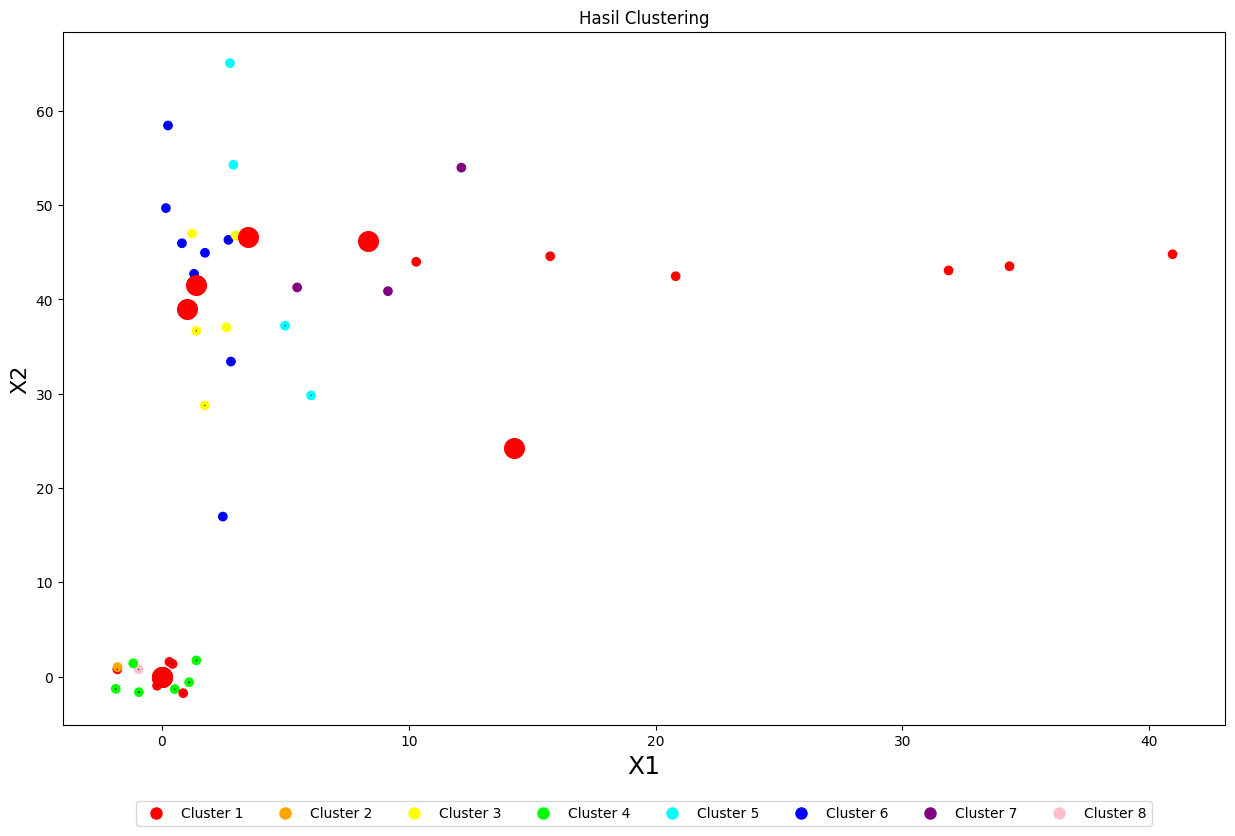

In [ ]:
# Pemetaan warna klaster
color_map = {0: '#FF0000', 1: '#FFA500', 2: '#FFFF00', 3: '#00FF00', 4: '#00FFFF', 5:'#0000FF', 6: '#800080', 7: '#FFC0CB'}

fig, ax = plt.subplots(figsize=(15,9))

# Jittering pada posisi titik data
jitter = 2
jittered_x = [x + random.uniform(-jitter, jitter) for x in data_cluster1.iloc[:, 0]]
jittered_y = [y + random.uniform(-jitter, jitter) for y in data_cluster1.iloc[:, 1]]
scatter = ax.scatter(jittered_x, jittered_y, c=[color_map[i] for i in predicted_pso1])

# Scatter plot dengan indeks dan keterangan klaster pada setiap titik data klaster
texts = []
for i, (x, y, alamat) in enumerate(zip(jittered_x, jittered_y, data_cluster1.index)):
    texts.append(ax.text(x, y, '', ha='center', va='bottom'))

# Menyesuaikan posisi tulisan agar tidak bertumpuk
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'))

# Menghitung dan menampilkan nilai centroid di tengah setiap klaster
centroids = pso_kmeans1.centroid
for i, centroid in enumerate(centroids):
    cluster_data = data_cluster1[predicted_pso1 == i]
    centroid_x = np.mean(cluster_data.iloc[:, 0])
    centroid_y = np.mean(cluster_data.iloc[:, 1])
    plt.scatter(centroid_x, centroid_y, marker='o', color='red', s=200)
    plt.annotate('', (centroid_x, centroid_y), textcoords="offset points", xytext=(0, 10), ha='center', color='black', weight='bold')

plt.xlabel('X1', fontsize=18)
plt.ylabel('X2', fontsize=16)
plt.title('Hasil Clustering')

# Menampilkan keterangan warna
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[i], markersize=10)
                 for i in range(len(color_map))]
legend_texts = [f'Cluster {i+1}' for i in range(len(color_map))]
plt.legend(legend_labels, legend_texts, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(color_map))

plt.show()


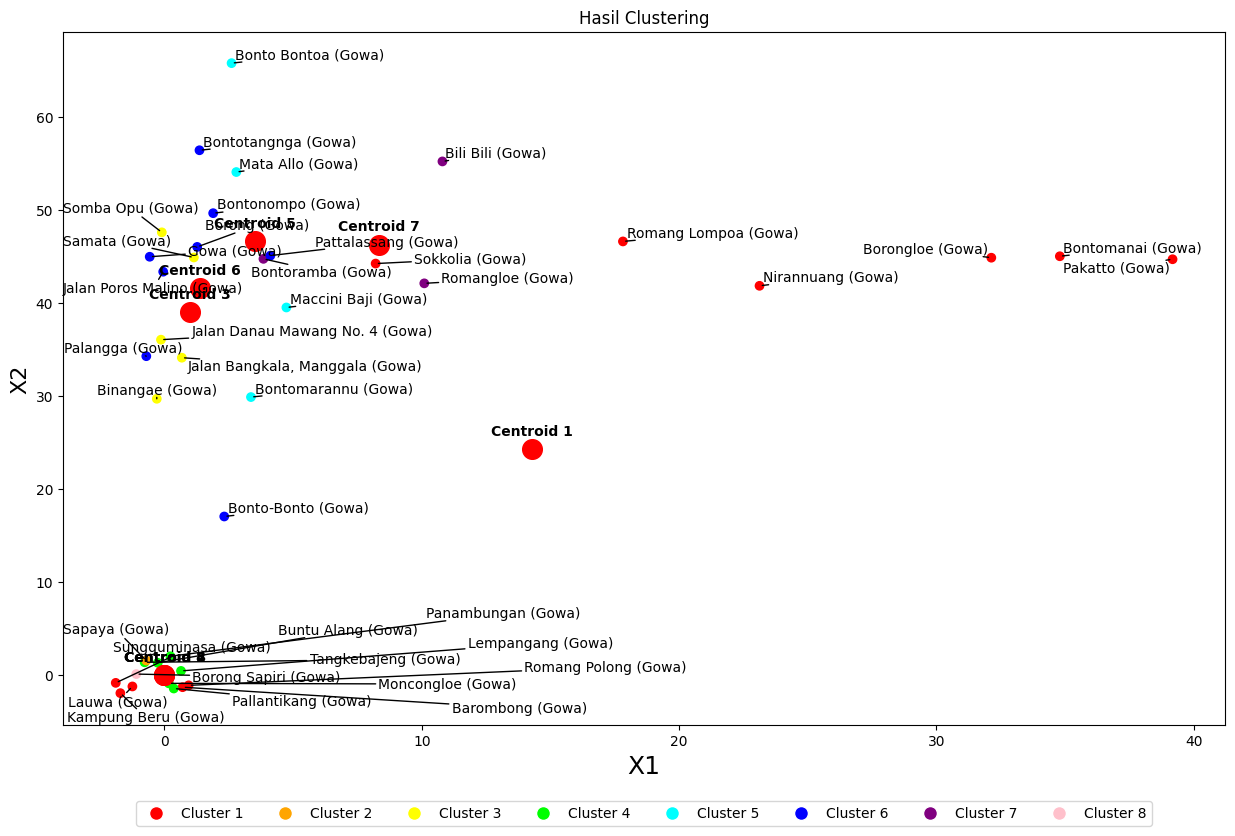

In [ ]:
# Pemetaan warna klaster
color_map = {0: '#FF0000', 1: '#FFA500', 2: '#FFFF00', 3: '#00FF00', 4: '#00FFFF', 5:'#0000FF', 6: '#800080', 7: '#FFC0CB'}

fig, ax = plt.subplots(figsize=(15, 9))

# Jittering pada posisi titik data
jitter = 2  # Besar jittering, sesuaikan sesuai kebutuhan
jittered_x = [x + random.uniform(-jitter, jitter) for x in data_cluster1.iloc[:, 0]]
jittered_y = [y + random.uniform(-jitter, jitter) for y in data_cluster1.iloc[:, 1]]
scatter = ax.scatter(jittered_x, jittered_y, c=[color_map[i] for i in predicted_pso1])
# Scatter plot dengan indeks dan keterangan klaster pada setiap titik data klaster
texts = []
for i, (x, y, alamat) in enumerate(zip(jittered_x, jittered_y, data_cluster1.index)):
    texts.append(ax.text(x, y, f'{alamat}', ha='center', va='bottom'))

# Menyesuaikan posisi tulisan agar tidak bertumpuk
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'))

# Menghitung dan menampilkan nilai centroid di tengah setiap klaster
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    cluster_data = data_cluster1[predicted_pso1 == i]
    centroid_x = np.mean(cluster_data.iloc[:, 0])
    centroid_y = np.mean(cluster_data.iloc[:, 1])
    plt.scatter(centroid_x, centroid_y, marker='o', color='red', s=200)
    plt.annotate(f'Centroid {i+1}', (centroid_x, centroid_y), textcoords="offset points", xytext=(0, 10), ha='center', color='black', weight='bold')

plt.xlabel('X1', fontsize=18)
plt.ylabel('X2', fontsize=16)
plt.title('Hasil Clustering')

# Menampilkan keterangan warna
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[i], markersize=10)
                 for i in range(len(color_map))]
legend_texts = [f'Cluster {i+1}' for i in range(len(color_map))]
plt.legend(legend_labels, legend_texts, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(color_map))

plt.show()


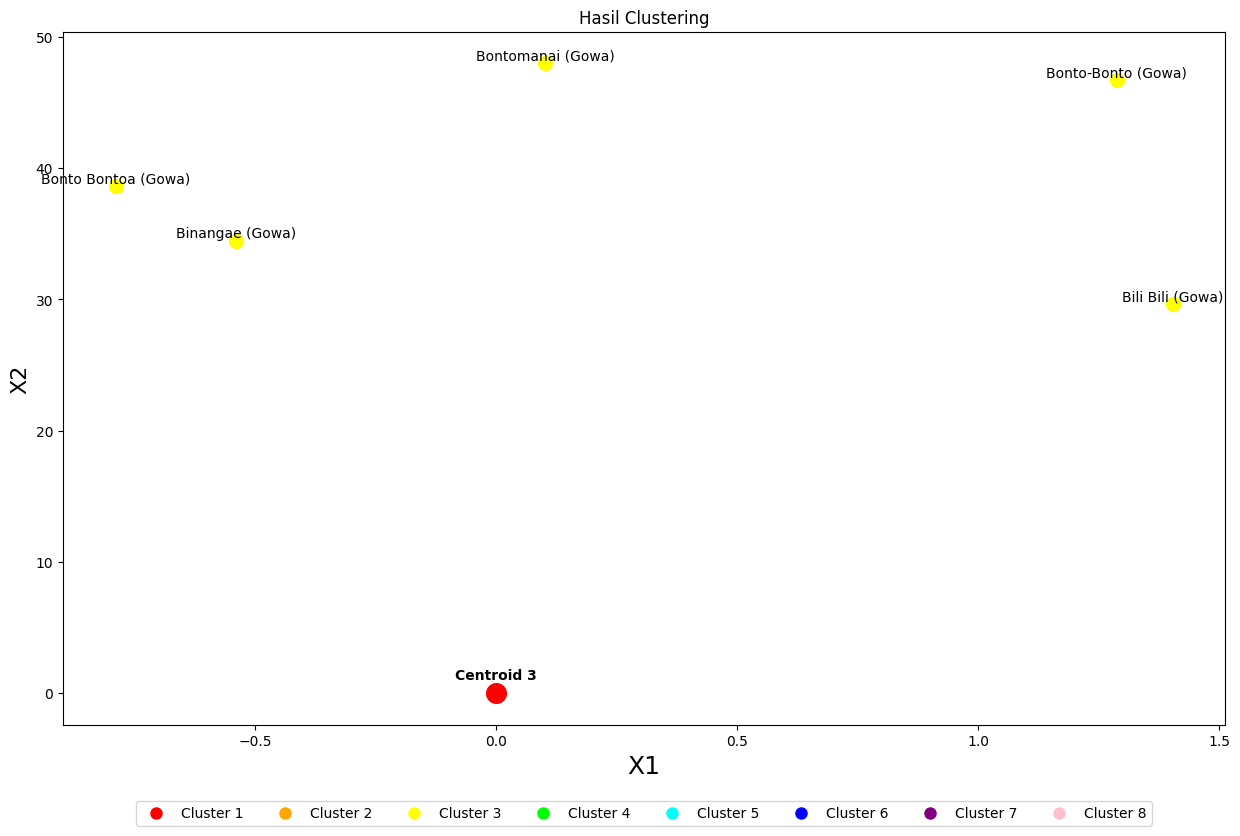

In [ ]:
# Pemetaan warna klaster
color_map = {0: '#FF0000', 1: '#FFA500', 2: '#FFFF00', 3: '#00FF00', 4: '#00FFFF', 5:'#0000FF', 6: '#800080', 7: '#FFC0CB'}

fig, ax = plt.subplots(figsize=(15, 9))

# Jittering pada posisi titik data
jitter = 2  # Besar jittering, sesuaikan sesuai kebutuhan
jittered_x = [x + random.uniform(-jitter, jitter) for x in data_cluster1.iloc[:, 0]]
jittered_y = [y + random.uniform(-jitter, jitter) for y in data_cluster1.iloc[:, 1]]

# Scatter plot hanya untuk klaster 1
cluster1_x = []
cluster1_y = []
for i, cluster_label in enumerate(predicted_pso1):
    if cluster_label == 2:  # Filter hanya klaster 0
        cluster1_x.append(jittered_x[i])
        cluster1_y.append(jittered_y[i])
plt.scatter(cluster1_x, cluster1_y, c=color_map[2], s=100)

# Menampilkan keterangan indeks alamat pada setiap titik data klaster 1
texts = []
for x, y, alamat in zip(cluster1_x, cluster1_y, data_cluster1.index):
    texts.append(ax.text(x, y, alamat, ha='center', va='bottom'))

# Menghitung dan menampilkan nilai centroid di tengah klaster 1
centroids = pso_kmeans1.centroid
for i, centroid in enumerate(centroids):
    if i == 3:  # Filter hanya klaster 1
        cluster_data = data_cluster1[predicted_pso1 == i]
        centroid_x = np.mean(cluster_data.iloc[:, 0])
        centroid_y = np.mean(cluster_data.iloc[:, 1])
        plt.scatter(centroid_x, centroid_y, marker='o', color='red', s=200)
        plt.annotate(f'Centroid 3', (centroid_x, centroid_y), textcoords="offset points", xytext=(0, 10), ha='center', color='black', weight='bold')

plt.xlabel('X1', fontsize=18)
plt.ylabel('X2', fontsize=16)
plt.title('Hasil Clustering')

# Menampilkan keterangan warna
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[i], markersize=10)
                 for i in range(len(color_map))]
legend_texts = [f'Cluster {i+1}' for i in range(len(color_map))]
plt.legend(legend_labels, legend_texts, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(color_map))


###**Evaluasi Optimasi**

In [ ]:
#evaluasi sse dan silhoute kmeans dengan 20 iterasi
kmeanspp = {
    'silhouette': [],
    'sse' : [],
    'dbi': [],
}
for _ in range(20):
    kmean_rep = KMeans(n_cluster=8, init_pp=True, seed=2014)
    kmean_rep.fit(cluster1)
    predicted_kmean_rep = kmean_rep.predict(cluster1)
    silhouette = silhouette_score(cluster1, 
                                  predicted_kmean_rep)
    sse = kmean_rep.SSE
    dbi = davies_bouldin_score(cluster1, predicted_kmean_rep)
    kmeanspp['silhouette'].append(silhouette)
    kmeanspp['sse'].append(sse)
    kmeanspp['dbi'].append(dbi)

In [ ]:
#evaluasi sse dan silhoute pso-kmeans dengan 20 iterasi
pso_hybrid = {
    'silhouette': [],
    'sse' : [],
    'dbi': [],
}
for _ in range(10):
    pso_rep2 = ParticleSwarmOptimizedClustering(n_cluster=8, 
                                               n_particles=20, 
                                               data=cluster1, 
                                               hybrid=True, 
                                               max_iter=2000, 
                                               print_debug=2000)
    pso_rep2.run()
    pso_kmeans2 = KMeans(n_cluster=8, 
                        init_pp=False, 
                        seed=144)
    pso_kmeans2.centroid = pso_rep2.gbest_centroids.copy()
    predicted_pso_rep2 = pso_kmeans2.predict(cluster1)
    
    silhouette = silhouette_score(cluster1, 
                                  predicted_pso_rep2)
    sse = calc_sse(centroids=pso_rep2.gbest_centroids, 
                   data=cluster1, 
                   labels=predicted_pso_rep2)
    dbi = davies_bouldin_score(cluster1, predicted_pso_rep2)

    pso_hybrid['silhouette'].append(silhouette)
    pso_hybrid['sse'].append(sse)
    pso_hybrid['dbi'].append(dbi)

Initial global best score 0.4436882541980972
Iteration 0001/2000 current gbest score 0.443688254198097209
Finish with gbest score 0.443688254198097209
Initial global best score 0.4559597672266836
Iteration 0001/2000 current gbest score 0.455959767226683577
Finish with gbest score 0.415925834566402253
Initial global best score 0.4652973651045222
Iteration 0001/2000 current gbest score 0.465297365104522187
Finish with gbest score 0.356789121626681305
Initial global best score 0.4292502390829141
Iteration 0001/2000 current gbest score 0.429250239082914098
Finish with gbest score 0.429250239082914042
Initial global best score 0.4779181995674837
Iteration 0001/2000 current gbest score 0.477918199567483715
Finish with gbest score 0.457165312394809342
Initial global best score 0.5391751630162506
Iteration 0001/2000 current gbest score 0.539175163016250569
Finish with gbest score 0.429684252448531923
Initial global best score 0.42887312845921927
Iteration 0001/2000 current gbest score 0.428873

In [ ]:
evaluasi = {
    'method' : ['K-Means', 'PSO Kmeans'],
    'sse_mean' : [
        np.around(np.mean(kmeanspp['sse']), decimals=10),
        np.around(np.mean(pso_hybrid['sse']), decimals=10),
    ],
    'silhouette_mean' : [      
        np.around(np.mean(kmeanspp['silhouette']), decimals=10),
        np.around(np.mean(pso_hybrid['silhouette']), decimals=10), 
    ],
    'dbi_mean': [
        np.around(np.mean(kmeanspp['dbi']), decimals=10),
        np.around(np.mean(pso_hybrid['dbi']), decimals=10),
    ]
}

In [ ]:
eval = pd.DataFrame.from_dict(evaluasi)
eval

,method,sse_mean,silhouette_mean,dbi_mean
0,K-Means,5.163784,0.359367,0.839046
1,PSO Kmeans,2.354081,0.444113,0.832713


###**Hitung SSE, Silhouette, DBI**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

# contoh data
X = data_cluster1.copy()

# membuat model kmeans dengan 3 cluster
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# mengambil data pada cluster 2
cluster1_data = X[kmeans.labels_ == 1]

# mengambil centroid pada cluster 2
centroid1 = kmeans.cluster_centers_[1]

# menghitung jarak data pada cluster 2 ke centroid cluster 2
distances = pairwise_distances(cluster1_data, centroid1.reshape(1, -1))

# menampilkan hasil jarak
print(distances)

[[ 7.60574143]
 [ 3.17856866]
 [11.00280595]
 [11.01120331]
 [12.80879157]]


In [ ]:
centroid = kmeans.cluster_centers_
centroid

array([[ 3.75      , 20.30132545],
       [29.4       , 34.08955766],
       [ 0.27777778,  5.89506173]])

In [ ]:
# hitung kuadrat jarak dan jumlahkan untuk setiap data point
sse = ((distances)**2).sum(axis=1)

# jumlahkan nilai SSE untuk semua data point
total_sse = sse.sum()

# tampilkan nilai SSE
print('Nilai SSE:', total_sse)

Nilai SSE: 474.3240801338511


In [ ]:
print(centroid1)

[29.4        34.08955766]


In [ ]:
cluster1_data

,tbc,Umur
Bontomanai (Gowa),36.0,37.869413
Borongloe (Gowa),32.0,32.261089
Nirannuang (Gowa),22.0,25.946970
Pakatto (Gowa),40.0,37.070597
Romang Lompoa (Gowa),17.0,37.299720


In [ ]:
# menghitung nilai silhoutte untuk seluruh data
silhouette_vals = silhouette_samples(X, kmeans.labels_)

# mengambil nilai silhoutte untuk data pada cluster 2
cluster2_silhouette_vals = silhouette_vals[kmeans.labels_ == 1]

# menampilkan rata-rata nilai silhoutte pada cluster 2
print("Silhouette:", cluster2_silhouette_vals.mean())

Silhouette: 0.4689108183810296


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Data contoh
data = [[36, 37.869413],
        [32, 32.261089],
        [40, 37.070597],
        [17, 37.29972],
        [22, 25.94697]]

# Centroid cluster
centroids = [[29, 29.555],
             [40, 37.299]]

# Label cluster untuk setiap data
labels = [0, 0, 0, 0, 1]

# Menghitung nilai DBI
dbi = davies_bouldin_score(data, labels)

print("Nilai DBI:", dbi)

# Mencetak data dalam cluster 1
cluster_1_data = [data[i] for i in range(len(data)) if labels[i] == 0]
print("Data dalam Cluster 1:")
for d in cluster_1_data:
    print(d)

Nilai DBI: 0.5834073344494501
Data dalam Cluster 1:
[36, 37.869413]
[32, 32.261089]
[40, 37.070597]
[17, 37.29972]


In [ ]:
#create new column for cluster labels associated with each subject
data_cluster1['labels'] = predicted_kmeans1
data_cluster1['Segment'] = data_cluster1['labels'].map({0: 'First', 1: 'Second', 2: 'Third'})

[0.6        0.86771372]


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Data Anda dengan 3 cluster
X = data_cluster1.copy()

# Jumlah cluster yang diinginkan
n_clusters = 3

# Melakukan clustering menggunakan KMeans
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(X)

# Menentukan cluster yang ingin dilihat silhouette-nya
for target_cluster in range(n_clusters):
    # Mengambil data pada cluster yang ditentukan
    cluster_data = X[cluster_labels == target_cluster]
    
    # Menghitung nilai silhouette untuk setiap titik data dalam cluster yang ingin dilihat
    silhouette_values = silhouette_samples(X, cluster_labels)
    
    # Mengambil nilai silhouette rata-rata untuk semua titik data dalam cluster yang ingin dilihat
    silhouette_avg = np.mean(silhouette_values[cluster_labels == target_cluster])
    
    # Cetak nilai Silhouette Score untuk cluster yang ingin dilihat
    print("Nilai Silhouette untuk cluster", target_cluster, "adalah:", silhouette_avg)


Nilai Silhouette untuk cluster 0 adalah: 0.39364867983281876
Nilai Silhouette untuk cluster 1 adalah: 0.4689108183810296
Nilai Silhouette untuk cluster 2 adalah: 0.613497873941856


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import numpy as np

# Data Anda dengan 3 cluster
X = data_cluster1.copy()

# Jumlah cluster yang diinginkan
n_clusters = 3

# Melakukan clustering menggunakan KMeans
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(X)

# Inisialisasi array untuk menyimpan nilai DBI untuk setiap cluster
dbi_values = np.zeros(n_clusters)

# Loop untuk setiap cluster
for target_cluster in range(n_clusters):
    # Mengambil data pada cluster yang ditentukan
    cluster_data = X[cluster_labels == target_cluster]
    
    # Menghitung centroid dari cluster yang ditentukan
    centroid = clusterer.cluster_centers_[target_cluster]
    
    # Menghitung jarak antara setiap titik data dalam cluster dengan centroidnya
    distances = pairwise_distances(cluster_data, [centroid])
    
    # Menghitung rata-rata jarak antara setiap pasang titik data dalam cluster
    mean_distance = np.mean(distances)
    
    # Menghitung nilai intra-cluster scatter
    intra_cluster_scatter = np.sum(pairwise_distances(cluster_data, metric='sqeuclidean')) / (2 * len(cluster_data))
    
    # Menghitung DBI untuk cluster yang ditentukan
    dbi_values[target_cluster] = (intra_cluster_scatter + mean_distance) / mean_distance
    
    # Cetak nilai DBI untuk cluster yang ditentukan
    print("Nilai DBI :", dbi_values)


Nilai DBI untuk cluster 0 adalah: 120.80705119148382
Nilai DBI untuk cluster 1 adalah: 53.00111019292425
Nilai DBI untuk cluster 2 adalah: 92.20092124482726


In [ ]:
cluster1_data

,tbc,Umur
Bontomanai (Gowa),36.0,37.869413
Borongloe (Gowa),32.0,32.261089
Nirannuang (Gowa),22.0,25.946970
Pakatto (Gowa),40.0,37.070597
Romang Lompoa (Gowa),17.0,37.299720


In [ ]:
data_cluster1

,tbc,Umur
Bili Bili (Gowa),11.0,28.659933
Binangae (Gowa),1.0,9.666667
Bonto Bontoa (Gowa),2.0,27.333333
Bonto-Bonto (Gowa),1.0,6.000000
Bontomanai (Gowa),36.0,37.869413
Bontomarannu (Gowa),5.0,13.933333
Bontonompo (Gowa),2.0,16.500000
Bontoramba (Gowa),4.0,21.625000
Bontotangnga (Gowa),1.0,19.333333
Borong (Gowa),1.0,15.000000


##**Pattern Evaluation**

In [ ]:
# Menghitung dan menampilkan nilai rentang usia di tengah setiap klaster
age_ranges = []
for i in range(8):
    cluster_data = data_cluster1[predicted_pso1 == i]
    min_age = cluster_data["Umur_TB"].min()
    max_age = cluster_data["Umur_TB"].max()

    # Penanganan nilai 0 atau NaN
    if np.isnan(max_age):
        age_range = f"{int(min_age)}+"
    else:
        if np.isnan(min_age):
            age_range = f"0-{int(max_age)}"
        else:
            age_range = f'{int(min_age)}-{int(max_age)}'

    age_ranges.append(age_range)

# Mengganti semua nilai pada setiap klaster menjadi rentang usia
for i in range(8):
    data_cluster1.loc[predicted_pso1 == i, 'Rentang_Usia_TB'] = age_ranges[i]

data_cluster1 = data_cluster1.drop(['Umur_TB'], axis=1)

In [ ]:
#create new column for cluster labels associated with each subject
data_cluster1['labels'] = predicted_kmeans1
data_cluster1['Segment'] = data_cluster1['labels'].map({0: 'First', 1: 'Second', 2: 'Third', 3: 'Fourth', 4: 'Fifth', 5: 'Sistxh', 6: 'Seventh', 7: 'Eighth'})

In [ ]:
#create new column for cluster labels associated with each subject
data_cluster1['labels'] = predicted_pso1
data_cluster1['Segment'] = data_cluster1['labels'].map({0: 'First', 1: 'Second', 2: 'Third', 3: 'Fourth', 4: 'Fifth', 5: 'Sistxh', 6: 'Seventh', 7: 'Eighth'})

In [ ]:
data_cluster1

,tbc,Tersedia air bersih,Ada lalat/nyamuk di sekitar tumpukan sampah,Ada sampah dan jarang dibersihkan,Ada sampah tapi tidak banyak,Bersih tanpa ada sampah,Ada ventilasi tapi hanya sedikit,Ada ventilasi tapi jarang terbuka,Ada ventilasi tapi selalu tertutup,Ada ventilasi disemua ruangan,Rentang_Usia_TB,labels,Segment
Bili Bili (Gowa),11.0,33.0,1.0,14.0,12.0,7.0,13.0,2.0,1.0,18.0,40-55,6,Seventh
Binangae (Gowa),1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,29-48,2,Third
Bonto Bontoa (Gowa),2.0,15.0,2.0,4.0,7.0,2.0,5.0,3.0,1.0,6.0,31-64,4,Fifth
Bonto-Bonto (Gowa),1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,18-58,5,Sistxh
Bontomanai (Gowa),36.0,119.0,5.0,43.0,48.0,23.0,39.0,15.0,2.0,63.0,0-46,0,First
Bontomarannu (Gowa),5.0,8.0,0.0,4.0,2.0,2.0,2.0,1.0,0.0,5.0,31-64,4,Fifth
Bontonompo (Gowa),2.0,3.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,18-58,5,Sistxh
Bontoramba (Gowa),4.0,20.0,1.0,8.0,4.0,7.0,4.0,2.0,0.0,14.0,40-55,6,Seventh
Bontotangnga (Gowa),1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,18-58,5,Sistxh
Borong (Gowa),1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,18-58,5,Sistxh


In [ ]:
#Order the cluster
data_cluster1['Segment'] = data_cluster1['Segment'].astype('category')
data_cluster1['Segment'] = data_cluster1['Segment'].cat.reorder_categories(['First', 'Second', 'Third', 'Fourth', 'Fifth', 'Sistxh', 'Seventh', 'Eighth'])

In [ ]:
data_cluster1[data_cluster1['labels']==0]

,tbc,Tersedia air bersih,Ada lalat/nyamuk di sekitar tumpukan sampah,Ada sampah dan jarang dibersihkan,Ada sampah tapi tidak banyak,Bersih tanpa ada sampah,Ada ventilasi tapi hanya sedikit,Ada ventilasi tapi jarang terbuka,Ada ventilasi tapi selalu tertutup,Ada ventilasi disemua ruangan,Rentang_Usia_TB,labels,Segment
Bontomanai (Gowa),36.0,119.0,5.0,43.0,48.0,23.0,39.0,15.0,2.0,63.0,0-46,0,First
Borongloe (Gowa),32.0,98.0,4.0,35.0,33.0,28.0,33.0,6.0,0.0,61.0,0-46,0,First
Nirannuang (Gowa),22.0,45.0,0.0,12.0,22.0,13.0,14.0,6.0,3.0,24.0,0-46,0,First
Pakatto (Gowa),40.0,138.0,6.0,56.0,51.0,28.0,47.0,20.0,1.0,73.0,0-46,0,First
Romang Lompoa (Gowa),17.0,83.0,3.0,30.0,26.0,25.0,25.0,11.0,2.0,46.0,0-46,0,First
Sokkolia (Gowa),10.0,75.0,3.0,38.0,21.0,13.0,29.0,3.0,1.0,42.0,0-46,0,First
Barombong (Gowa),0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0-46,0,First
Kampung Beru (Gowa),0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0-46,0,First
Sungguminasa (Gowa),0.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0-46,0,First
Lauwa (Gowa),0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0-46,0,First


In [ ]:
dict_cat = {}
dict_num = {}
for cat in data_cluster1.select_dtypes('object'):
  if len(data_cluster1[cat]) > 0:  # Periksa apakah ada data tersedia
    dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in data_cluster1.select_dtypes(['int64', 'float64', 'object']):
  if (num == 'Total'):
    continue
  dict_num[num] = ['mean']

data_cluster1.rename(columns={'labels': 'Total'}, inplace=True)
data_percluster1 = data_cluster1.groupby('Segment').agg({
 'Total': 'count',
 **dict_num,
 **dict_cat
}).T


In [ ]:
data_cluster1['coord'] = coord1

In [ ]:
data_cluster1 = data_cluster1.T
data_percluster1.to_json(r'cluster1_result.json')
data_cluster1.to_json(r'cluster1_df.json')

#**CLUSTER2**

###**Elbow dan Silhouette**

In [ ]:
data = merge_data.copy()

In [ ]:
selected_columns = ['dbd', 'Umur_DBD','Tersedia air bersih', 'Ada lalat/nyamuk di sekitar tumpukan sampah', 'Ada sampah dan jarang dibersihkan', 
                    'Ada sampah tapi tidak banyak', 'Bersih tanpa ada sampah', 'Ada ventilasi tapi hanya sedikit', 'Ada ventilasi tapi jarang terbuka', 
                    'Ada ventilasi tapi selalu tertutup', 'Ada ventilasi disemua ruangan']
data_selected = data[selected_columns]

In [ ]:
# Normalisasi L2
normalizer = Normalizer(norm='l2')
data_normalized = normalizer.transform(data_selected)

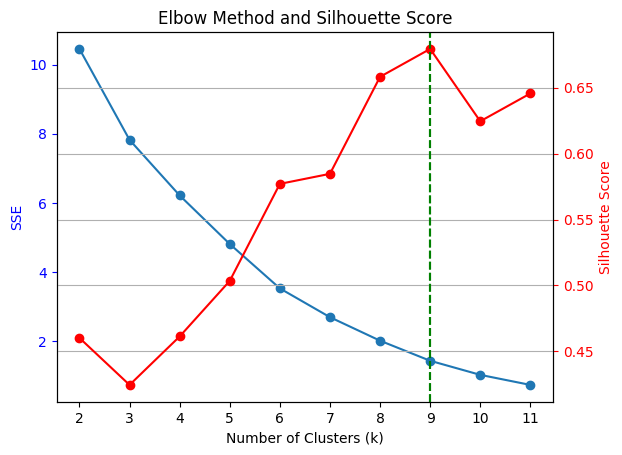

In [ ]:
# Data yang telah dinormalisasi
data_normalized = data_normalized.copy()

# Inisialisasi range nilai k
min_k = 2
max_k = 11

# List untuk menyimpan nilai SSE
sse_scores = []
# List untuk menyimpan nilai Silhouette Score
silhouette_scores = []

# Loop untuk mencari SSE dan Silhouette Score pada setiap nilai k
for k in range(min_k, max_k+1):
    kmeans = Kmeans1(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_normalized)
    sse = kmeans.inertia_
    sse_scores.append(sse)
    if len(np.unique(cluster_labels)) > 1:
        silhouette_avg = silhouette_score(data_normalized, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(0)

# Mencari nilai k optimal berdasarkan Silhouette Score
optimal_k = min_k + np.argmax(silhouette_scores)

# Plot grafik SSE dan Silhouette Score
fig, ax1 = plt.subplots()

ax1.plot(range(min_k, min_k + len(sse_scores)), sse_scores, marker='o')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('SSE', color='blue')
ax1.tick_params('y', colors='blue')

ax2 = ax1.twinx()
ax2.plot(range(min_k, min_k + len(silhouette_scores)), silhouette_scores, marker='o', color='red')
ax2.set_ylabel('Silhouette Score', color='red')
ax2.tick_params('y', colors='red')

# Tambahkan garis vertikal untuk nilai k optimal
ax1.axvline(x=optimal_k, color='green', linestyle='--')
ax2.axvline(x=optimal_k, color='green', linestyle='--')

plt.title('Elbow Method and Silhouette Score')
plt.xticks(range(min_k, min_k + len(sse_scores)))
plt.grid(True)
plt.show()

In [ ]:
sse = []
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = Kmeans1(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data_normalized)
    sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(data_normalized, labels)
    silhouette_scores.append(silhouette_avg)

table_elbow = {
    'K': range(2, 11),
    'sse': sse,
    'silhouette': silhouette_scores
}
df = pd.DataFrame(table_elbow)
df

,K,sse,silhouette
0,2,10.457035,0.460254
1,3,7.822886,0.424616
2,4,6.213960,0.461346
3,5,4.806768,0.503470
4,6,3.521625,0.577035
5,7,2.687658,0.584655
6,8,2.006804,0.658206
7,9,1.425154,0.679347
8,10,1.017285,0.624500


### **K-Means**

In [ ]:
data_cluster2 = merge_data[['dbd', 'Umur_DBD','Tersedia air bersih', 'Ada lalat/nyamuk di sekitar tumpukan sampah', 'Ada sampah dan jarang dibersihkan', 
                    'Ada sampah tapi tidak banyak', 'Bersih tanpa ada sampah', 'Ada ventilasi tapi hanya sedikit', 'Ada ventilasi tapi jarang terbuka', 
                    'Ada ventilasi tapi selalu tertutup', 'Ada ventilasi disemua ruangan']] 

# Standardize data
cluster2 = data_normalized.copy()

In [ ]:
kmeans2 = KMeans(n_cluster=9)
kmeans2.fit(cluster2)

In [ ]:
predicted_kmeans2 = kmeans2.predict(cluster2)
print('Silhouette:', silhouette_score(cluster2, predicted_kmeans2))
print('SSE:', kmeans2.SSE)

Silhouette: 0.48041913528939206
SSE: 5.409723511471576


In [ ]:
frame2 = pd.DataFrame(cluster2)
frame2['cluster'] = predicted_kmeans2
frame2['cluster'].value_counts()

6    12
1     7
3     5
0     5
4     3
8     2
5     2
7     2
2     1
Name: cluster, dtype: int64

In [ ]:
predicted_kmeans2

array([6, 3, 6, 8, 6, 6, 2, 6, 3, 8, 6, 0, 0, 5, 4, 7, 6, 6, 6, 4, 1, 6,
       6, 0, 6, 0, 1, 1, 1, 1, 7, 1, 1, 3, 5, 3, 3, 0, 4])

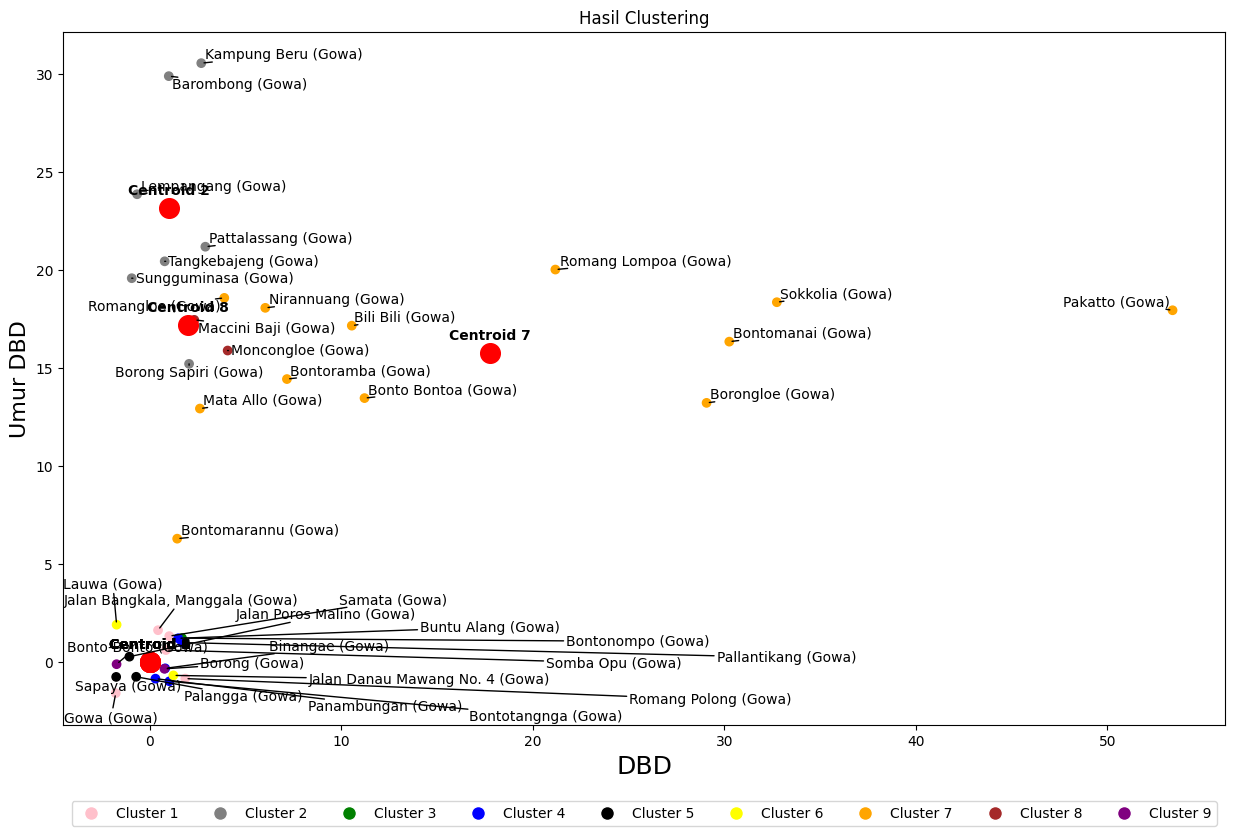

In [ ]:
# Pemetaan warna klaster
color_map = {0: 'pink', 1: 'grey', 2: 'green', 3: 'blue', 4: 'black', 5:'yellow', 6: 'orange', 7: 'brown', 8: 'purple'}  # Atur warna untuk masing-masing klaster

fig, ax = plt.subplots(figsize=(15, 9))

# Jittering pada posisi titik data
jitter = 2  # Besar jittering, sesuaikan sesuai kebutuhan
jittered_x = [x + random.uniform(-jitter, jitter) for x in data_cluster2.iloc[:, 0]]
jittered_y = [y + random.uniform(-jitter, jitter) for y in data_cluster2.iloc[:, 1]]
scatter = ax.scatter(jittered_x, jittered_y, c=[color_map[i] for i in predicted_kmeans2])
# Scatter plot dengan indeks dan keterangan klaster pada setiap titik data klaster
texts = []
for i, (x, y, alamat) in enumerate(zip(jittered_x, jittered_y, data_cluster2.index)):
    texts.append(ax.text(x, y, f'{alamat}', ha='center', va='bottom'))

# Menyesuaikan posisi tulisan agar tidak bertumpuk
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'))

# Menghitung dan menampilkan nilai centroid di tengah setiap klaster
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    cluster_data = data_cluster2[predicted_kmeans2 == i]
    centroid_x = np.mean(cluster_data.iloc[:, 0])
    centroid_y = np.mean(cluster_data.iloc[:, 1])
    plt.scatter(centroid_x, centroid_y, marker='o', color='red', s=200)
    plt.annotate(f'Centroid {i+1}', (centroid_x, centroid_y), textcoords="offset points", xytext=(0, 10), ha='center', color='black', weight='bold')

plt.xlabel('DBD', fontsize=18)
plt.ylabel('Umur DBD', fontsize=16)
plt.title('Hasil Clustering')

# Menampilkan keterangan warna
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[i], markersize=10)
                 for i in range(len(color_map))]
legend_texts = [f'Cluster {i+1}' for i in range(len(color_map))]
plt.legend(legend_labels, legend_texts, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(color_map))

plt.show()


### **PSO K-Means**

In [ ]:
pso2 = ParticleSwarmOptimizedClustering(n_cluster=9, 
                                       n_particles=10, 
                                       data=cluster2, 
                                       hybrid=True,
                                       max_iter=4000, 
                                       print_debug=50)

In [ ]:
hist = pso2.run()

Initial global best score 0.4098425090461891
Iteration 0001/4000 current gbest score 0.409842509046189074
Iteration 0051/4000 current gbest score 0.409842509046189074
Iteration 0101/4000 current gbest score 0.409842509046189074
Iteration 0151/4000 current gbest score 0.409842509046189074
Iteration 0201/4000 current gbest score 0.409842509046189074
Iteration 0251/4000 current gbest score 0.409842509046189074
Iteration 0301/4000 current gbest score 0.409842509046189074
Iteration 0351/4000 current gbest score 0.409842509046189074
Iteration 0401/4000 current gbest score 0.409842509046189074
Iteration 0451/4000 current gbest score 0.409842509046189074
Iteration 0501/4000 current gbest score 0.409842509046189074
Iteration 0551/4000 current gbest score 0.409842509046189074
Iteration 0601/4000 current gbest score 0.409842509046189074
Iteration 0651/4000 current gbest score 0.409842509046189074
Iteration 0701/4000 current gbest score 0.409842509046189074
Iteration 0751/4000 current gbest score 

In [ ]:
pso_kmeans2 = KMeans(n_cluster=9)
pso_kmeans2.centroid = pso2.gbest_centroids.copy()

In [ ]:
predicted_pso2 = pso_kmeans2.predict(cluster2)

In [ ]:
print('Silhouette:', silhouette_score(cluster2, predicted_pso2))
print('SSE:', calc_sse(centroids=pso2.gbest_centroids, 
                       data=cluster2, 
                       labels=predicted_pso2))

Silhouette: 0.5965845634614819
SSE: 2.8470873570125286


In [ ]:
frame2 = pd.DataFrame(cluster2)
frame2['cluster'] = predicted_pso2
frame2['cluster'].value_counts()

4    8
6    7
2    5
0    5
7    4
5    3
1    3
3    2
8    2
Name: cluster, dtype: int64

In [ ]:
predicted_pso2

array([5, 5, 0, 7, 5, 0, 5, 0, 7, 7, 5, 3, 8, 5, 4, 1, 0, 5, 5, 4, 1, 5,
       5, 8, 5, 8, 2, 2, 2, 2, 1, 1, 1, 5, 5, 5, 6, 8, 4])

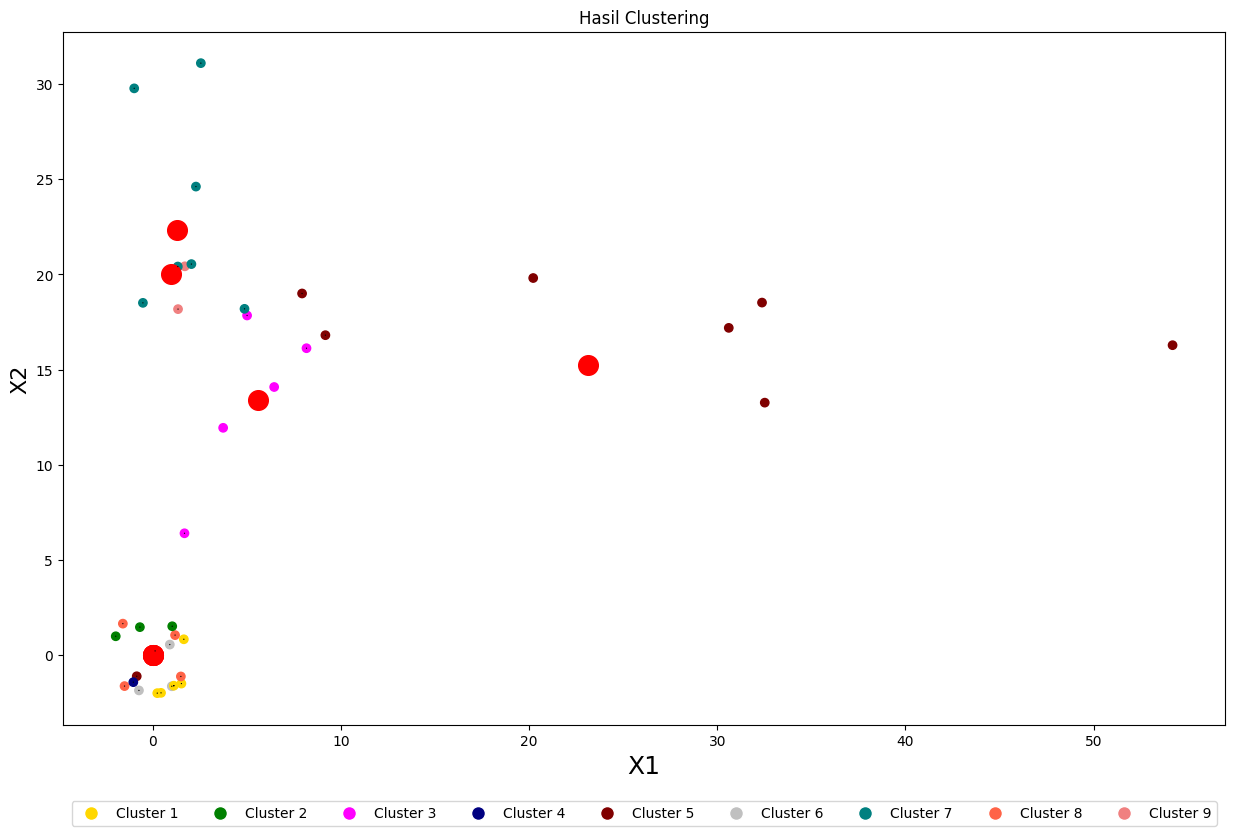

In [ ]:
# Pemetaan warna klaster
color_map = {0: '#FFD700', 1: '#008000', 2: '#FF00FF', 3: '#000080', 4: '#800000', 5:'#C0C0C0', 6: '#008080', 7: '#FF6347', 8: '#F08080'}

fig, ax = plt.subplots(figsize=(15,9))

# Jittering pada posisi titik data
jitter = 2
jittered_x = [x + random.uniform(-jitter, jitter) for x in data_cluster2.iloc[:, 0]]
jittered_y = [y + random.uniform(-jitter, jitter) for y in data_cluster2.iloc[:, 1]]
scatter = ax.scatter(jittered_x, jittered_y, c=[color_map[i] for i in predicted_pso2])

# Scatter plot dengan indeks dan keterangan klaster pada setiap titik data klaster
texts = []
for i, (x, y, alamat) in enumerate(zip(jittered_x, jittered_y, data_cluster2.index)):
    texts.append(ax.text(x, y, '', ha='center', va='bottom'))

# Menyesuaikan posisi tulisan agar tidak bertumpuk
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'))

# Menghitung dan menampilkan nilai centroid di tengah setiap klaster
centroids = pso_kmeans2.centroid
for i, centroid in enumerate(centroids):
    cluster_data = data_cluster2[predicted_pso2 == i]
    centroid_x = np.mean(cluster_data.iloc[:, 0])
    centroid_y = np.mean(cluster_data.iloc[:, 1])
    plt.scatter(centroid_x, centroid_y, marker='o', color='red', s=200)
    plt.annotate('', (centroid_x, centroid_y), textcoords="offset points", xytext=(0, 10), ha='center', color='black', weight='bold')

plt.xlabel('X1', fontsize=18)
plt.ylabel('X2', fontsize=16)
plt.title('Hasil Clustering')

# Menampilkan keterangan warna
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[i], markersize=10)
                 for i in range(len(color_map))]
legend_texts = [f'Cluster {i+1}' for i in range(len(color_map))]
plt.legend(legend_labels, legend_texts, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(color_map))

plt.show()


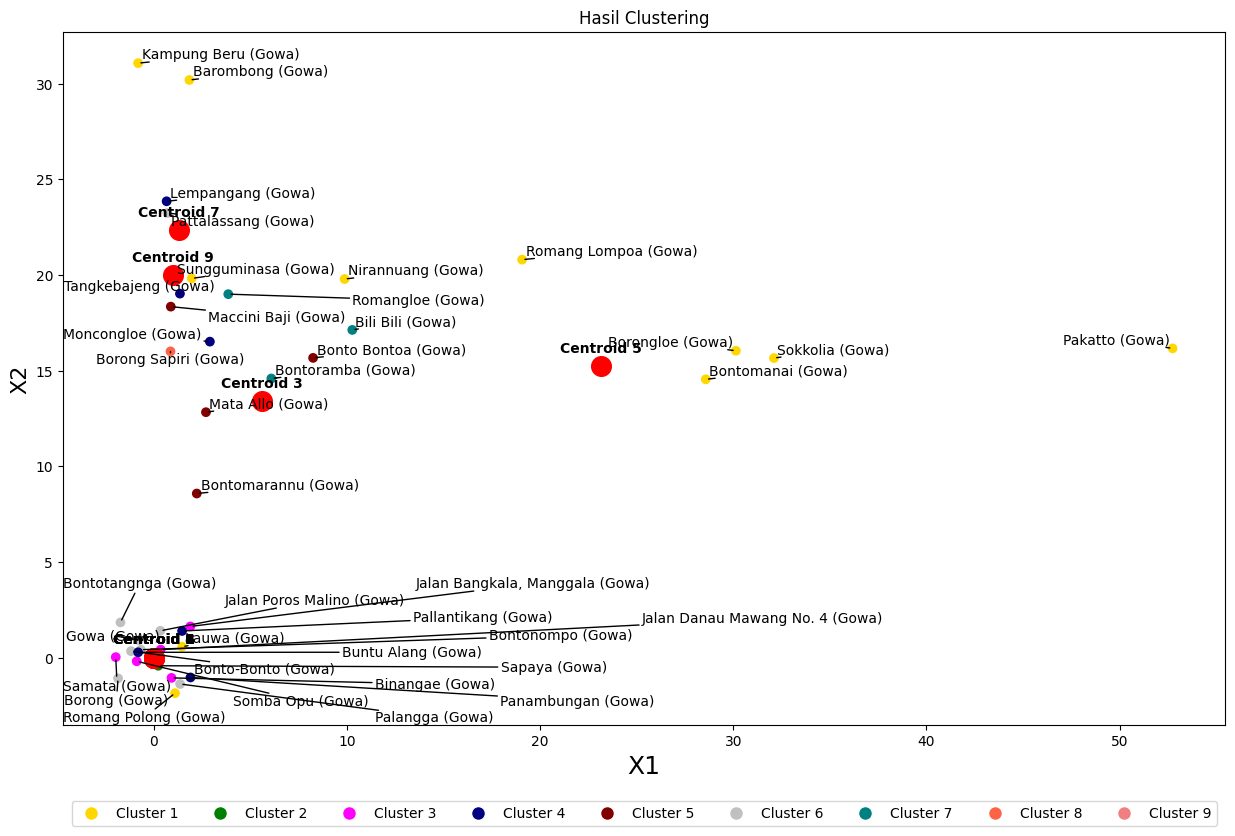

In [ ]:
# Pemetaan warna klaster
color_map = {0: '#FFD700', 1: '#008000', 2: '#FF00FF', 3: '#000080', 4: '#800000', 5:'#C0C0C0', 6: '#008080', 7: '#FF6347', 8: '#F08080'}

fig, ax = plt.subplots(figsize=(15, 9))

# Jittering pada posisi titik data
jitter = 2  # Besar jittering, sesuaikan sesuai kebutuhan
jittered_x = [x + random.uniform(-jitter, jitter) for x in data_cluster2.iloc[:, 0]]
jittered_y = [y + random.uniform(-jitter, jitter) for y in data_cluster2.iloc[:, 1]]
scatter = ax.scatter(jittered_x, jittered_y, c=[color_map[i] for i in predicted_pso1])
# Scatter plot dengan indeks dan keterangan klaster pada setiap titik data klaster
texts = []
for i, (x, y, alamat) in enumerate(zip(jittered_x, jittered_y, data_cluster2.index)):
    texts.append(ax.text(x, y, f'{alamat}', ha='center', va='bottom'))

# Menyesuaikan posisi tulisan agar tidak bertumpuk
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'))

# Menghitung dan menampilkan nilai centroid di tengah setiap klaster
centroids = pso_kmeans2.centroid
for i, centroid in enumerate(centroids):
    cluster_data = data_cluster2[predicted_pso2 == i]
    centroid_x = np.mean(cluster_data.iloc[:, 0])
    centroid_y = np.mean(cluster_data.iloc[:, 1])
    plt.scatter(centroid_x, centroid_y, marker='o', color='red', s=200)
    plt.annotate(f'Centroid {i+1}', (centroid_x, centroid_y), textcoords="offset points", xytext=(0, 10), ha='center', color='black', weight='bold')

plt.xlabel('X1', fontsize=18)
plt.ylabel('X2', fontsize=16)
plt.title('Hasil Clustering')

# Menampilkan keterangan warna
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[i], markersize=10)
                 for i in range(len(color_map))]
legend_texts = [f'Cluster {i+1}' for i in range(len(color_map))]
plt.legend(legend_labels, legend_texts, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(color_map))

plt.show()


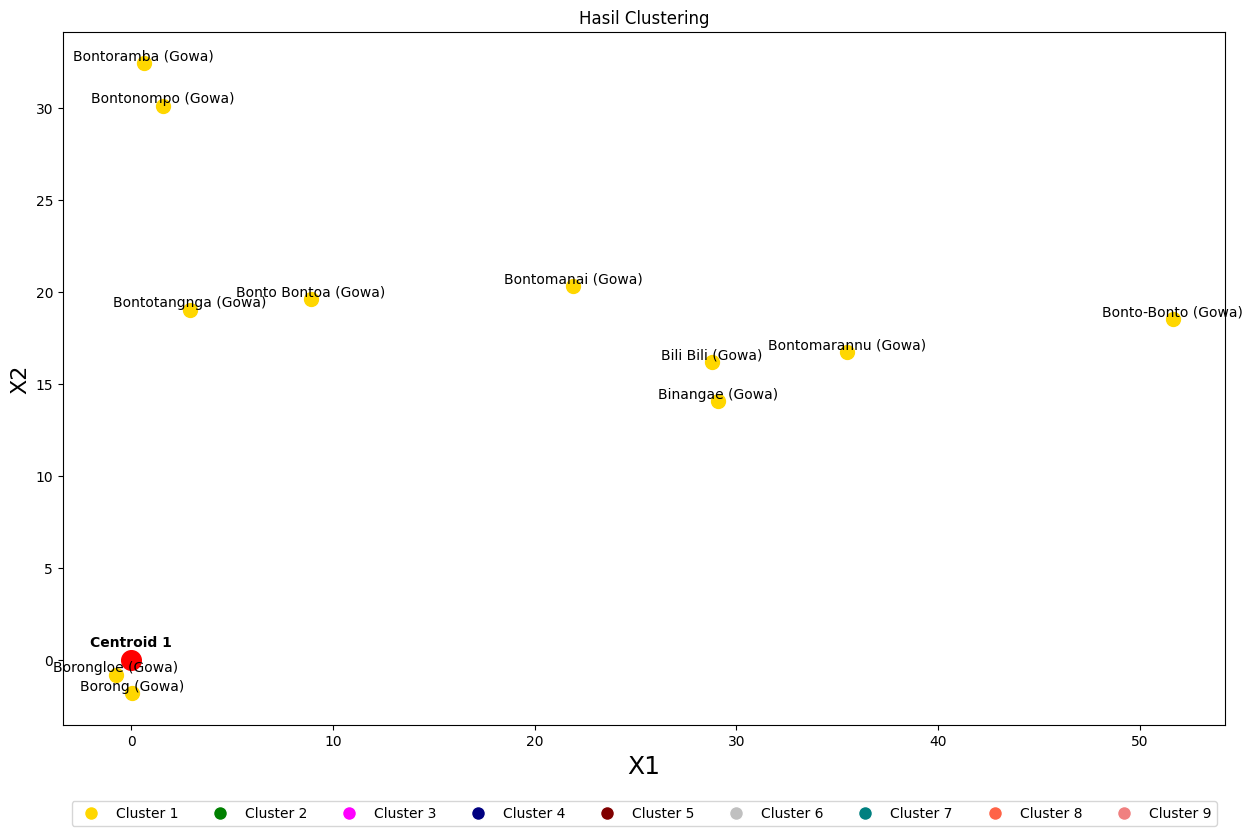

In [ ]:
# Pemetaan warna klaster
color_map = {0: '#FFD700', 1: '#008000', 2: '#FF00FF', 3: '#000080', 4: '#800000', 5:'#C0C0C0', 6: '#008080', 7: '#FF6347', 8: '#F08080'}

fig, ax = plt.subplots(figsize=(15, 9))

# Jittering pada posisi titik data
jitter = 2  # Besar jittering, sesuaikan sesuai kebutuhan
jittered_x = [x + random.uniform(-jitter, jitter) for x in data_cluster2.iloc[:, 0]]
jittered_y = [y + random.uniform(-jitter, jitter) for y in data_cluster2.iloc[:, 1]]

# Scatter plot hanya untuk klaster 1
cluster1_x = []
cluster1_y = []
for i, cluster_label in enumerate(predicted_pso1):
    if cluster_label == 0:  # Filter hanya klaster 0
        cluster1_x.append(jittered_x[i])
        cluster1_y.append(jittered_y[i])
plt.scatter(cluster1_x, cluster1_y, c=color_map[0], s=100)

# Menampilkan keterangan indeks alamat pada setiap titik data klaster 1
texts = []
for x, y, alamat in zip(cluster1_x, cluster1_y, data_cluster2.index):
    texts.append(ax.text(x, y, alamat, ha='center', va='bottom'))

# Menghitung dan menampilkan nilai centroid di tengah klaster 1
centroids = pso_kmeans2.centroid
for i, centroid in enumerate(centroids):
    if i == 0:  # Filter hanya klaster 1
        cluster_data = data_cluster2[predicted_pso2 == i]
        centroid_x = np.mean(cluster_data.iloc[:, 0])
        centroid_y = np.mean(cluster_data.iloc[:, 1])
        plt.scatter(centroid_x, centroid_y, marker='o', color='red', s=200)
        plt.annotate(f'Centroid 1', (centroid_x, centroid_y), textcoords="offset points", xytext=(0, 10), ha='center', color='black', weight='bold')

plt.xlabel('X1', fontsize=18)
plt.ylabel('X2', fontsize=16)
plt.title('Hasil Clustering')

# Menampilkan keterangan warna
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[i], markersize=10)
                 for i in range(len(color_map))]
legend_texts = [f'Cluster {i+1}' for i in range(len(color_map))]
plt.legend(legend_labels, legend_texts, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(color_map))


###**Evaluasi Optimasi**

In [ ]:
#evaluasi sse dan silhoute kmeans dengan 20 iterasi
kmeanspp = {
    'silhouette': [],
    'sse' : [],
    'dbi': [],
}
for _ in range(10):
    kmean_rep = KMeans(n_cluster=9, init_pp=True, seed=2014)
    kmean_rep.fit(cluster2)
    predicted_kmean_rep = kmean_rep.predict(cluster2)
    silhouette = silhouette_score(cluster2, 
                                  predicted_kmean_rep)
    sse = kmean_rep.SSE
    dbi = davies_bouldin_score(cluster2, predicted_kmean_rep)
    kmeanspp['silhouette'].append(silhouette)
    kmeanspp['sse'].append(sse)
    kmeanspp['dbi'].append(dbi)

In [ ]:
#evaluasi sse dan silhoute pso-kmeans dengan 20 iterasi
pso_hybrid = {
    'silhouette': [],
    'sse' : [],
    'dbi': [],
}
for _ in range(20):
    pso_rep2 = ParticleSwarmOptimizedClustering(n_cluster=9, 
                                               n_particles=10, 
                                               data=cluster2, 
                                               hybrid=True, 
                                               max_iter=2000, 
                                               print_debug=50)
    pso_rep2.run()
    pso_kmeans2 = KMeans(n_cluster=9, 
                        init_pp=False, 
                        seed=144)
    pso_kmeans2.centroid = pso_rep2.gbest_centroids.copy()
    predicted_pso_rep2 = pso_kmeans2.predict(cluster2)
    
    silhouette = silhouette_score(cluster2, 
                                  predicted_pso_rep2)
    sse = calc_sse(centroids=pso_rep2.gbest_centroids, 
                   data=cluster2, 
                   labels=predicted_pso_rep2)
    dbi = davies_bouldin_score(cluster2, predicted_pso_rep2)

    pso_hybrid['silhouette'].append(silhouette)
    pso_hybrid['sse'].append(sse)
    pso_hybrid['dbi'].append(dbi)

Initial global best score 0.5549035244711515
Iteration 0001/2000 current gbest score 0.554903524471151544
Iteration 0151/2000 current gbest score 0.547328644002216924
Iteration 0301/2000 current gbest score 0.547262793392061742
Iteration 0451/2000 current gbest score 0.547262718244585722
Iteration 0601/2000 current gbest score 0.547262718060212316
Iteration 0751/2000 current gbest score 0.547262717976289892
Iteration 0901/2000 current gbest score 0.547262717975568913
Iteration 1051/2000 current gbest score 0.547262717975529167
Iteration 1201/2000 current gbest score 0.547262717975213087
Iteration 1351/2000 current gbest score 0.547262717974339230
Iteration 1501/2000 current gbest score 0.547262717971911949
Iteration 1651/2000 current gbest score 0.547262717957596068
Iteration 1801/2000 current gbest score 0.547262717955453892
Iteration 1951/2000 current gbest score 0.547262717955115274
Finish with gbest score 0.547262717955077527
Initial global best score 0.5584722492001056
Iteration 0

In [ ]:
evaluasi = {
    'method' : ['K-Means', 'PSO Kmeans'],
    'sse_mean' : [
        np.around(np.mean(kmeanspp['sse']), decimals=10),
        np.around(np.mean(pso_hybrid['sse']), decimals=10),
    ],
    'silhouette_mean' : [
        np.around(np.mean(kmeanspp['silhouette']), decimals=10),
        np.around(np.mean(pso_hybrid['silhouette']), decimals=10),
    ],
    'dbi_mean': [
        np.around(np.mean(kmeanspp['dbi']), decimals=10),
        np.around(np.mean(pso_hybrid['dbi']), decimals=10),
    ]
}

In [ ]:
eval = pd.DataFrame.from_dict(evaluasi)
eval

,method,sse_mean,silhouette_mean,dbi_mean
0,K-Means,5.723642,0.330547,0.860655
1,PSO Kmeans,2.890678,0.466710,0.621216


###**Pattern Evaluation**

In [ ]:
# Menghitung dan menampilkan nilai rentang usia di tengah setiap klaster
age_ranges = []
for i in range(9):
    cluster_data = data_cluster2[predicted_pso2 == i]
    min_age = cluster_data["Umur_DBD"].min()
    max_age = cluster_data["Umur_DBD"].max()

    # Penanganan nilai 0 atau NaN
    if np.isnan(max_age):
        age_range = f"{int(min_age)}+"
    else:
        if np.isnan(min_age):
            age_range = f"0-{int(max_age)}"
        else:
            age_range = f'{int(min_age)}-{int(max_age)}'

    age_ranges.append(age_range)

# Mengganti semua nilai pada setiap klaster menjadi rentang usia
for i in range(9):
    data_cluster2.loc[predicted_pso2 == i, 'Rentang_Usia_DBD'] = age_ranges[i]

data_cluster2 = data_cluster2.drop(['Umur_DBD'], axis=1)

In [ ]:
#create new column for cluster labels associated with each subject
data_cluster2['labels'] = predicted_pso2
data_cluster2['Segment'] = data_cluster2['labels'].map({0: 'First', 1: 'Second', 2: 'Third', 3: 'Fourth', 4: 'Fifth', 5: 'Sistxh', 6: 'Seventh', 7: 'Eighth', 8: 'Ninth'})

In [ ]:
data_cluster2

,dbd,Tersedia air bersih,Ada lalat/nyamuk di sekitar tumpukan sampah,Ada sampah dan jarang dibersihkan,Ada sampah tapi tidak banyak,Bersih tanpa ada sampah,Ada ventilasi tapi hanya sedikit,Ada ventilasi tapi jarang terbuka,Ada ventilasi tapi selalu tertutup,Ada ventilasi disemua ruangan,Rentang_Usia_DBD,labels,Segment
Bili Bili (Gowa),9.0,33.0,1.0,14.0,12.0,7.0,13.0,2.0,1.0,18.0,0-19,4,Fifth
Binangae (Gowa),0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0-0,7,Eighth
Bonto Bontoa (Gowa),10.0,15.0,2.0,4.0,7.0,2.0,5.0,3.0,1.0,6.0,8-19,2,Third
Bonto-Bonto (Gowa),0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0-0,5,Sistxh
Bontomanai (Gowa),29.0,119.0,5.0,43.0,48.0,23.0,39.0,15.0,2.0,63.0,0-19,4,Fifth
Bontomarannu (Gowa),1.0,8.0,0.0,4.0,2.0,2.0,2.0,1.0,0.0,5.0,8-19,2,Third
Bontonompo (Gowa),0.0,3.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,0-19,4,Fifth
Bontoramba (Gowa),8.0,20.0,1.0,8.0,4.0,7.0,4.0,2.0,0.0,14.0,8-19,2,Third
Bontotangnga (Gowa),0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0-0,5,Sistxh
Borong (Gowa),0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0-0,5,Sistxh


In [ ]:
data_cluster2[data_cluster2['labels']==0]

,dbd,Tersedia air bersih,Ada lalat/nyamuk di sekitar tumpukan sampah,Ada sampah dan jarang dibersihkan,Ada sampah tapi tidak banyak,Bersih tanpa ada sampah,Ada ventilasi tapi hanya sedikit,Ada ventilasi tapi jarang terbuka,Ada ventilasi tapi selalu tertutup,Ada ventilasi disemua ruangan,Rentang_Usia_DBD,labels,Segment
Gowa (Gowa),0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0-0,0,First
"Jalan Bangkala, Manggala (Gowa)",0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0-0,0,First
Samata (Gowa),0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0-0,0,First
Somba Opu (Gowa),0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0-0,0,First
Romang Polong (Gowa),0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0-0,0,First


In [ ]:
#Order the cluster
data_cluster2['Segment'] = data_cluster2['Segment'].astype('category')
data_cluster2['Segment'] = data_cluster2['Segment'].cat.reorder_categories(['First', 'Second', 'Third', 'Fourth', 'Fifth', 'Sistxh', 'Seventh', 'Eighth', 'Ninth'])

In [ ]:
# ==== CREATE DICTIONARY FOR OBJECT AND NUMERICAL COLUMNS ====#
dict_cat = {}
dict_num = {}
for cat in data_cluster2.select_dtypes('object'):
 dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in data_cluster2.select_dtypes(['int64', 'float64']):
  if (num == 'Total'):
    continue
  dict_num[num] = ['mean']
# ============ CREATE TABLE FOR EACH CLUSTER ============#
data_cluster2.rename(columns={'labels': 'Total'}, inplace=True)
data_percluster2 = data_cluster2.groupby('Segment').agg({
 'Total': 'count',
 **dict_num,
 **dict_cat
}).T

In [ ]:
data_cluster2['coord'] = coord2

In [ ]:
data_cluster2 = data_cluster2.T
data_percluster2.to_json(r'cluster2_result.json')
data_cluster2.to_json(r'cluster2_df.json')

#**CLUSTER3**

###**Elbow dan Silhouette**

In [ ]:
data = merge_data.copy()

In [ ]:
selected_columns = ['tifoid', 'Umur_Tifoid','Tersedia air bersih', 'Ada lalat/nyamuk di sekitar tumpukan sampah', 'Ada sampah dan jarang dibersihkan', 
                    'Ada sampah tapi tidak banyak', 'Bersih tanpa ada sampah', 'Ada ventilasi tapi hanya sedikit', 'Ada ventilasi tapi jarang terbuka', 
                    'Ada ventilasi tapi selalu tertutup', 'Ada ventilasi disemua ruangan']  # Ganti dengan nama variabel yang ingin Anda gunakan
data_selected = data[selected_columns]

In [ ]:
# Normalisasi L2
normalizer = Normalizer(norm='l2')
data_normalized = normalizer.transform(data_selected)

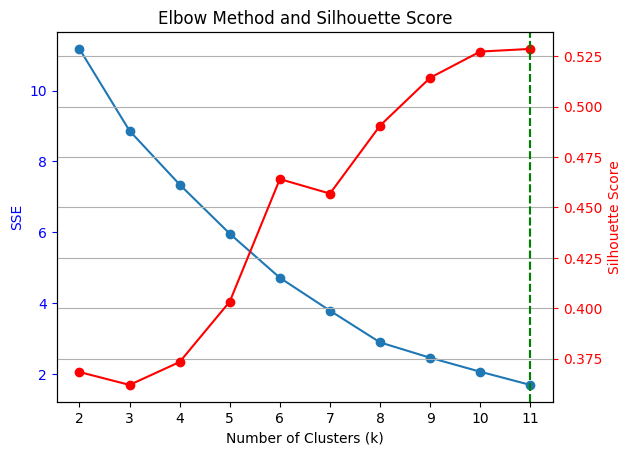

In [ ]:
# Data yang telah dinormalisasi
data_normalized = data_normalized.copy()

# Inisialisasi range nilai k
min_k = 2
max_k = 11

# List untuk menyimpan nilai SSE
sse_scores = []
# List untuk menyimpan nilai Silhouette Score
silhouette_scores = []

# Loop untuk mencari SSE dan Silhouette Score pada setiap nilai k
for k in range(min_k, max_k+1):
    kmeans = Kmeans1(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_normalized)
    sse = kmeans.inertia_
    sse_scores.append(sse)
    if len(np.unique(cluster_labels)) > 1:
        silhouette_avg = silhouette_score(data_normalized, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(0)

# Mencari nilai k optimal berdasarkan Silhouette Score
optimal_k = min_k + np.argmax(silhouette_scores)

# Plot grafik SSE dan Silhouette Score
fig, ax1 = plt.subplots()

ax1.plot(range(min_k, min_k + len(sse_scores)), sse_scores, marker='o')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('SSE', color='blue')
ax1.tick_params('y', colors='blue')

ax2 = ax1.twinx()
ax2.plot(range(min_k, min_k + len(silhouette_scores)), silhouette_scores, marker='o', color='red')
ax2.set_ylabel('Silhouette Score', color='red')
ax2.tick_params('y', colors='red')

# Tambahkan garis vertikal untuk nilai k optimal
ax1.axvline(x=optimal_k, color='green', linestyle='--')
ax2.axvline(x=optimal_k, color='green', linestyle='--')

plt.title('Elbow Method and Silhouette Score')
plt.xticks(range(min_k, min_k + len(sse_scores)))
plt.grid(True)
plt.show()

In [ ]:
sse = []
silhouette_scores = []

for n_clusters in range(2, 12):
    kmeans = Kmeans1(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data_normalized)
    sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(data_normalized, labels)
    silhouette_scores.append(silhouette_avg)

table_elbow = {
    'K': range(2, 12),
    'sse': sse,
    'silhouette': silhouette_scores
}
df = pd.DataFrame(table_elbow)
df

,K,sse,silhouette
0,2,11.174630,0.368342
1,3,8.865134,0.361937
2,4,7.348982,0.373317
3,5,5.962270,0.403278
4,6,4.718480,0.464097
5,7,3.790824,0.456902
6,8,2.895562,0.490616
7,9,2.462714,0.514392
8,10,2.068398,0.527392
9,11,1.695974,0.528698


### **K-Means**

In [ ]:
data_cluster3 = merge_data[['tifoid','Umur_Tifoid','Tersedia air bersih', 'Ada lalat/nyamuk di sekitar tumpukan sampah', 'Ada sampah dan jarang dibersihkan', 
                    'Ada sampah tapi tidak banyak', 'Bersih tanpa ada sampah', 'Ada ventilasi tapi hanya sedikit', 'Ada ventilasi tapi jarang terbuka', 
                    'Ada ventilasi tapi selalu tertutup', 'Ada ventilasi disemua ruangan' ]] 

# Standardize data
cluster3 = data_normalized.copy()

In [ ]:
kmeans3 = KMeans(n_cluster=11)
kmeans3.fit(cluster3)

In [ ]:
predicted_kmeans3 = kmeans3.predict(cluster3)
print('Silhouette:', silhouette_score(cluster3, predicted_kmeans3))
print('SSE:', kmeans3.SSE)

Silhouette: 0.34194240011333943
SSE: 3.2050153714650325


In [ ]:
frame1 = pd.DataFrame(cluster3)
frame1['cluster'] = predicted_kmeans3
frame1['cluster'].value_counts()

1     10
3      8
2      5
0      4
7      3
6      3
4      2
10     1
9      1
8      1
5      1
Name: cluster, dtype: int64

In [ ]:
predicted_kmeans3

array([ 0,  1,  7,  6,  1,  7,  3,  0,  6,  6,  1,  2,  2,  1,  4,  7,  0,
        1,  1,  4,  1,  1,  0,  2,  1,  2,  2, 10,  9,  8,  1,  3,  3,  3,
        3,  3,  3,  3,  5])

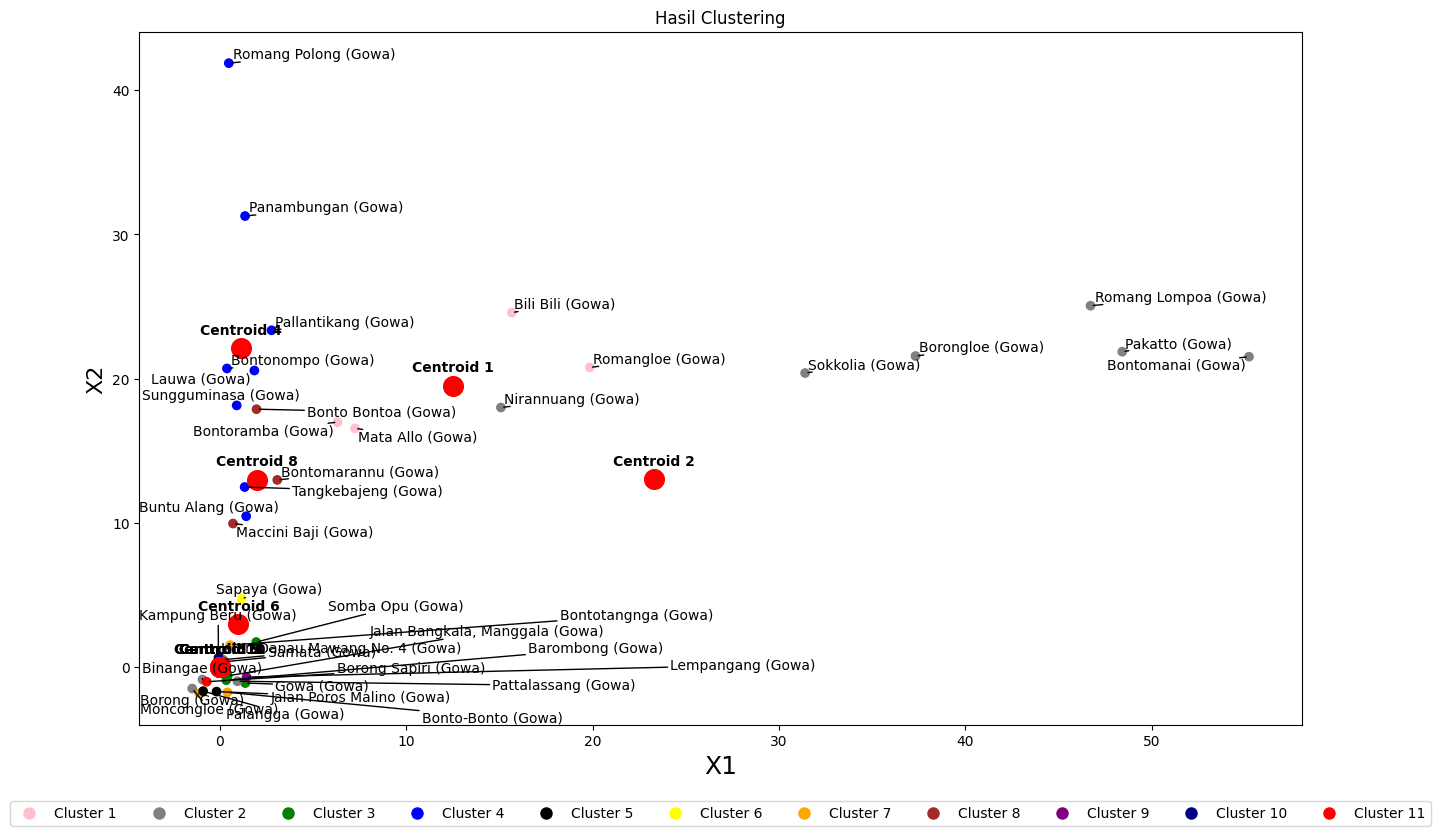

In [ ]:
# Pemetaan warna klaster
color_map = {0: 'pink', 1: 'grey', 2: 'green', 3: 'blue', 4: 'black', 5:'yellow', 6: 'orange', 7: 'brown', 8: 'purple', 9: 'navy', 10: 'red'}  # Atur warna untuk masing-masing klaster

fig, ax = plt.subplots(figsize=(15, 9))

# Jittering pada posisi titik data
jitter = 2  # Besar jittering, sesuaikan sesuai kebutuhan
jittered_x = [x + random.uniform(-jitter, jitter) for x in data_cluster3.iloc[:, 0]]
jittered_y = [y + random.uniform(-jitter, jitter) for y in data_cluster3.iloc[:, 1]]
scatter = ax.scatter(jittered_x, jittered_y, c=[color_map[i] for i in predicted_kmeans3])
# Scatter plot dengan indeks dan keterangan klaster pada setiap titik data klaster
texts = []
for i, (x, y, alamat) in enumerate(zip(jittered_x, jittered_y, data_cluster3.index)):
    texts.append(ax.text(x, y, f'{alamat}', ha='center', va='bottom'))

# Menyesuaikan posisi tulisan agar tidak bertumpuk
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'))

# Menghitung dan menampilkan nilai centroid di tengah setiap klaster
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    cluster_data = data_cluster3[predicted_kmeans3 == i]
    centroid_x = np.mean(cluster_data.iloc[:, 0])
    centroid_y = np.mean(cluster_data.iloc[:, 1])
    plt.scatter(centroid_x, centroid_y, marker='o', color='red', s=200)
    plt.annotate(f'Centroid {i+1}', (centroid_x, centroid_y), textcoords="offset points", xytext=(0, 10), ha='center', color='black', weight='bold')

plt.xlabel('X1', fontsize=18)
plt.ylabel('X2', fontsize=16)
plt.title('Hasil Clustering')

# Menampilkan keterangan warna
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[i], markersize=10)
                 for i in range(len(color_map))]
legend_texts = [f'Cluster {i+1}' for i in range(len(color_map))]
plt.legend(legend_labels, legend_texts, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(color_map))

plt.show()


### **PSO K-Means**

In [ ]:
pso3 = ParticleSwarmOptimizedClustering(n_cluster=11, 
                                       n_particles=10, 
                                       data=cluster3, 
                                       hybrid=True,
                                       max_iter=4000, 
                                       print_debug=100)

In [ ]:
hist3 = pso3.run()

Initial global best score 0.46488591668360985
Iteration 0001/4000 current gbest score 0.464885916683609846
Iteration 0101/4000 current gbest score 0.417074811073278484
Iteration 0201/4000 current gbest score 0.416353228669586406
Iteration 0301/4000 current gbest score 0.416352529831750084
Iteration 0401/4000 current gbest score 0.416352522898925437
Iteration 0501/4000 current gbest score 0.416352522796083646
Iteration 0601/4000 current gbest score 0.416352522621986243
Iteration 0701/4000 current gbest score 0.416352522614456766
Iteration 0801/4000 current gbest score 0.416352522614448661
Iteration 0901/4000 current gbest score 0.416352522614366005
Iteration 1001/4000 current gbest score 0.416352522612861653
Iteration 1101/4000 current gbest score 0.416352522610527465
Iteration 1201/4000 current gbest score 0.416352522610117737
Iteration 1301/4000 current gbest score 0.416352522609970577
Iteration 1401/4000 current gbest score 0.416352522609907905
Iteration 1501/4000 current gbest score

In [ ]:
pso_kmeans3 = KMeans(n_cluster=11)
pso_kmeans3.centroid = pso3.gbest_centroids.copy()

In [ ]:
predicted_pso3 = pso_kmeans3.predict(cluster3)

In [ ]:
print('Silhouette:', silhouette_score(cluster3, predicted_pso3))
print('SSE:', calc_sse(centroids=pso3.gbest_centroids, 
                       data=cluster3, 
                       labels=predicted_pso3))

Silhouette: 0.43991969660156227
SSE: 2.345923775865596


In [ ]:
frame1 = pd.DataFrame(cluster3)
frame1['cluster'] = predicted_pso3
frame1['cluster'].value_counts()

5     10
8      6
4      6
1      6
10     3
7      2
3      2
9      1
0      1
2      1
6      1
Name: cluster, dtype: int64

In [ ]:
predicted_pso3

array([ 8,  5,  8,  7,  5,  8, 10,  8,  5,  7,  5,  9,  4,  0,  4,  8,  8,
        2,  5,  4,  5,  3,  3,  4,  5,  4,  4,  6,  5,  5,  5,  1, 10,  1,
        1,  1,  1,  1, 10])

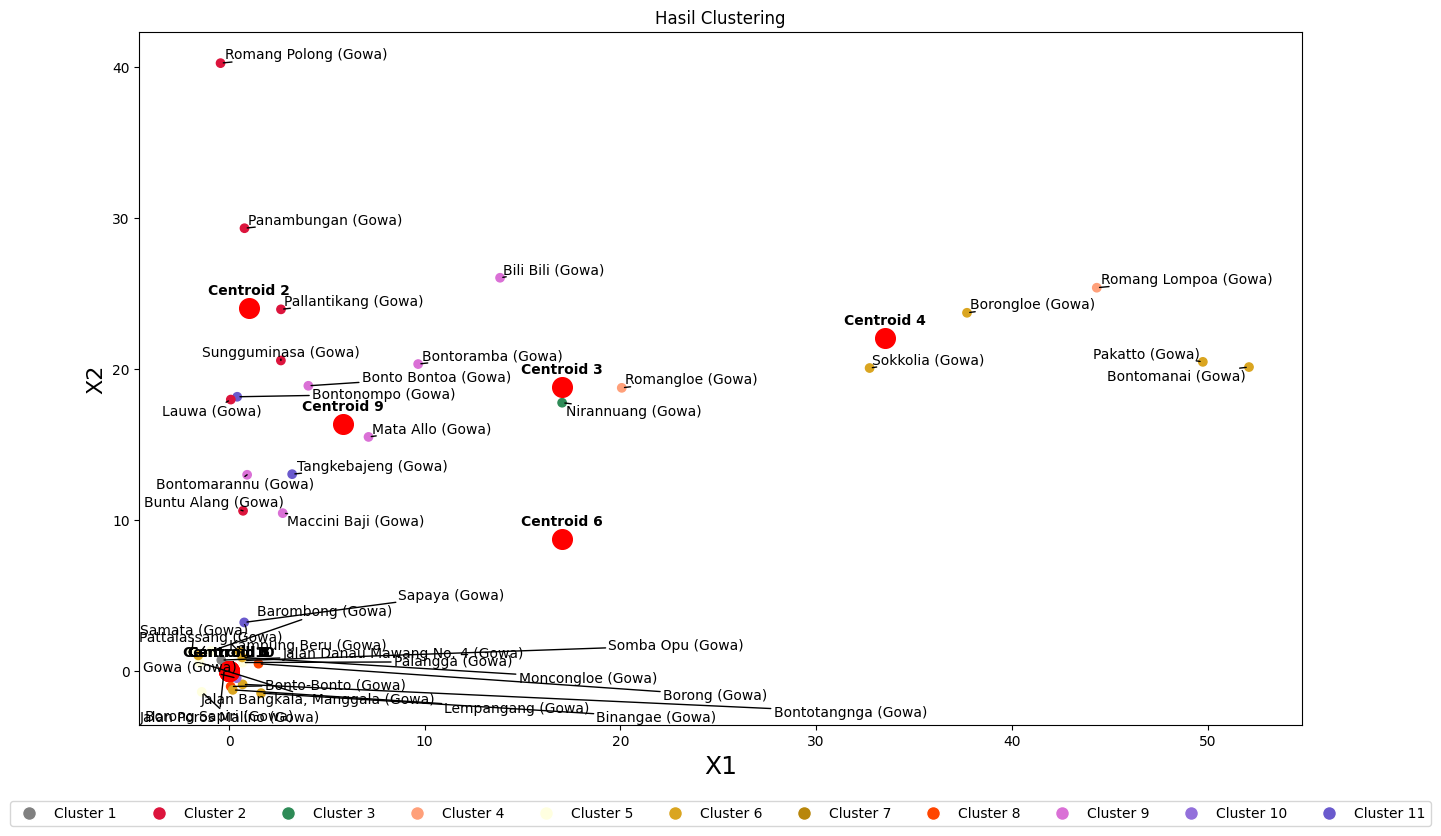

In [ ]:
# Pemetaan warna klaster
color_map = {0: '#808080', 1: '#DC143C', 2: '#2E8B57', 3: '#FFA07A', 4: '#FFFFE0', 5: '#DAA520', 6:'#B8860B', 7: '#FF4500', 8: '#DA70D6', 9: '#9370DB', 10: '#6A5ACD'}  # Atur warna untuk masing-masing klaster

fig, ax = plt.subplots(figsize=(15, 9))

# Jittering pada posisi titik data
jitter = 2  # Besar jittering, sesuaikan sesuai kebutuhan
jittered_x = [x + random.uniform(-jitter, jitter) for x in data_cluster3.iloc[:, 0]]
jittered_y = [y + random.uniform(-jitter, jitter) for y in data_cluster3.iloc[:, 1]]
scatter = ax.scatter(jittered_x, jittered_y, c=[color_map[i] for i in predicted_pso3])
# Scatter plot dengan indeks dan keterangan klaster pada setiap titik data klaster
texts = []
for i, (x, y, alamat) in enumerate(zip(jittered_x, jittered_y, data_cluster3.index)):
    texts.append(ax.text(x, y, f'{alamat}', ha='center', va='bottom'))

# Menyesuaikan posisi tulisan agar tidak bertumpuk
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'))

# Menghitung dan menampilkan nilai centroid di tengah setiap klaster
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    cluster_data = data_cluster3[predicted_pso3 == i]
    centroid_x = np.mean(cluster_data.iloc[:, 0])
    centroid_y = np.mean(cluster_data.iloc[:, 1])
    plt.scatter(centroid_x, centroid_y, marker='o', color='red', s=200)
    plt.annotate(f'Centroid {i+1}', (centroid_x, centroid_y), textcoords="offset points", xytext=(0, 10), ha='center', color='black', weight='bold')

plt.xlabel('X1', fontsize=18)
plt.ylabel('X2', fontsize=16)
plt.title('Hasil Clustering')

# Menampilkan keterangan warna
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[i], markersize=10)
                 for i in range(len(color_map))]
legend_texts = [f'Cluster {i+1}' for i in range(len(color_map))]
plt.legend(legend_labels, legend_texts, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(color_map))

plt.show()


###**Evaluasi Optimasi**

In [ ]:
#evaluasi sse dan silhoute kmeans dengan 20 iterasi
kmeanspp = {
    'silhouette': [],
    'sse' : [],
    'dbi': [],
}
for _ in range(20):
    kmean_rep = KMeans(n_cluster=11, init_pp=True, seed=2014)
    kmean_rep.fit(cluster3)
    predicted_kmean_rep = kmean_rep.predict(cluster3)
    silhouette = silhouette_score(cluster3, 
                                  predicted_kmean_rep)
    sse = kmean_rep.SSE
    dbi = davies_bouldin_score(cluster3, predicted_kmean_rep)
    kmeanspp['silhouette'].append(silhouette)
    kmeanspp['sse'].append(sse)
    kmeanspp['dbi'].append(dbi)

In [ ]:
#evaluasi sse dan silhoute pso-kmeans dengan 20 iterasi
pso_hybrid = {
    'silhouette': [],
    'sse' : [],
    'dbi': [],
}
for _ in range(20):
    pso_rep2 = ParticleSwarmOptimizedClustering(n_cluster=11, 
                                               n_particles=40, 
                                               data=cluster3, 
                                               hybrid=True, 
                                               max_iter=2000, 
                                               print_debug=2000)
    pso_rep2.run()
    pso_kmeans2 = KMeans(n_cluster=11, 
                        init_pp=False, 
                        seed=144)
    pso_kmeans2.centroid = pso_rep2.gbest_centroids.copy()
    predicted_pso_rep2 = pso_kmeans2.predict(cluster3)
    
    silhouette = silhouette_score(cluster3, 
                                  predicted_pso_rep2)
    sse = calc_sse(centroids=pso_rep2.gbest_centroids, 
                   data=cluster3, 
                   labels=predicted_pso_rep2)
    dbi = davies_bouldin_score(cluster3, predicted_pso_rep2)

    pso_hybrid['silhouette'].append(silhouette)
    pso_hybrid['sse'].append(sse)
    pso_hybrid['dbi'].append(dbi)

Initial global best score 0.3531388866526346
Iteration 0001/2000 current gbest score 0.353138886652634598
Finish with gbest score 0.337401412974411063
Initial global best score 0.3657447773737761
Iteration 0001/2000 current gbest score 0.365744777373776087
Finish with gbest score 0.365744777373775976
Initial global best score 0.4122048450699735
Iteration 0001/2000 current gbest score 0.412204845069973513
Finish with gbest score 0.412204845069973458
Initial global best score 0.42644443880696836
Iteration 0001/2000 current gbest score 0.426444438806968362
Finish with gbest score 0.368775975458830396
Initial global best score 0.3648578804384647
Iteration 0001/2000 current gbest score 0.364857880438464677
Finish with gbest score 0.364857880438464677
Initial global best score 0.43872912705081735
Iteration 0001/2000 current gbest score 0.438729127050817347
Finish with gbest score 0.424058251044794332
Initial global best score 0.45102201830789157
Iteration 0001/2000 current gbest score 0.4510

In [ ]:
evaluasi = {
    'method' : ['K-Means', 'PSO Kmeans'],
    'sse_mean' : [
        np.around(np.mean(kmeanspp['sse']), decimals=10),
        np.around(np.mean(pso_hybrid['sse']), decimals=10),
    ],
    'silhouette_mean' : [
        np.around(np.mean(kmeanspp['silhouette']), decimals=10),
        np.around(np.mean(pso_hybrid['silhouette']), decimals=10),
    ],
    'dbi_mean': [
        np.around(np.mean(kmeanspp['dbi']), decimals=10),
        np.around(np.mean(pso_hybrid['dbi']), decimals=10),
    ]
}

In [ ]:
eval = pd.DataFrame.from_dict(evaluasi)
eval

,method,sse_mean,silhouette_mean,dbi_mean
0,K-Means,4.913618,0.295073,0.860067
1,PSO Kmeans,2.105402,0.468018,0.616458


### **Pattern Evaluation**

In [ ]:
# Menghitung dan menampilkan nilai rentang usia di tengah setiap klaster
age_ranges = []
for i in range(11):
    cluster_data = data_cluster3[predicted_pso3 == i]
    min_age = cluster_data["Umur_Tifoid"].min()
    max_age = cluster_data["Umur_Tifoid"].max()

    # Penanganan nilai 0 atau NaN
    if np.isnan(max_age):
        age_range = f"{int(min_age)}+"
    else:
        if np.isnan(min_age):
            age_range = f"0-{int(max_age)}"
        else:
            age_range = f'{int(min_age)}-{int(max_age)}'

    age_ranges.append(age_range)

# Mengganti semua nilai pada setiap klaster menjadi rentang usia
for i in range(11):
    data_cluster3.loc[predicted_pso3 == i, 'Rentang_Usia_Tifoid'] = age_ranges[i]

data_cluster3 = data_cluster3.drop(['Umur_Tifoid'], axis=1)

In [ ]:
#create new column for cluster labels associated with each subject
data_cluster3['labels'] = predicted_pso3
data_cluster3['Segment'] = data_cluster3['labels'].map({0: 'First', 1: 'Second', 2: 'Third', 3: 'Fourth', 4: 'Fifth', 5: 'Sixth', 6: 'Seventh', 7: 'Eighth', 8: 'Ninth', 9: 'Tenth', 10: 'Eleventh'})

In [ ]:
data_cluster3

,tifoid,Tersedia air bersih,Ada lalat/nyamuk di sekitar tumpukan sampah,Ada sampah dan jarang dibersihkan,Ada sampah tapi tidak banyak,Bersih tanpa ada sampah,Ada ventilasi tapi hanya sedikit,Ada ventilasi tapi jarang terbuka,Ada ventilasi tapi selalu tertutup,Ada ventilasi disemua ruangan,Rentang_Usia_Tifoid,labels,Segment
Bili Bili (Gowa),14.0,33.0,1.0,14.0,12.0,7.0,13.0,2.0,1.0,18.0,9-24,8,Ninth
Binangae (Gowa),0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0-23,5,Sixth
Bonto Bontoa (Gowa),3.0,15.0,2.0,4.0,7.0,2.0,5.0,3.0,1.0,6.0,9-24,8,Ninth
Bonto-Bonto (Gowa),0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0-0,7,Eighth
Bontomanai (Gowa),54.0,119.0,5.0,43.0,48.0,23.0,39.0,15.0,2.0,63.0,0-23,5,Sixth
Bontomarannu (Gowa),2.0,8.0,0.0,4.0,2.0,2.0,2.0,1.0,0.0,5.0,9-24,8,Ninth
Bontonompo (Gowa),1.0,3.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,3-20,10,Eleventh
Bontoramba (Gowa),8.0,20.0,1.0,8.0,4.0,7.0,4.0,2.0,0.0,14.0,9-24,8,Ninth
Bontotangnga (Gowa),0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0-23,5,Sixth
Borong (Gowa),0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0-0,7,Eighth


In [ ]:
data_cluster3[data_cluster3['labels'] == 0]

,tifoid,Tersedia air bersih,Ada lalat/nyamuk di sekitar tumpukan sampah,Ada sampah dan jarang dibersihkan,Ada sampah tapi tidak banyak,Bersih tanpa ada sampah,Ada ventilasi tapi hanya sedikit,Ada ventilasi tapi jarang terbuka,Ada ventilasi tapi selalu tertutup,Ada ventilasi disemua ruangan,Rentang_Usia_Tifoid,labels,Segment
Jalan Danau Mawang No. 4 (Gowa),0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0-0,0,First


In [ ]:
#Order the cluster
data_cluster3['Segment'] = data_cluster3['Segment'].astype('category')
data_cluster3['Segment'] = data_cluster3['Segment'].cat.reorder_categories(['First', 'Second', 'Third', 'Fourth', 'Fifth', 'Sixth', 'Seventh', 'Eighth', 'Ninth', 'Tenth', 'Eleventh'])

In [ ]:
# ==== CREATE DICTIONARY FOR OBJECT AND NUMERICAL COLUMNS ====#
dict_cat = {}
dict_num = {}
for cat in data_cluster3.select_dtypes('object'):
 dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in data_cluster3.select_dtypes(['int64', 'float64']):
  if (num == 'Total'):
    continue
  dict_num[num] = ['mean']
# ============ CREATE TABLE FOR EACH CLUSTER ============#
data_cluster3.rename(columns={'labels': 'Total'}, inplace=True)
data_percluster3 = data_cluster3.groupby('Segment').agg({
 'Total': 'count',
 **dict_num,
 **dict_cat
}).T

In [ ]:
data_cluster3['coord'] = coord3

In [ ]:
data_cluster3 = data_cluster3.T
data_percluster3.to_json(r'cluster3_result.json')
data_cluster3.to_json(r'cluster3_df.json')

#**CLUSTER4**

###**Elbow dan Silhouette**

In [45]:
data = merge_data.copy()

In [46]:
selected_columns = ['tbc', 'Umur_TB','Nafsu Makan Kurang',
                    'Sering Jajan Diluar',
                    'Sering Pakai Jamban/Toilet']
data_selected = data[selected_columns]

In [47]:
# Normalisasi L2
normalizer = Normalizer(norm='l2')
data_normalized = normalizer.transform(data_selected)

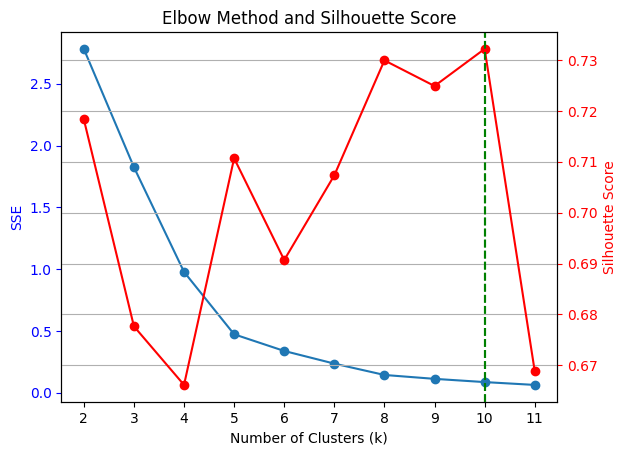

In [48]:
# Data yang telah dinormalisasi
data_normalized = data_normalized.copy()

# Inisialisasi range nilai k
min_k = 2
max_k = 11

# List untuk menyimpan nilai SSE
sse_scores = []
# List untuk menyimpan nilai Silhouette Score
silhouette_scores = []

# Loop untuk mencari SSE dan Silhouette Score pada setiap nilai k
for k in range(min_k, max_k+1):
    kmeans = Kmeans1(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_normalized)
    sse = kmeans.inertia_
    sse_scores.append(sse)
    if len(np.unique(cluster_labels)) > 1:
        silhouette_avg = silhouette_score(data_normalized, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(0)

# Mencari nilai k optimal berdasarkan Silhouette Score
optimal_k = min_k + np.argmax(silhouette_scores)

# Plot grafik SSE dan Silhouette Score
fig, ax1 = plt.subplots()

ax1.plot(range(min_k, min_k + len(sse_scores)), sse_scores, marker='o')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('SSE', color='blue')
ax1.tick_params('y', colors='blue')

ax2 = ax1.twinx()
ax2.plot(range(min_k, min_k + len(silhouette_scores)), silhouette_scores, marker='o', color='red')
ax2.set_ylabel('Silhouette Score', color='red')
ax2.tick_params('y', colors='red')

# Tambahkan garis vertikal untuk nilai k optimal
ax1.axvline(x=optimal_k, color='green', linestyle='--')
ax2.axvline(x=optimal_k, color='green', linestyle='--')

plt.title('Elbow Method and Silhouette Score')
plt.xticks(range(min_k, min_k + len(sse_scores)))
plt.grid(True)
plt.show()

In [50]:
sse = []
silhouette_scores = []

for n_clusters in range(2, 12):
    kmeans = Kmeans1(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data_normalized)
    sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(data_normalized, labels)
    silhouette_scores.append(silhouette_avg)

table_elbow = {
    'K': range(2, 12),
    'sse': sse,
    'silhouette': silhouette_scores
}
df = pd.DataFrame(table_elbow)
df

,K,sse,silhouette
0,2,2.782034,0.718329
1,3,1.824916,0.677662
2,4,0.977168,0.666150
3,5,0.472177,0.710678
4,6,0.337281,0.690689
5,7,0.234744,0.707331
6,8,0.142972,0.729911
7,9,0.111537,0.724876
8,10,0.085363,0.732161
9,11,0.062388,0.668853


### **K-Means**

In [ ]:
data_cluster4 = merge_data[['tbc', 'Umur_TB','Nafsu Makan Kurang',
                    'Sering Jajan Diluar',
                    'Sering Pakai Jamban/Toilet']]

# Standardize data
cluster4 = data_normalized.copy()

In [ ]:
kmeans4 = KMeans(n_cluster=10)
kmeans4.fit(cluster4)

In [ ]:
predicted_kmeans4 = kmeans4.predict(cluster4)
print('Silhouette:', silhouette_score(cluster4, predicted_kmeans4))
print('SSE:', kmeans4.SSE)

Silhouette: 0.7171578823691377
SSE: 0.3434657411672276


In [ ]:
frame4 = pd.DataFrame(cluster4)
frame4['cluster'] = predicted_kmeans4
frame4['cluster'].value_counts()

1    12
9     7
4     4
0     4
2     3
3     2
8     2
6     2
5     2
7     1
Name: cluster, dtype: int64

In [ ]:
predicted_kmeans4

array([3, 1, 8, 1, 2, 7, 1, 3, 1, 1, 2, 1, 1, 1, 1, 6, 8, 4, 2, 1, 6, 4,
       4, 1, 4, 1, 9, 9, 0, 9, 5, 5, 9, 9, 9, 0, 9, 0, 0])

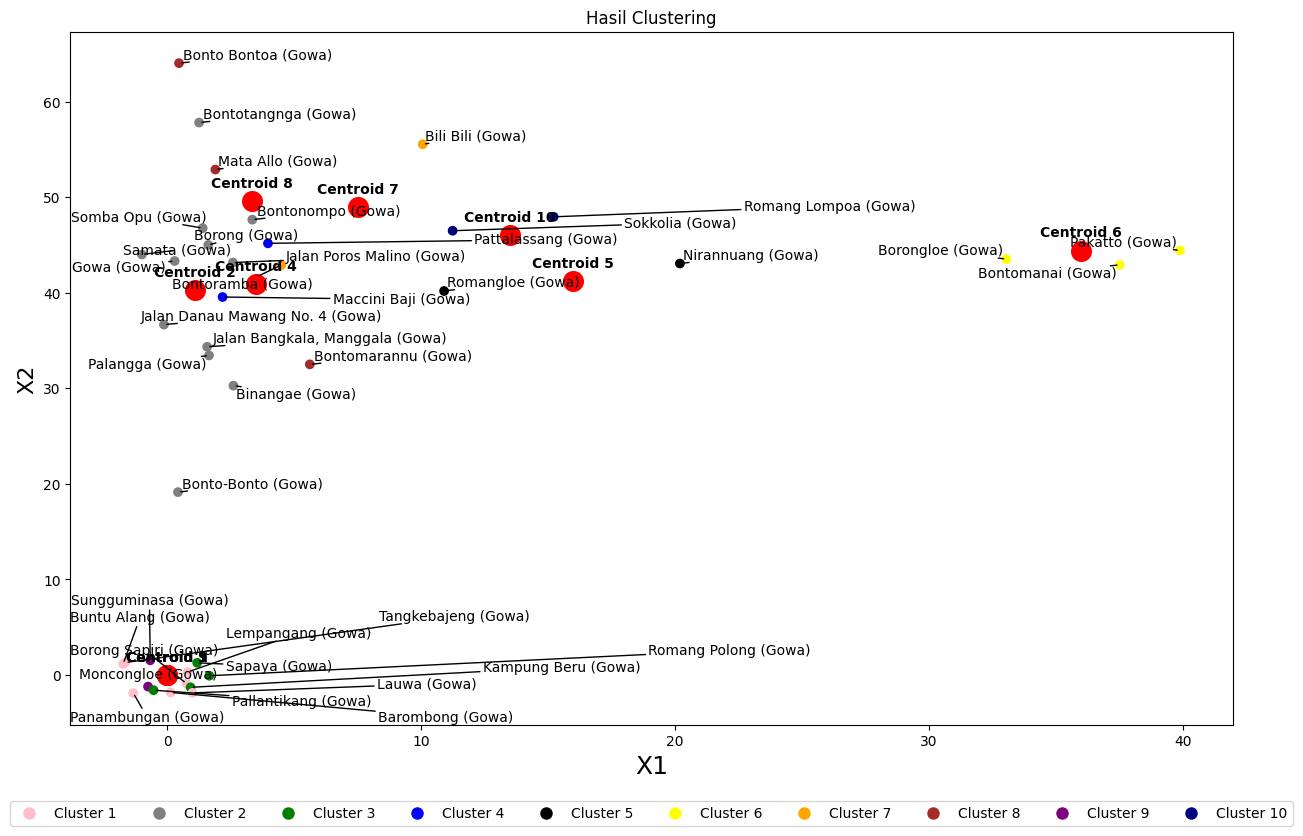

In [ ]:
# Pemetaan warna klaster
color_map = {0: 'pink', 1: 'grey', 2: 'green', 3: 'blue', 4: 'black', 5:'yellow', 6: 'orange', 7: 'brown', 8: 'purple', 9: 'navy'}

fig, ax = plt.subplots(figsize=(15, 9))

# Jittering pada posisi titik data
jitter = 2  # Besar jittering, sesuaikan sesuai kebutuhan
jittered_x = [x + random.uniform(-jitter, jitter) for x in data_cluster4.iloc[:, 0]]
jittered_y = [y + random.uniform(-jitter, jitter) for y in data_cluster4.iloc[:, 1]]
scatter = ax.scatter(jittered_x, jittered_y, c=[color_map[i] for i in predicted_kmeans4])
# Scatter plot dengan indeks dan keterangan klaster pada setiap titik data klaster
texts = []
for i, (x, y, alamat) in enumerate(zip(jittered_x, jittered_y, data_cluster4.index)):
    texts.append(ax.text(x, y, f'{alamat}', ha='center', va='bottom'))

# Menyesuaikan posisi tulisan agar tidak bertumpuk
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'))

# Menghitung dan menampilkan nilai centroid di tengah setiap klaster
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    cluster_data = data_cluster4[predicted_kmeans4 == i]
    centroid_x = np.mean(cluster_data.iloc[:, 0])
    centroid_y = np.mean(cluster_data.iloc[:, 1])
    plt.scatter(centroid_x, centroid_y, marker='o', color='red', s=200)
    plt.annotate(f'Centroid {i+1}', (centroid_x, centroid_y), textcoords="offset points", xytext=(0, 10), ha='center', color='black', weight='bold')

plt.xlabel('X1', fontsize=18)
plt.ylabel('X2', fontsize=16)
plt.title('Hasil Clustering')

# Menampilkan keterangan warna
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[i], markersize=10)
                 for i in range(len(color_map))]
legend_texts = [f'Cluster {i+1}' for i in range(len(color_map))]
plt.legend(legend_labels, legend_texts, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(color_map))

plt.show()


### **PSO K-Means**

In [ ]:
pso4 = ParticleSwarmOptimizedClustering(n_cluster=10, 
                                       n_particles=10, 
                                       data=cluster4, 
                                       hybrid=True,
                                       max_iter=4000, 
                                       print_debug=50)

In [ ]:
hist4 = pso4.run()

Initial global best score 0.16072380232799605
Iteration 0001/4000 current gbest score 0.160723802327996046
Iteration 0051/4000 current gbest score 0.160723802327996046
Iteration 0101/4000 current gbest score 0.160723802327996046
Iteration 0151/4000 current gbest score 0.159152345953295249
Iteration 0201/4000 current gbest score 0.158655964519770459
Iteration 0251/4000 current gbest score 0.158607603397739994
Iteration 0301/4000 current gbest score 0.158607542202138074
Iteration 0351/4000 current gbest score 0.158607530495907062
Iteration 0401/4000 current gbest score 0.158607528722593538
Iteration 0451/4000 current gbest score 0.158607528196207187
Iteration 0501/4000 current gbest score 0.158607526845920971
Iteration 0551/4000 current gbest score 0.158607526828969558
Iteration 0601/4000 current gbest score 0.158607526827935968
Iteration 0651/4000 current gbest score 0.158607526825469108
Iteration 0701/4000 current gbest score 0.158607526825435996
Iteration 0751/4000 current gbest score

In [ ]:
pso_kmeans4 = KMeans(n_cluster=10)
pso_kmeans4.centroid = pso4.gbest_centroids.copy()

In [ ]:
predicted_pso4 = pso_kmeans4.predict(cluster4)

In [ ]:
predicted_pso4 = pso_kmeans4.predict(cluster4)
print('Silhouette:', silhouette_score(cluster4, predicted_pso4))
print('SSE:', calc_sse(centroids=pso4.gbest_centroids, 
                       data=cluster4, 
                       labels=predicted_pso4))

Silhouette: 0.6324734653458284
SSE: 0.1729952718218111


In [ ]:
frame4 = pd.DataFrame(cluster4)
frame4['cluster'] = predicted_pso4
frame4['cluster'].value_counts()

7    6
1    6
3    6
9    6
6    5
4    4
5    3
0    1
2    1
8    1
Name: cluster, dtype: int64

In [ ]:
predicted_pso4

array([7, 6, 7, 6, 1, 7, 6, 7, 0, 3, 1, 3, 3, 2, 8, 6, 7, 1, 1, 3, 6, 1,
       7, 3, 1, 3, 9, 9, 4, 9, 5, 5, 5, 9, 9, 4, 9, 4, 4])

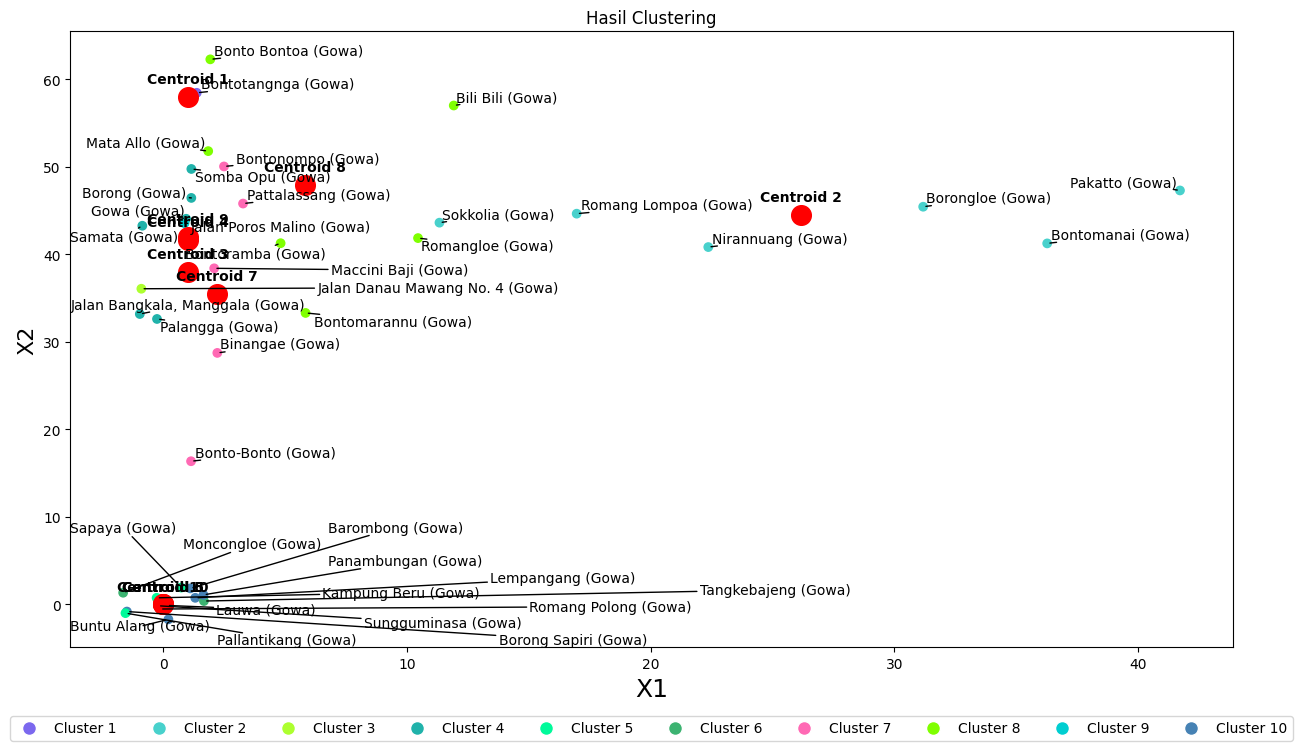

In [ ]:
# Pemetaan warna klaster
color_map = {0: '#7B68EE', 1: '#48D1CC', 2: '#ADFF2F', 3: '#20B2AA', 4: '#00FA9A', 5:'#3CB371', 6: '#FF69B4', 7: '#7FFF00', 8: '#00CED1', 9: '#4682B4'}  # Atur warna untuk masing-masing klaster

fig, ax = plt.subplots(figsize=(15, 8))

# Jittering pada posisi titik data
jitter = 2  # Besar jittering, sesuaikan sesuai kebutuhan
jittered_x = [x + random.uniform(-jitter, jitter) for x in data_cluster4.iloc[:, 0]]
jittered_y = [y + random.uniform(-jitter, jitter) for y in data_cluster4.iloc[:, 1]]
scatter = ax.scatter(jittered_x, jittered_y, c=[color_map[i] for i in predicted_pso4])

# Scatter plot dengan indeks dan keterangan klaster pada setiap titik data klaster
texts = []
for i, (x, y, alamat) in enumerate(zip(jittered_x, jittered_y, data_cluster4.index)):
    texts.append(ax.text(x, y, f'{alamat}', ha='center', va='bottom'))

# Menyesuaikan posisi tulisan agar tidak bertumpuk
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'))

# Menghitung dan menampilkan nilai centroid di tengah setiap klaster
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    cluster_data = data_cluster4[predicted_pso4 == i]
    centroid_x = np.mean(cluster_data.iloc[:, 0])
    centroid_y = np.mean(cluster_data.iloc[:, 1])
    plt.scatter(centroid_x, centroid_y, marker='o', color='red', s=200)
    plt.annotate(f'Centroid {i+1}', (centroid_x, centroid_y), textcoords="offset points", xytext=(0, 10), ha='center', color='black', weight='bold')

plt.xlabel('X1', fontsize=18)
plt.ylabel('X2', fontsize=16)
plt.title('Hasil Clustering')

# Menampilkan keterangan warna
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[i], markersize=10)
                 for i in range(len(color_map))]
legend_texts = [f'Cluster {i+1}' for i in range(len(color_map))]
plt.legend(legend_labels, legend_texts, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(color_map))

plt.show()


###**Evaluasi Optimasi**

In [ ]:
#evaluasi sse dan silhoute kmeans dengan 20 iterasi
kmeanspp = {
    'silhouette': [],
    'sse' : [],
    'dbi': [],
}
for _ in range(20):
    kmean_rep = KMeans(n_cluster=7, init_pp=True, seed=2014)
    kmean_rep.fit(cluster4)
    predicted_kmean_rep = kmean_rep.predict(cluster4)
    silhouette = silhouette_score(cluster4, 
                                  predicted_kmean_rep)
    sse = kmean_rep.SSE
    dbi = davies_bouldin_score(cluster4, predicted_kmean_rep)
    kmeanspp['silhouette'].append(silhouette)
    kmeanspp['sse'].append(sse)
    kmeanspp['dbi'].append(dbi)

In [ ]:
#evaluasi sse dan silhoute pso-kmeans dengan 20 iterasi
pso_hybrid = {
    'silhouette': [],
    'sse' : [],
    'dbi': [],
}
for _ in range(20):
    pso_rep2 = ParticleSwarmOptimizedClustering(n_cluster=10, 
                                               n_particles=20, 
                                               data=cluster4, 
                                               hybrid=True, 
                                               max_iter=2000, 
                                               print_debug=2000)
    pso_rep2.run()
    pso_kmeans2 = KMeans(n_cluster=10, 
                        init_pp=False, 
                        seed=144)
    pso_kmeans2.centroid = pso_rep2.gbest_centroids.copy()
    predicted_pso_rep2 = pso_kmeans2.predict(cluster4)
    
    silhouette = silhouette_score(cluster4, 
                                  predicted_pso_rep2)
    sse = calc_sse(centroids=pso_rep2.gbest_centroids, 
                   data=cluster4, 
                   labels=predicted_pso_rep2)
    dbi = davies_bouldin_score(cluster4, predicted_pso_rep2)

    pso_hybrid['silhouette'].append(silhouette)
    pso_hybrid['sse'].append(sse)
    pso_hybrid['dbi'].append(dbi)

Initial global best score 0.13989122292169548
Iteration 0001/2000 current gbest score 0.139891222921695479
Finish with gbest score 0.128809155744772474
Initial global best score 0.10659768813562129
Iteration 0001/2000 current gbest score 0.106597688135621288
Finish with gbest score 0.106194464265571289
Initial global best score 0.1299984905230424
Iteration 0001/2000 current gbest score 0.129998490523042409
Finish with gbest score 0.127827741616854118
Initial global best score 0.10445448656264951
Iteration 0001/2000 current gbest score 0.104454486562649509
Finish with gbest score 0.104454486562649482
Initial global best score 0.13871711023210315
Iteration 0001/2000 current gbest score 0.138717110232103147
Finish with gbest score 0.138717110231972307
Initial global best score 0.14961735610629806
Iteration 0001/2000 current gbest score 0.149617356106298061
Finish with gbest score 0.143589117027526636
Initial global best score 0.14062325510231516
Iteration 0001/2000 current gbest score 0.1

In [ ]:
evaluasi = {
    'method' : ['K-Means', 'PSO Kmeans'],
    'sse_mean' : [
        np.around(np.mean(kmeanspp['sse']), decimals=10),
        np.around(np.mean(pso_hybrid['sse']), decimals=10),
    ],
    'silhouette_mean' : [
        np.around(np.mean(kmeanspp['silhouette']), decimals=10),
        np.around(np.mean(pso_hybrid['silhouette']), decimals=10),
    ],
    'dbi_mean': [
        np.around(np.mean(kmeanspp['dbi']), decimals=10),
        np.around(np.mean(pso_hybrid['dbi']), decimals=10),
    ]
}

In [ ]:
eval = pd.DataFrame.from_dict(evaluasi)
eval

,method,sse_mean,silhouette_mean,dbi_mean
0,K-Means,0.359340,0.567229,0.504533
1,PSO Kmeans,0.093824,0.672432,0.422810


###**Pattern Evaluation**

In [ ]:
# Menghitung dan menampilkan nilai rentang usia di tengah setiap klaster
age_ranges = []
for i in range(10):
    cluster_data = data_cluster4[predicted_pso4 == i]
    min_age = cluster_data["Umur_TB"].min()
    max_age = cluster_data["Umur_TB"].max()

    # Penanganan nilai 0 atau NaN
    if np.isnan(max_age):
        age_range = f"{int(min_age)}+"
    else:
        if np.isnan(min_age):
            age_range = f"0-{int(max_age)}"
        else:
            age_range = f'{int(min_age)}-{int(max_age)}'

    age_ranges.append(age_range)

# Mengganti semua nilai pada setiap klaster menjadi rentang usia
for i in range(10):
    data_cluster4.loc[predicted_pso4 == i, 'Rentang_Usia_TB'] = age_ranges[i]

data_cluster4 = data_cluster4.drop(['Umur_TB'], axis=1)

In [ ]:
#create new column for cluster labels associated with each subject
data_cluster4['labels'] = predicted_pso4
data_cluster4['Segment'] = data_cluster4['labels'].map({0: 'First', 1: 'Second', 2: 'Third', 3: 'Fourth', 4: 'Fifth', 5: 'Sixth', 6: 'Seventh', 7: 'Eighth', 8: 'Ninth', 9: 'Tenth'})


In [ ]:
data_cluster4

,tbc,Nafsu Makan Kurang,Sering Jajan Diluar,Sering Pakai Jamban/Toilet,Rentang_Usia_TB,labels,Segment
Bili Bili (Gowa),11.0,26.0,19.0,31.0,31-64,7,Eighth
Binangae (Gowa),1.0,0.0,1.0,1.0,18-48,6,Seventh
Bonto Bontoa (Gowa),2.0,14.0,13.0,14.0,31-64,7,Eighth
Bonto-Bonto (Gowa),1.0,0.0,1.0,1.0,18-48,6,Seventh
Bontomanai (Gowa),36.0,103.0,73.0,115.0,41-46,1,Second
Bontomarannu (Gowa),5.0,5.0,6.0,8.0,31-64,7,Eighth
Bontonompo (Gowa),2.0,1.0,1.0,3.0,18-48,6,Seventh
Bontoramba (Gowa),4.0,17.0,16.0,18.0,31-64,7,Eighth
Bontotangnga (Gowa),1.0,1.0,0.0,1.0,58-58,0,First
Borong (Gowa),1.0,1.0,0.0,1.0,33-48,3,Fourth


In [ ]:
data_cluster4[data_cluster4['labels']==0]

,tbc,Nafsu Makan Kurang,Sering Jajan Diluar,Sering Pakai Jamban/Toilet,Rentang_Usia_TB,labels,Segment
Bontotangnga (Gowa),1.0,1.0,0.0,1.0,58-58,0,First


In [ ]:
#Order the cluster
data_cluster4['Segment'] = data_cluster4['Segment'].astype('category')
data_cluster4['Segment'] = data_cluster4['Segment'].cat.reorder_categories(['First', 'Second', 'Third', 'Fourth', 'Fifth', 'Sixth', 'Seventh', 'Eighth', 'Ninth', 'Tenth'])

In [ ]:
# ==== CREATE DICTIONARY FOR OBJECT AND NUMERICAL COLUMNS ====#
dict_cat = {}
dict_num = {}
for cat in data_cluster4.select_dtypes('object'):
 dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in data_cluster4.select_dtypes(['int64', 'float64']):
  if (num == 'Total'):
    continue
  dict_num[num] = ['mean']
# ============ CREATE TABLE FOR EACH CLUSTER ============#
data_cluster4.rename(columns={'labels': 'Total'}, inplace=True)
data_percluster4 = data_cluster4.groupby('Segment').agg({
 'Total': 'count',
 **dict_num,
 **dict_cat
}).T

In [ ]:
data_cluster4['coord'] = coord4

In [ ]:
data_cluster4 = data_cluster4.T
data_percluster4.to_json(r'cluster4_result.json')
data_cluster4.to_json(r'cluster4_df.json')

#**CLUSTER 5**

###**Elbow**

In [ ]:
data = merge_data.copy()

In [ ]:
selected_columns = ['dbd', 'Umur_DBD', 'Nafsu Makan Kurang',
                    'Sering Jajan Diluar',
                    'Sering Pakai Jamban/Toilet'] 
data_selected = data[selected_columns]

In [ ]:
# Normalisasi L2
normalizer = Normalizer(norm='l2')
data_normalized = normalizer.transform(data_selected)

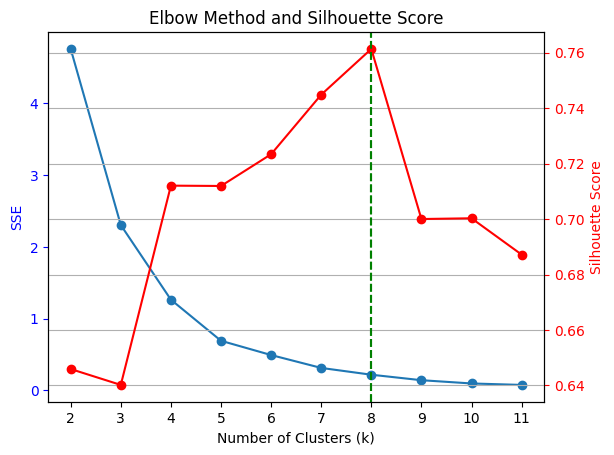

In [ ]:
# Data yang telah dinormalisasi
data_normalized = data_normalized.copy()

# Inisialisasi range nilai k
min_k = 2
max_k = 11

# List untuk menyimpan nilai SSE
sse_scores = []
# List untuk menyimpan nilai Silhouette Score
silhouette_scores = []

# Loop untuk mencari SSE dan Silhouette Score pada setiap nilai k
for k in range(min_k, max_k+1):
    kmeans = Kmeans1(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_normalized)
    sse = kmeans.inertia_
    sse_scores.append(sse)
    if len(np.unique(cluster_labels)) > 1:
        silhouette_avg = silhouette_score(data_normalized, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(0)

# Mencari nilai k optimal berdasarkan Silhouette Score
optimal_k = min_k + np.argmax(silhouette_scores)

# Plot grafik SSE dan Silhouette Score
fig, ax1 = plt.subplots()

ax1.plot(range(min_k, min_k + len(sse_scores)), sse_scores, marker='o')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('SSE', color='blue')
ax1.tick_params('y', colors='blue')

ax2 = ax1.twinx()
ax2.plot(range(min_k, min_k + len(silhouette_scores)), silhouette_scores, marker='o', color='red')
ax2.set_ylabel('Silhouette Score', color='red')
ax2.tick_params('y', colors='red')

# Tambahkan garis vertikal untuk nilai k optimal
ax1.axvline(x=optimal_k, color='green', linestyle='--')
ax2.axvline(x=optimal_k, color='green', linestyle='--')

plt.title('Elbow Method and Silhouette Score')
plt.xticks(range(min_k, min_k + len(sse_scores)))
plt.grid(True)
plt.show()

In [ ]:
sse = []
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = Kmeans1(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data_normalized)
    sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(data_normalized, labels)
    silhouette_scores.append(silhouette_avg)

table_elbow = {
    'K': range(2, 11),
    'sse': sse,
    'silhouette': silhouette_scores
}
df = pd.DataFrame(table_elbow)
df

,K,sse,silhouette
0,2,4.760856,0.645903
1,3,2.304099,0.640173
2,4,1.263088,0.712060
3,5,0.689676,0.711943
4,6,0.490796,0.723389
5,7,0.311066,0.744871
6,8,0.216313,0.761383
7,9,0.139764,0.700020
8,10,0.094273,0.700286


### **K-Means**

In [ ]:
data_cluster5 = merge_data[['dbd', 'Umur_DBD', 'Nafsu Makan Kurang',
                            'Sering Jajan Diluar',
                            'Sering Pakai Jamban/Toilet']] 

# Standardize data
cluster5 = data_normalized.copy()

In [ ]:
kmeans5 = KMeans(n_cluster=8)
kmeans5.fit(cluster5)

In [ ]:
predicted_kmeans5 = kmeans5.predict(cluster5)
print('Silhouette:', silhouette_score(cluster5, predicted_kmeans5))
print('SSE:', kmeans5.SSE)

Silhouette: 0.7137496088993923
SSE: 0.25736102254664917


In [ ]:
frame5 = pd.DataFrame(cluster5)
frame5['cluster'] = predicted_kmeans5
frame5['cluster'].value_counts()

2    10
0     8
5     5
6     5
3     4
1     3
7     3
4     1
Name: cluster, dtype: int64

In [ ]:
predicted_kmeans5

array([0, 1, 7, 1, 0, 4, 5, 7, 2, 2, 0, 2, 1, 2, 2, 3, 7, 0, 0, 5, 3, 0,
       0, 2, 0, 2, 6, 6, 6, 6, 3, 6, 3, 5, 5, 2, 5, 2, 2])

### **PSO K-Means**

In [ ]:
pso5 = ParticleSwarmOptimizedClustering(n_cluster=8, 
                                       n_particles=10, 
                                       data=cluster5, 
                                       hybrid=True,
                                       max_iter=4000, 
                                       print_debug=100)

In [ ]:
hist5 = pso5.run()

Initial global best score 0.19755241787507483
Iteration 0001/4000 current gbest score 0.197552417875074826
Iteration 0101/4000 current gbest score 0.197552417875074826
Iteration 0201/4000 current gbest score 0.197552417875074826
Iteration 0301/4000 current gbest score 0.197552417875074826
Iteration 0401/4000 current gbest score 0.197552417875074826
Iteration 0501/4000 current gbest score 0.197552417875074826
Iteration 0601/4000 current gbest score 0.197552417875074826
Iteration 0701/4000 current gbest score 0.197552417875074826
Iteration 0801/4000 current gbest score 0.197552417875074826
Iteration 0901/4000 current gbest score 0.197552417875074771
Iteration 1001/4000 current gbest score 0.197552417875074771
Iteration 1101/4000 current gbest score 0.197552417875074771
Iteration 1201/4000 current gbest score 0.197552417875074743
Iteration 1301/4000 current gbest score 0.197552417875074743
Iteration 1401/4000 current gbest score 0.197552417875074743
Iteration 1501/4000 current gbest score

In [ ]:
pso_kmeans5 = KMeans(n_cluster=8)
pso_kmeans5.centroid = pso5.gbest_centroids.copy()

In [ ]:
predicted_pso5 = pso_kmeans5.predict(cluster5)

In [ ]:
print('Silhouette:', silhouette_score(cluster5, predicted_pso5))
print('SSE:', calc_sse(centroids=pso5.gbest_centroids, 
                       data=cluster5, 
                       labels=predicted_pso5))

Silhouette: 0.7613826616854354
SSE: 0.21631320542356303


In [ ]:
frame5 = pd.DataFrame(cluster5)
frame5['cluster'] = predicted_pso5
frame5['cluster'].value_counts()

2    10
4     8
1     5
7     5
3     4
0     4
5     2
6     1
Name: cluster, dtype: int64

In [ ]:
predicted_pso5

array([3, 4, 5, 4, 1, 6, 4, 5, 2, 2, 1, 2, 4, 2, 2, 0, 3, 3, 1, 4, 0, 1,
       3, 2, 1, 2, 7, 7, 7, 7, 0, 7, 0, 4, 4, 2, 4, 2, 2])

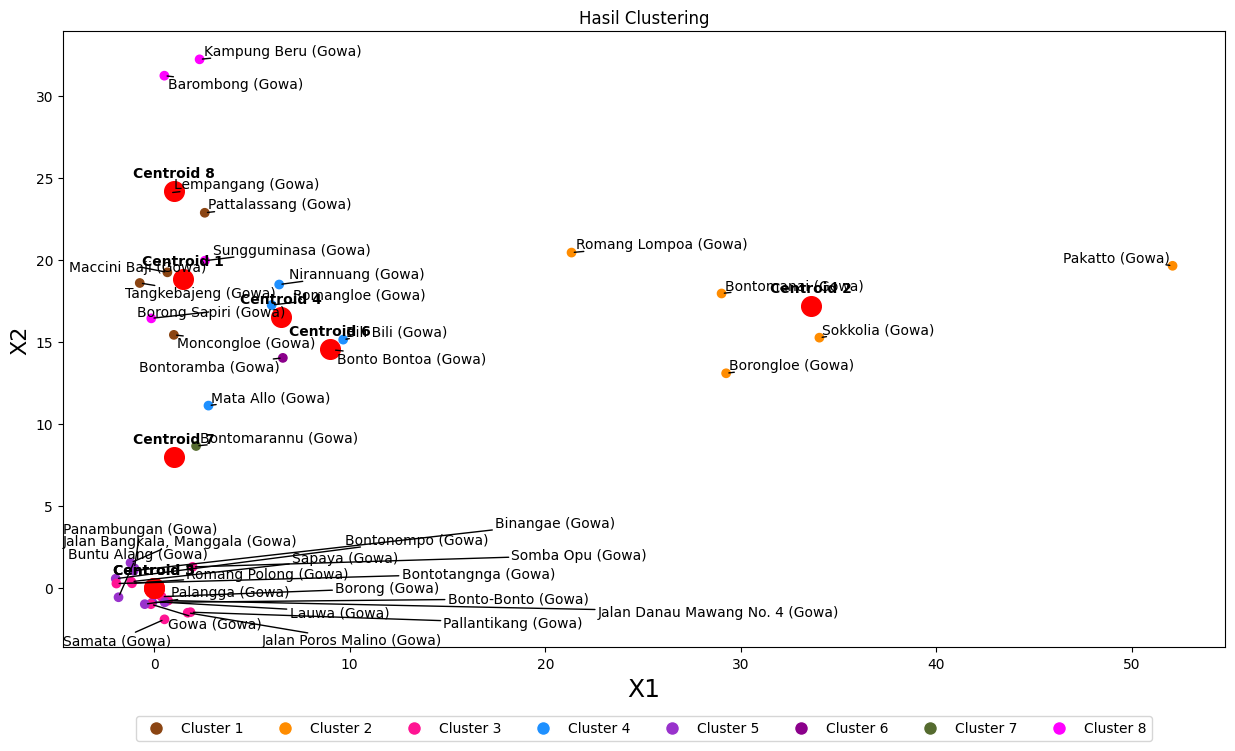

In [ ]:
# Pemetaan warna klaster
color_map = {0: '#8B4513', 1: '#FF8C00', 2: '#FF1493', 3: '#1E90FF', 4: '#9932CC', 5:'#8B008B', 6: '#556B2F', 7: '#FF00FF'}  # Atur warna untuk masing-masing klaster

fig, ax = plt.subplots(figsize=(15, 8))

# Jittering pada posisi titik data
jitter = 2  # Besar jittering, sesuaikan sesuai kebutuhan
jittered_x = [x + random.uniform(-jitter, jitter) for x in data_cluster5.iloc[:, 0]]
jittered_y = [y + random.uniform(-jitter, jitter) for y in data_cluster5.iloc[:, 1]]
scatter = ax.scatter(jittered_x, jittered_y, c=[color_map[i] for i in predicted_pso5])

# Scatter plot dengan indeks dan keterangan klaster pada setiap titik data klaster
texts = []
for i, (x, y, alamat) in enumerate(zip(jittered_x, jittered_y, data_cluster5.index)):
    texts.append(ax.text(x, y, f'{alamat}', ha='center', va='bottom'))

# Menyesuaikan posisi tulisan agar tidak bertumpuk
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'))

# Menghitung dan menampilkan nilai centroid di tengah setiap klaster
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    cluster_data = data_cluster5[predicted_pso5 == i]
    centroid_x = np.mean(cluster_data.iloc[:, 0])
    centroid_y = np.mean(cluster_data.iloc[:, 1])
    plt.scatter(centroid_x, centroid_y, marker='o', color='red', s=200)
    plt.annotate(f'Centroid {i+1}', (centroid_x, centroid_y), textcoords="offset points", xytext=(0, 10), ha='center', color='black', weight='bold')

plt.xlabel('X1', fontsize=18)
plt.ylabel('X2', fontsize=16)
plt.title('Hasil Clustering')

# Menampilkan keterangan warna
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[i], markersize=10)
                 for i in range(len(color_map))]
legend_texts = [f'Cluster {i+1}' for i in range(len(color_map))]
plt.legend(legend_labels, legend_texts, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(color_map))

plt.show()


###**Evaluasi Optimasi**

In [ ]:
#evaluasi sse dan silhoute kmeans dengan 20 iterasi
kmeanspp = {
    'silhouette': [],
    'sse' : [],
    'dbi': [],
}
for _ in range(20):
    kmean_rep = KMeans(n_cluster=8, init_pp=True)
    kmean_rep.fit(cluster5)
    predicted_kmean_rep = kmean_rep.predict(cluster5)
    silhouette = silhouette_score(cluster5, 
                                  predicted_kmean_rep)
    sse = kmean_rep.SSE
    dbi = davies_bouldin_score(cluster5, predicted_kmean_rep)
    kmeanspp['silhouette'].append(silhouette)
    kmeanspp['sse'].append(sse)
    kmeanspp['dbi'].append(dbi)

In [ ]:
#evaluasi sse dan silhoute pso-kmeans dengan 20 iterasi
pso_hybrid = {
    'silhouette': [],
    'sse' : [],
    'dbi': [],
}
for _ in range(20):
    pso_rep2 = ParticleSwarmOptimizedClustering(n_cluster=8, 
                                               n_particles=30, 
                                               data=cluster5, 
                                               hybrid=True, 
                                               max_iter=2000, 
                                               print_debug=2000)
    pso_rep2.run()
    pso_kmeans2 = KMeans(n_cluster=8, 
                        init_pp=False, 
                        seed=144)
    pso_kmeans2.centroid = pso_rep2.gbest_centroids.copy()
    predicted_pso_rep2 = pso_kmeans2.predict(cluster5)
    
    silhouette = silhouette_score(cluster5, 
                                  predicted_pso_rep2)
    sse = calc_sse(centroids=pso_rep2.gbest_centroids, 
                   data=cluster5, 
                   labels=predicted_pso_rep2)
    dbi = davies_bouldin_score(cluster5, predicted_pso_rep2)

    pso_hybrid['silhouette'].append(silhouette)
    pso_hybrid['sse'].append(sse)
    pso_hybrid['dbi'].append(dbi)

Initial global best score 0.15962922197992846
Iteration 0001/2000 current gbest score 0.159629221979928460
Finish with gbest score 0.151022284422674097
Initial global best score 0.1901802349112952
Iteration 0001/2000 current gbest score 0.190180234911295210
Finish with gbest score 0.162517320520723568
Initial global best score 0.1711402664100345
Iteration 0001/2000 current gbest score 0.171140266410034492
Finish with gbest score 0.167735296105668785
Initial global best score 0.16999137844940745
Iteration 0001/2000 current gbest score 0.169991378449407454
Finish with gbest score 0.169986710207979674
Initial global best score 0.16626869720739906
Iteration 0001/2000 current gbest score 0.166268697207399063
Finish with gbest score 0.166268694246404725
Initial global best score 0.1635940872020536
Iteration 0001/2000 current gbest score 0.163594087202053595
Finish with gbest score 0.163594082047568090
Initial global best score 0.1587254351759235
Iteration 0001/2000 current gbest score 0.1587

In [ ]:
evaluasi = {
    'method' : ['K-Means', 'PSO Kmeans'],
    'sse_mean' : [
        np.around(np.mean(kmeanspp['sse']), decimals=10),
        np.around(np.mean(pso_hybrid['sse']), decimals=10),
    ],
    'silhouette_mean' : [
        np.around(np.mean(kmeanspp['silhouette']), decimals=10),
        np.around(np.mean(pso_hybrid['silhouette']), decimals=10),
    ],
    'dbi_mean': [
        np.around(np.mean(pso_hybrid['dbi']), decimals=10),
        np.around(np.mean(kmeanspp['dbi']), decimals=10),
    ]
}

In [ ]:
eval = pd.DataFrame.from_dict(evaluasi)
eval

,method,sse_mean,silhouette_mean,dbi_mean
0,K-Means,0.763918,0.651984,0.530695
1,PSO Kmeans,0.292628,0.692597,0.500316


###**Pattern Evaluation**

In [ ]:
# Menghitung dan menampilkan nilai rentang usia di tengah setiap klaster
age_ranges = []
for i in range(8):
    cluster_data = data_cluster5[predicted_pso5 == i]
    min_age = cluster_data["Umur_DBD"].min()
    max_age = cluster_data["Umur_DBD"].max()

    # Penanganan nilai 0 atau NaN
    if np.isnan(max_age):
        age_range = f"{int(min_age)}+"
    else:
        if np.isnan(min_age):
            age_range = f"0-{int(max_age)}"
        else:
            age_range = f'{int(min_age)}-{int(max_age)}'

    age_ranges.append(age_range)

# Mengganti semua nilai pada setiap klaster menjadi rentang usia
for i in range(8):
    data_cluster5.loc[predicted_pso5 == i, 'Rentang_Usia_DBD'] = age_ranges[i]

data_cluster5 = data_cluster5.drop(['Umur_DBD'], axis=1)

In [ ]:
#create new column for cluster labels associated with each subject
data_cluster5['labels'] = predicted_pso5
data_cluster5['Segment'] = data_cluster5['labels'].map({0: 'First', 1: 'Second', 2: 'Third', 3: 'Fourth', 4: 'Fifth', 5: 'Sistxh', 6: 'Seventh', 7: 'Eighth'})

In [ ]:
data_cluster5

,dbd,Nafsu Makan Kurang,Sering Jajan Diluar,Sering Pakai Jamban/Toilet,Rentang_Usia_DBD,labels,Segment
Bili Bili (Gowa),9.0,26.0,19.0,31.0,11-19,3,Fourth
Binangae (Gowa),0.0,0.0,1.0,1.0,0-0,4,Fifth
Bonto Bontoa (Gowa),10.0,14.0,13.0,14.0,14-15,5,Sistxh
Bonto-Bonto (Gowa),0.0,0.0,1.0,1.0,0-0,4,Fifth
Bontomanai (Gowa),29.0,103.0,73.0,115.0,15-19,1,Second
Bontomarannu (Gowa),1.0,5.0,6.0,8.0,8-8,6,Seventh
Bontonompo (Gowa),0.0,1.0,1.0,3.0,0-0,4,Fifth
Bontoramba (Gowa),8.0,17.0,16.0,18.0,14-15,5,Sistxh
Bontotangnga (Gowa),0.0,1.0,0.0,1.0,0-0,2,Third
Borong (Gowa),0.0,1.0,0.0,1.0,0-0,2,Third


In [ ]:
data_cluster5[data_cluster5['labels']==0]

,dbd,Nafsu Makan Kurang,Sering Jajan Diluar,Sering Pakai Jamban/Toilet,Rentang_Usia_DBD,labels,Segment
Maccini Baji (Gowa),1.0,3.0,3.0,5.0,16-22,0,First
Pattalassang (Gowa),1.0,3.0,2.0,3.0,16-22,0,First
Moncongloe (Gowa),3.0,2.0,2.0,3.0,16-22,0,First
Tangkebajeng (Gowa),1.0,3.0,2.0,3.0,16-22,0,First


In [ ]:
#Order the cluster
data_cluster5['Segment'] = data_cluster5['Segment'].astype('category')
data_cluster5['Segment'] = data_cluster5['Segment'].cat.reorder_categories(['First', 'Second', 'Third', 'Fourth', 'Fifth', 'Sistxh', 'Seventh', 'Eighth'])

In [ ]:
# ==== CREATE DICTIONARY FOR OBJECT AND NUMERICAL COLUMNS ====#
dict_cat = {}
dict_num = {}
for cat in data_cluster5.select_dtypes('object'):
 dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in data_cluster5.select_dtypes(['int64', 'float64']):
  if (num == 'Total'):
    continue
  dict_num[num] = ['mean']
# ============ CREATE TABLE FOR EACH CLUSTER ============#
data_cluster5.rename(columns={'labels': 'Total'}, inplace=True)
data_percluster5 = data_cluster5.groupby('Segment').agg({
 'Total': 'count',
 **dict_num,
 **dict_cat
}).T

In [ ]:
data_cluster5['coord'] = coord5

In [ ]:
data_cluster5 = data_cluster5.T
data_percluster5.to_json(r'cluster5_result.json')
data_cluster5.to_json(r'cluster5_df.json')

#**CLUSTER 6**

###**Elbow**

In [ ]:
data = merge_data.copy()

In [ ]:
selected_columns = ['tifoid', 'Umur_Tifoid', 'Nafsu Makan Kurang',
                    'Sering Jajan Diluar',
                    'Sering Pakai Jamban/Toilet'] 
data_selected = data[selected_columns]

In [ ]:
# Normalisasi L2
normalizer = Normalizer(norm='l2')
data_normalized = normalizer.transform(data_selected)

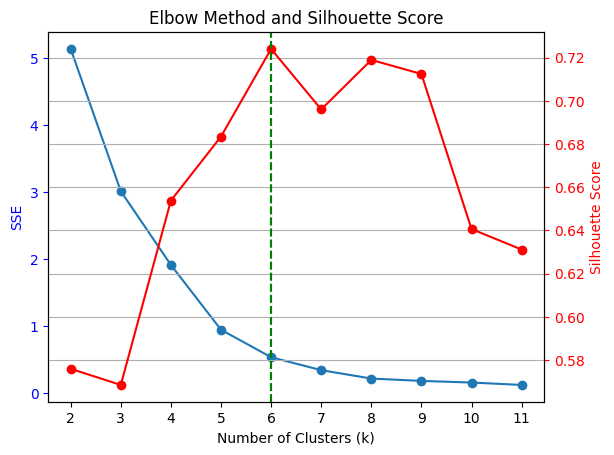

In [ ]:
# Data yang telah dinormalisasi
data_normalized = data_normalized.copy()

# Inisialisasi range nilai k
min_k = 2
max_k = 11

# List untuk menyimpan nilai SSE
sse_scores = []
# List untuk menyimpan nilai Silhouette Score
silhouette_scores = []

# Loop untuk mencari SSE dan Silhouette Score pada setiap nilai k
for k in range(min_k, max_k+1):
    kmeans = Kmeans1(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_normalized)
    sse = kmeans.inertia_
    sse_scores.append(sse)
    if len(np.unique(cluster_labels)) > 1:
        silhouette_avg = silhouette_score(data_normalized, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(0)

# Mencari nilai k optimal berdasarkan Silhouette Score
optimal_k = min_k + np.argmax(silhouette_scores)

# Plot grafik SSE dan Silhouette Score
fig, ax1 = plt.subplots()

ax1.plot(range(min_k, min_k + len(sse_scores)), sse_scores, marker='o')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('SSE', color='blue')
ax1.tick_params('y', colors='blue')

ax2 = ax1.twinx()
ax2.plot(range(min_k, min_k + len(silhouette_scores)), silhouette_scores, marker='o', color='red')
ax2.set_ylabel('Silhouette Score', color='red')
ax2.tick_params('y', colors='red')

# Tambahkan garis vertikal untuk nilai k optimal
ax1.axvline(x=optimal_k, color='green', linestyle='--')
ax2.axvline(x=optimal_k, color='green', linestyle='--')

plt.title('Elbow Method and Silhouette Score')
plt.xticks(range(min_k, min_k + len(sse_scores)))
plt.grid(True)
plt.show()

In [ ]:
sse = []
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = Kmeans1(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data_normalized)
    sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(data_normalized, labels)
    silhouette_scores.append(silhouette_avg)

table_elbow = {
    'K': range(2, 11),
    'sse': sse,
    'silhouette': silhouette_scores
}
df = pd.DataFrame(table_elbow)
df

,K,sse,silhouette
0,2,5.142897,0.575929
1,3,3.018344,0.568468
2,4,1.918183,0.653849
3,5,0.950195,0.683490
4,6,0.540140,0.724080
5,7,0.346977,0.696068
6,8,0.221498,0.718981
7,9,0.186424,0.712485
8,10,0.161725,0.640667


### **K-Means**

In [ ]:
data_cluster6 = merge_data[['tifoid', 'Umur_Tifoid', 'Nafsu Makan Kurang',
                            'Sering Jajan Diluar',
                            'Sering Pakai Jamban/Toilet']] 

# Standardize data
cluster6 = data_normalized.copy()

In [ ]:
kmeans6 = KMeans(n_cluster=6)
kmeans6.fit(cluster6)

In [ ]:
predicted_kmeans6 = kmeans6.predict(cluster6)
print('Silhouette:', silhouette_score(cluster6, predicted_kmeans6))
print('SSE:', kmeans6.SSE)

Silhouette: 0.5953590847997844
SSE: 1.124431346702078


In [ ]:
frame6 = pd.DataFrame(cluster6)
frame6['cluster'] = predicted_kmeans6
frame6['cluster'].value_counts()

3    9
5    8
1    8
4    6
0    5
2    3
Name: cluster, dtype: int64

In [ ]:
predicted_kmeans6

array([5, 2, 0, 2, 5, 0, 3, 0, 1, 1, 5, 1, 2, 1, 1, 0, 0, 5, 5, 4, 4, 5,
       5, 1, 5, 1, 4, 4, 1, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3])

### **PSO K-Means**

In [ ]:
pso6 = ParticleSwarmOptimizedClustering(n_cluster=6, 
                                       n_particles=40, 
                                       data=cluster6, 
                                       hybrid=True,
                                       max_iter=4000, 
                                       print_debug=100)

In [ ]:
hist6 = pso6.run()

Initial global best score 0.3028983286398634
Iteration 0001/4000 current gbest score 0.302898328639863379
Iteration 0101/4000 current gbest score 0.272969053143627238
Iteration 0201/4000 current gbest score 0.259959101350383859
Iteration 0301/4000 current gbest score 0.258126408007510910
Iteration 0401/4000 current gbest score 0.257945844647264833
Iteration 0501/4000 current gbest score 0.257911831690102511
Iteration 0601/4000 current gbest score 0.257911792905717807
Iteration 0701/4000 current gbest score 0.257911784092998364
Iteration 0801/4000 current gbest score 0.257911757284799981
Iteration 0901/4000 current gbest score 0.257911752809439954
Iteration 1001/4000 current gbest score 0.257911749390280665
Iteration 1101/4000 current gbest score 0.257911748455471712
Iteration 1201/4000 current gbest score 0.257911747682790182
Iteration 1301/4000 current gbest score 0.257911746409110465
Iteration 1401/4000 current gbest score 0.257911746404601794
Iteration 1501/4000 current gbest score 

In [ ]:
pso_kmeans6 = KMeans(n_cluster=6)
pso_kmeans6.centroid = pso6.gbest_centroids.copy()

In [ ]:
predicted_pso6 = pso_kmeans6.predict(cluster6)

In [ ]:
print('Silhouette:', silhouette_score(cluster6, predicted_pso6))
print('SSE:', calc_sse(centroids=pso6.gbest_centroids, 
                       data=cluster6, 
                       labels=predicted_pso6))

Silhouette: 0.7240803416744332
SSE: 0.6632566747018583


In [ ]:
frame6 = pd.DataFrame(cluster6)
frame6['cluster'] = predicted_pso6
frame6['cluster'].value_counts()

3    9
5    8
2    7
0    6
4    6
1    3
Name: cluster, dtype: int64

In [ ]:
predicted_pso6

array([0, 1, 0, 1, 2, 0, 3, 0, 5, 5, 2, 5, 1, 5, 5, 0, 0, 2, 2, 4, 4, 2,
       2, 5, 2, 5, 4, 4, 5, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3])

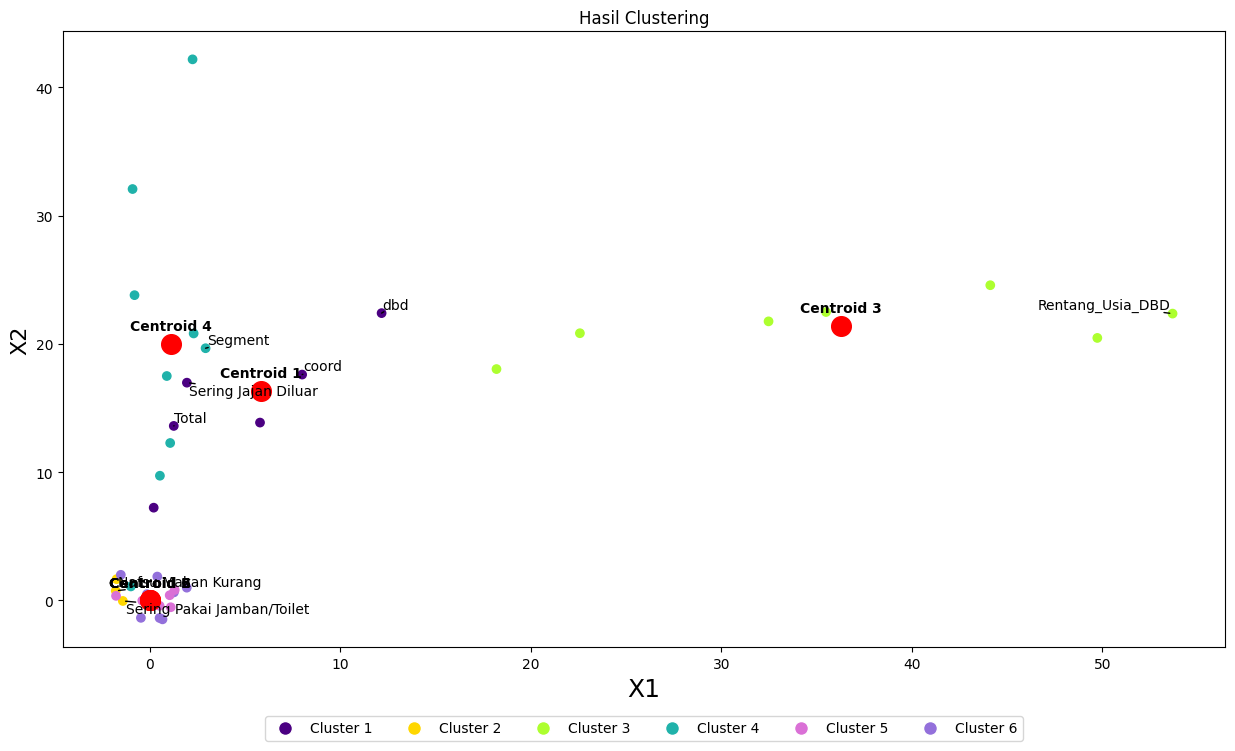

In [ ]:
# Pemetaan warna klaster
color_map = {0: '#4B0082', 1: '#FFD700', 2: '#ADFF2F', 3: '#20B2AA', 4: '#DA70D6', 5:'#9370DB'}  # Atur warna untuk masing-masing klaster

fig, ax = plt.subplots(figsize=(15, 8))

# Jittering pada posisi titik data
jitter = 2  # Besar jittering, sesuaikan sesuai kebutuhan
jittered_x = [x + random.uniform(-jitter, jitter) for x in data_cluster6.iloc[:, 0]]
jittered_y = [y + random.uniform(-jitter, jitter) for y in data_cluster6.iloc[:, 1]]
scatter = ax.scatter(jittered_x, jittered_y, c=[color_map[i] for i in predicted_pso6])

# Scatter plot dengan indeks dan keterangan klaster pada setiap titik data klaster
texts = []
for i, (x, y, alamat) in enumerate(zip(jittered_x, jittered_y, data_cluster5.index)):
    texts.append(ax.text(x, y, f'{alamat}', ha='center', va='bottom'))

# Menyesuaikan posisi tulisan agar tidak bertumpuk
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'))

# Menghitung dan menampilkan nilai centroid di tengah setiap klaster
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    cluster_data = data_cluster6[predicted_pso6 == i]
    centroid_x = np.mean(cluster_data.iloc[:, 0])
    centroid_y = np.mean(cluster_data.iloc[:, 1])
    plt.scatter(centroid_x, centroid_y, marker='o', color='red', s=200)
    plt.annotate(f'Centroid {i+1}', (centroid_x, centroid_y), textcoords="offset points", xytext=(0, 10), ha='center', color='black', weight='bold')

plt.xlabel('X1', fontsize=18)
plt.ylabel('X2', fontsize=16)
plt.title('Hasil Clustering')

# Menampilkan keterangan warna
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[i], markersize=10)
                 for i in range(len(color_map))]
legend_texts = [f'Cluster {i+1}' for i in range(len(color_map))]
plt.legend(legend_labels, legend_texts, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(color_map))

plt.show()


###**Evaluasi Optimasi**

In [ ]:
#evaluasi sse dan silhoute kmeans dengan 20 iterasi
kmeanspp = {
    'silhouette': [],
    'sse' : [],
    'dbi': [],
}
for _ in range(20):
    kmean_rep = KMeans(n_cluster=6, init_pp=True)
    kmean_rep.fit(cluster6)
    predicted_kmean_rep = kmean_rep.predict(cluster6)
    silhouette = silhouette_score(cluster6, 
                                  predicted_kmean_rep)
    sse = kmean_rep.SSE
    dbi = davies_bouldin_score(cluster6, predicted_kmean_rep)
    kmeanspp['silhouette'].append(silhouette)
    kmeanspp['sse'].append(sse)
    kmeanspp['dbi'].append(dbi)

In [ ]:
#evaluasi sse dan silhoute pso-kmeans dengan 20 iterasi
pso_hybrid = {
    'silhouette': [],
    'sse' : [],
    'dbi': [],
}
for _ in range(20):
    pso_rep2 = ParticleSwarmOptimizedClustering(n_cluster=6, 
                                               n_particles=30, 
                                               data=cluster5, 
                                               hybrid=True, 
                                               max_iter=2000, 
                                               print_debug=2000)
    pso_rep2.run()
    pso_kmeans2 = KMeans(n_cluster=6 , 
                        init_pp=False, 
                        seed=144)
    pso_kmeans2.centroid = pso_rep2.gbest_centroids.copy()
    predicted_pso_rep2 = pso_kmeans2.predict(cluster6)
    
    silhouette = silhouette_score(cluster6, 
                                  predicted_pso_rep2)
    sse = calc_sse(centroids=pso_rep2.gbest_centroids, 
                   data=cluster6, 
                   labels=predicted_pso_rep2)
    dbi = davies_bouldin_score(cluster6, predicted_pso_rep2)

    pso_hybrid['silhouette'].append(silhouette)
    pso_hybrid['sse'].append(sse)
    pso_hybrid['dbi'].append(dbi)

Initial global best score 0.23454841868218715
Iteration 0001/2000 current gbest score 0.234548418682187149
Finish with gbest score 0.228284686487545185
Initial global best score 0.22295899244992223
Iteration 0001/2000 current gbest score 0.222958992449922233
Finish with gbest score 0.222958992449922094
Initial global best score 0.23705473223169402
Iteration 0001/2000 current gbest score 0.237054732231694015
Finish with gbest score 0.237054641541423888
Initial global best score 0.25364785201435613
Iteration 0001/2000 current gbest score 0.253647852014356134
Finish with gbest score 0.241622788347380962
Initial global best score 0.2543564889260863
Iteration 0001/2000 current gbest score 0.254356488926086310
Finish with gbest score 0.244365763797140367
Initial global best score 0.26668197903968766
Iteration 0001/2000 current gbest score 0.266681979039687655
Finish with gbest score 0.230458636927311028
Initial global best score 0.2667293038491029
Iteration 0001/2000 current gbest score 0.26

In [ ]:
evaluasi = {
    'method' : ['K-Means', 'PSO Kmeans'],
    'sse_mean' : [
        np.around(np.mean(kmeanspp['sse']), decimals=10),
        np.around(np.mean(pso_hybrid['sse']), decimals=10),
    ],
    'silhouette_mean' : [
        np.around(np.mean(kmeanspp['silhouette']), decimals=10),
        np.around(np.mean(pso_hybrid['silhouette']), decimals=10),
    ],
    'dbi_mean': [
        np.around(np.mean(pso_hybrid['dbi']), decimals=10),
        np.around(np.mean(kmeanspp['dbi']), decimals=10),
    ]
}

In [ ]:
eval = pd.DataFrame.from_dict(evaluasi)
eval

,method,sse_mean,silhouette_mean,dbi_mean
0,K-Means,1.656847,0.622016,0.524874
1,PSO Kmeans,0.795101,0.651959,0.506733


###**Pattern Evaluation**

In [ ]:
# Menghitung dan menampilkan nilai rentang usia di tengah setiap klaster
age_ranges = []
for i in range(6):
    cluster_data = data_cluster6[predicted_pso6 == i]
    min_age = cluster_data["Umur_Tifoid"].min()
    max_age = cluster_data["Umur_Tifoid"].max()

    # Penanganan nilai 0 atau NaN
    if np.isnan(max_age):
        age_range = f"{int(min_age)}+"
    else:
        if np.isnan(min_age):
            age_range = f"0-{int(max_age)}"
        else:
            age_range = f'{int(min_age)}-{int(max_age)}'

    age_ranges.append(age_range)

# Mengganti semua nilai pada setiap klaster menjadi rentang usia
for i in range(6):
    data_cluster6.loc[predicted_pso6 == i, 'Rentang_Usia_Tifoid'] = age_ranges[i]

data_cluster6 = data_cluster6.drop(['Umur_Tifoid'], axis=1)

In [ ]:
#create new column for cluster labels associated with each subject
data_cluster6['labels'] = predicted_pso6
data_cluster6['Segment'] = data_cluster6['labels'].map({0: 'First', 1: 'Second', 2: 'Third', 3: 'Fourth', 4: 'Fifth', 5: 'Sistxh'})

In [ ]:
data_cluster6

,tifoid,Nafsu Makan Kurang,Sering Jajan Diluar,Sering Pakai Jamban/Toilet,Rentang_Usia_Tifoid,labels,Segment
Bili Bili (Gowa),14.0,26.0,19.0,31.0,9-24,0,First
Binangae (Gowa),0.0,0.0,1.0,1.0,0-0,1,Second
Bonto Bontoa (Gowa),3.0,14.0,13.0,14.0,9-24,0,First
Bonto-Bonto (Gowa),0.0,0.0,1.0,1.0,0-0,1,Second
Bontomanai (Gowa),54.0,103.0,73.0,115.0,18-24,2,Third
Bontomarannu (Gowa),2.0,5.0,6.0,8.0,9-24,0,First
Bontonompo (Gowa),1.0,1.0,1.0,3.0,3-42,3,Fourth
Bontoramba (Gowa),8.0,17.0,16.0,18.0,9-24,0,First
Bontotangnga (Gowa),0.0,1.0,0.0,1.0,0-0,5,Sistxh
Borong (Gowa),0.0,1.0,0.0,1.0,0-0,5,Sistxh


In [ ]:
data_cluster6[data_cluster6['labels']==0]

,tifoid,Nafsu Makan Kurang,Sering Jajan Diluar,Sering Pakai Jamban/Toilet,Rentang_Usia_Tifoid,labels,Segment
Bili Bili (Gowa),14.0,26.0,19.0,31.0,9-24,0,First
Bonto Bontoa (Gowa),3.0,14.0,13.0,14.0,9-24,0,First
Bontomarannu (Gowa),2.0,5.0,6.0,8.0,9-24,0,First
Bontoramba (Gowa),8.0,17.0,16.0,18.0,9-24,0,First
Maccini Baji (Gowa),1.0,3.0,3.0,5.0,9-24,0,First
Mata Allo (Gowa),7.0,11.0,10.0,14.0,9-24,0,First


In [ ]:
#Order the cluster
data_cluster6['Segment'] = data_cluster6['Segment'].astype('category')
data_cluster6['Segment'] = data_cluster6['Segment'].cat.reorder_categories(['First', 'Second', 'Third', 'Fourth', 'Fifth', 'Sistxh'])

In [ ]:
# ==== CREATE DICTIONARY FOR OBJECT AND NUMERICAL COLUMNS ====#
dict_cat = {}
dict_num = {}
for cat in data_cluster6.select_dtypes('object'):
 dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in data_cluster6.select_dtypes(['int64', 'float64']):
  if (num == 'Total'):
    continue
  dict_num[num] = ['mean']
# ============ CREATE TABLE FOR EACH CLUSTER ============#
data_cluster6.rename(columns={'labels': 'Total'}, inplace=True)
data_percluster6 = data_cluster6.groupby('Segment').agg({
 'Total': 'count',
 **dict_num,
 **dict_cat
}).T

In [ ]:
data_cluster6['coord'] = coord6

In [ ]:
data_cluster6 = data_cluster6.T
data_percluster6.to_json(r'cluster6_result.json')
data_cluster6.to_json(r'cluster6_df.json')